# Prepare

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from copy import deepcopy

import experiments as meas
from slab import AttrDict
from experiments import MultimodeStation, CharacterizationRunner, SweepRunner

from job_server import JobClient
from job_server.database import get_database
from job_server.config_versioning import ConfigVersionManager

Importing all classes from  D:\python\multimode_expts\experiments\dual_rail
Importing all classes from  D:\python\multimode_expts\experiments\qsim
Importing all classes from  D:\python\multimode_expts\experiments\qubit_cavity
Importing all classes from  D:\python\multimode_expts\experiments\single_qubit
Skipped top-level files ['characterization_runner.py', 'dataset.py', 'MM_base.py', 'MM_dual_rail_base.py', 'MM_rb_base.py', 'mock_hardware.py', 'sequential_experiment.py', 'sequential_experiment_classes.py', 'station.py', 'sweep_runner.py']


In [2]:
# Initialize database and config manager
db = get_database()
config_dir = 'D:/python/multimode_expts/configs'
config_manager = ConfigVersionManager(config_dir)

# Initialize job client (handle submitting and waiting for jobs)
client = JobClient()

# Check server health
health = client.health_check()
client.print_queue()


=== Job Queue ===

No job currently running

Pending: 0 jobs



In [3]:
# Who is running these experiments??
user = 'connie'

print(f"Welcome {user}!")

Welcome connie!


In [4]:
# station.update_all_station_snapshots(update_main=True)

In [18]:
# Initialize station to retrieve soc and configs
station = MultimodeStation(
    user = user,
    # experiment_name = "260130_qsim_wigner",
    # experiment_name = "260206_dump_mode",
    experiment_name = "260218_qsim_scramble_low_kerr",

    storage_man_file="CFG-M1-20260218-00025",
    # hardware_config="CFG-HW-20260211-00039",
    # floquet_file="versions/floquet_storage_swap/CFG-FL-20260115-00001.csv",
    # storage_man_file="versions/man1_storage_swap/CFG-M1-20260121-00005.csv",
    # multiphoton_config="versions/multiphoton_config/CFG-MP-20260115-00001.yml",
    
    # experiment_name = "251111_qec",
)

[STATION] Using main hardware_config version: CFG-HW-20260218-00008
[STATION] Using main multiphoton_config version: CFG-MP-20260121-00001
[STATION] Using man1_storage_swap version: CFG-M1-20260218-00025
[STATION] Using main floquet_storage_swap version: CFG-FL-20260213-00012
Data, plots, logs will be stored in: D:\experiments\260218_qsim_scramble_low_kerr
Hardware configs will be read from D:\python\multimode_expts\configs\versions\hardware_config\CFG-HW-20260218-00008.yml
dict_keys(['Pyro.NameServer', 'Qick101'])
QICK running on ZCU216, software version 0.2.291

Firmware configuration (built Tue Oct 15 12:06:51 2024):

	Global clocks (MHz): tProcessor 430.080, RF reference 245.760

	7 signal generator channels:
	0:	axis_signal_gen_v6 - envelope memory 32768 samples (5.128 us)
		fs=6389.760 MHz, fabric=399.360 MHz, 32-bit DDS, range=6389.760 MHz
		DAC tile 2, blk 0 is 0_230, on JHC3
	1:	axis_signal_gen_v6 - envelope memory 32768 samples (5.128 us)
		fs=6389.760 MHz, fabric=399.360 MHz

In [6]:
station.ds_storage.df

stor_name   freq (MHz)  precision (MHz)   pi (mus)  h_pi (mus)  \
0      M1-S1   352.808553              NaN   2.352172    1.176086   
1      M1-S2   524.626255              NaN   2.307073    1.153536   
2      M1-S3   700.807420              NaN   1.696505    0.848253   
3      M1-S4   880.757057              NaN   1.865498    0.932749   
4      M1-S5  1056.917751              NaN        NaN         NaN   
5      M1-S6  1248.717666              NaN   1.804485    0.902242   
6      M1-S7  1426.889688              NaN   3.008964    1.504482   
7      M1-S8    -1.000000            -1.00  -1.000000   -1.000000   
8      M1-S9    -1.000000            -1.00  -1.000000   -1.000000   
9     M1-S10    -1.000000            -1.00  -1.000000   -1.000000   
10    M1-S11    -1.000000            -1.00  -1.000000   -1.000000   
11    M1-S12    -1.000000            -1.00  -1.000000   -1.000000   
12        M1  1998.642844              NaN   0.577254    0.283179   
13        M2  1834.950000             0.01   1.054456    0.520515   
14     M2-S1   175.630000             0.01   2.173484    1.086742   
15     M2-S2   346.840000             0.01   0.908835    0.454417   
16     M2-S3   523.220000             0.01   1.561615    0.780808   
17     M2-S4   702.650000             0.01   1.386764    0.693382   
18     M2-S5   878.780000             0.01   1.303372    0.651686   
19     M2-S6  1070.100000             0.01   2.379622    1.189811   
20     M2-S7  1249.700000             0.01   1.796981    0.898491   
21     M2-M1   173.790000             0.01   0.463481    0.231741   
22     M1-D2  2271.992162             0.01  30.000000   15.000000   
23     M2-D2  2094.050000             0.01  15.000000    0.000000   
24      M1-C   919.000000             0.02   0.251127    0.122354   
25     M1_ce  2008.780000             0.02   0.617915    0.304523   

    gain (DAC units)                 last_update  \
0               3175  2026-02-05 12:03:18.308045   
1               3747  2026-02-05 12:05:05.006501   
2               4717  2026-02-05 12:06:37.153292   
3               7158  2026-02-05 14:12:50.143204   
4               2493  2026-02-05 11:53:30.560024   
5              12761  2026-02-05 12:09:41.772552   
6               9774  2026-02-05 13:58:34.538345   
7                 -1                     51:31.3   
8                 -1                     51:31.3   
9                 -1                     51:31.3   
10                -1                     51:31.3   
11                -1                     51:31.3   
12              8000  2026-01-19 11:06:42.086262   
13             15000  2025-04-30 11:22:11.432806   
14              1000                     28:20.8   
15              5000                     33:56.1   
16              5000                     22:30.3   
17              9000                     25:33.1   
18             13500                     00:05.4   
19              9000                     30:59.0   
20             12000                     56:07.5   
21              2000  2024-10-06 01:47:25.946153   
22             20000  2026-02-10 17:57:07.753893   
23              8000  2025-01-23 17:22:53.776061   
24              1000  2025-12-08 16:40:53.078714   
25             15000  2025-01-20 09:52:35.311227   

                                     bs_rate_coeffs_g  \
0   [2.71800440497595e-10, 3.5345716702085755e-05,...   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
5                                                 NaN   
6                                                 NaN   
7                                                 NaN   
8                                                 NaN   
9                                                 NaN   
10                                                NaN   
11                                                

In [7]:
station.hardware_cfg

{'device': {'qubit': {'T1': [417.99222088688344],
   'f_ge': [3562.649028539161],
   'f_ef': [3419.076999672474],
   'ramp_sigma': [0.005],
   'ramp_sigma_num': [3.0],
   'pulses': {'pi_ge': {'gain': [9330],
     'sigma': [0.035],
     'length': [0.0],
     'type': ['gauss']},
    'hpi_ge': {'gain': [4696],
     'length': [0.0],
     'sigma': [0.035],
     'type': ['gauss']},
    'pi_ef': {'gain': [8366],
     'length': [0.0],
     'sigma': [0.035],
     'type': ['gauss']},
    'hpi_ef': {'gain': [4212], 'sigma': [0.035], 'type': ['gauss']},
    'slow_pi_ge': {'gain': [15],
     'sigma': [0.1],
     'length': [10],
     'type': ['flat_top']},
    'very_slow_pi_ge': {'gain': [158],
     'sigma': [0.025],
     'length': [3.236415421075048],
     'type': ['flat_top']},
    'very_slow_hpi_ge': {'gain': [102],
     'sigma': [1.0],
     'length': [0.0],
     'type': ['gauss']}},
   'T1_ef': [175.59922437221027]},
  'readout': {'trig_offset': [450],
   'frequency': [749.5612000000001],
   'ga

In [8]:
# station.snapshot_man1_storage_swap(update_main=True)
# station.snapshot_hardware_config(update_main=True)

In [9]:
coupler_current = 0.5e-3

## Experiments to run

Depending on stage of cooldown, we will run a different sequence of calibration experiments. For example, amplitude rabi don't need to be updated every time, but the frequency correction from T2 is important to do every day. In the dictionary experiments to run, we will speciy the experiments we want to run. 

In [10]:
expts_to_run = {# readout 
                'res_spec': True, # Readout spectroscopy
                'single_shot': True, 
                # qubit ge 
                'pulse_probe_ge': True,
                't2_ge': True, 
                'amplitude_ge': True,
                't1_ge': True,
                # qubit ef
                'pulse_probe_ef': True,
                't2_ef': True,
                'amplitude_ef': True,
                't1_ef': True,

                # manipulate 
                'man_modes': [1], # [1,2] if also want to run mode 2
                'pulse_probe_f0g1': True,
                'length_rabi_sweep':True,
                'length_rabi':False, # this will run automatically if the length_rabi_sweep is set to True
                'chi_ge': True, 
                'chi_ef': True,
                'RB': False,

                #storage
                'stor_modes': [1,2,3,4,5,6,7], # [1,2, .., 7] if also want to run  all modes 
                # 'stor_modes': [3, 4, 5], # [1,2, .., 7] if also want to run  all modes 
                'stor_spectroscopy': True,
                'sideband_freq_sweep': True,
                'sideband_length_rabi': True,
                # 'storage_t1': True
                }

# Qubit characterization

## Update main configs

In [ ]:
# When ready uncomment:
# station.update_all_station_snapshots(update_main=True)

## Resonator spectroscopy

Fitting parameters are wrong because of using the hanger function (more or less reflection/2), instead of transmission. Is this an easy fix?

In [ ]:
# Define defaults, smart config preprocessing and post-measurement updates
# =====================================
resspec_defaults = AttrDict(dict(
    # start = center - span / 2, 
    # step = span / expts, # min step ~1 Hz
    # center and span can be user supplied or use defaults in preproc
    expts = 250, # Number experiments stepping from start
    reps = 500, # Number averages per point
    relax_delay = 50, # us
    pulse_e = False, # add ge pi pulse prior to measurement
    pulse_f = False, # add ef pi pulse prior to measurement
    pulse_cavity = False,  # prepulse on cavity prior to measurement (False also disables next line)
    cavity_pulse = [4984.373226159381, 800, 2, 0], # [frequency, gain, length, phase]  const pulse
    qubit = 0,
)) # Shouldn't be modifying this on the fly!
# You can use kwargs in the run function to override these values

def resspec_preproc(station, default_expt_cfg, **kwargs):
    expt_cfg = deepcopy(default_expt_cfg)

    span = kwargs.pop('span', 1.5)  # MHz
    center = kwargs.pop('center', station.hardware_cfg.device.readout.frequency[0])
    expts = kwargs.get('expts', default_expt_cfg.expts)

    expt_cfg.start = center - span / 2
    expt_cfg.step = span / expts
    expt_cfg.update(kwargs)
    station.snapshot_hardware_config(update_main=False)
    return expt_cfg

def resspec_postproc(station, expt):
    old_freq = station.hardware_cfg.device.readout.frequency[0]
    station.hardware_cfg.device.readout.frequency = [expt.data['fit'][0]]
    print(f'Updated readout frequency from {old_freq} to {expt.data["fit"][0]}!')


Job submitted: JOB-20260122-00023 (queue position: 1)

[0.1s] Job JOB-20260122-00023: pending

[2.1s] Job JOB-20260122-00023: running
[WORKER] Loading ResonatorSpectroscopyExperiment from experiments.single_qubit.resonator_spectroscopy
[WORKER] Creating experiment instance
[WORKER]   Data file: JOB-20260122-00023_ResonatorSpectroscopyExperiment.h5
[WORKER] Running experiment...
 96%|██████████████████████████████████████▍ | 240/250 [00:18<00:00, 13.20it/s]
[26.3s] Job JOB-20260122-00023: completed
100%|████████████████████████████████████████| 250/250 [00:18<00:00, 13.23it/s]
[749.4481507749348, 5000, 1000, 0, 108.71917030446508, 90.82478085073197, 22.764927732465388]
[ 7.49448728e+02  3.31957217e+10  1.10133120e+03 -8.50603133e-01
  1.10908706e+02 -8.22428137e-01 -2.65269471e+01]

Freq with minimum transmission: 749.2111507749349
Freq with maximum transmission: 749.781150774935
From fit:
	f0: 749.448728162673
	Qi: 33195721745.969772
	Qe: 1101.3312012881293
	Q0: 1101.3311647493733
	kap

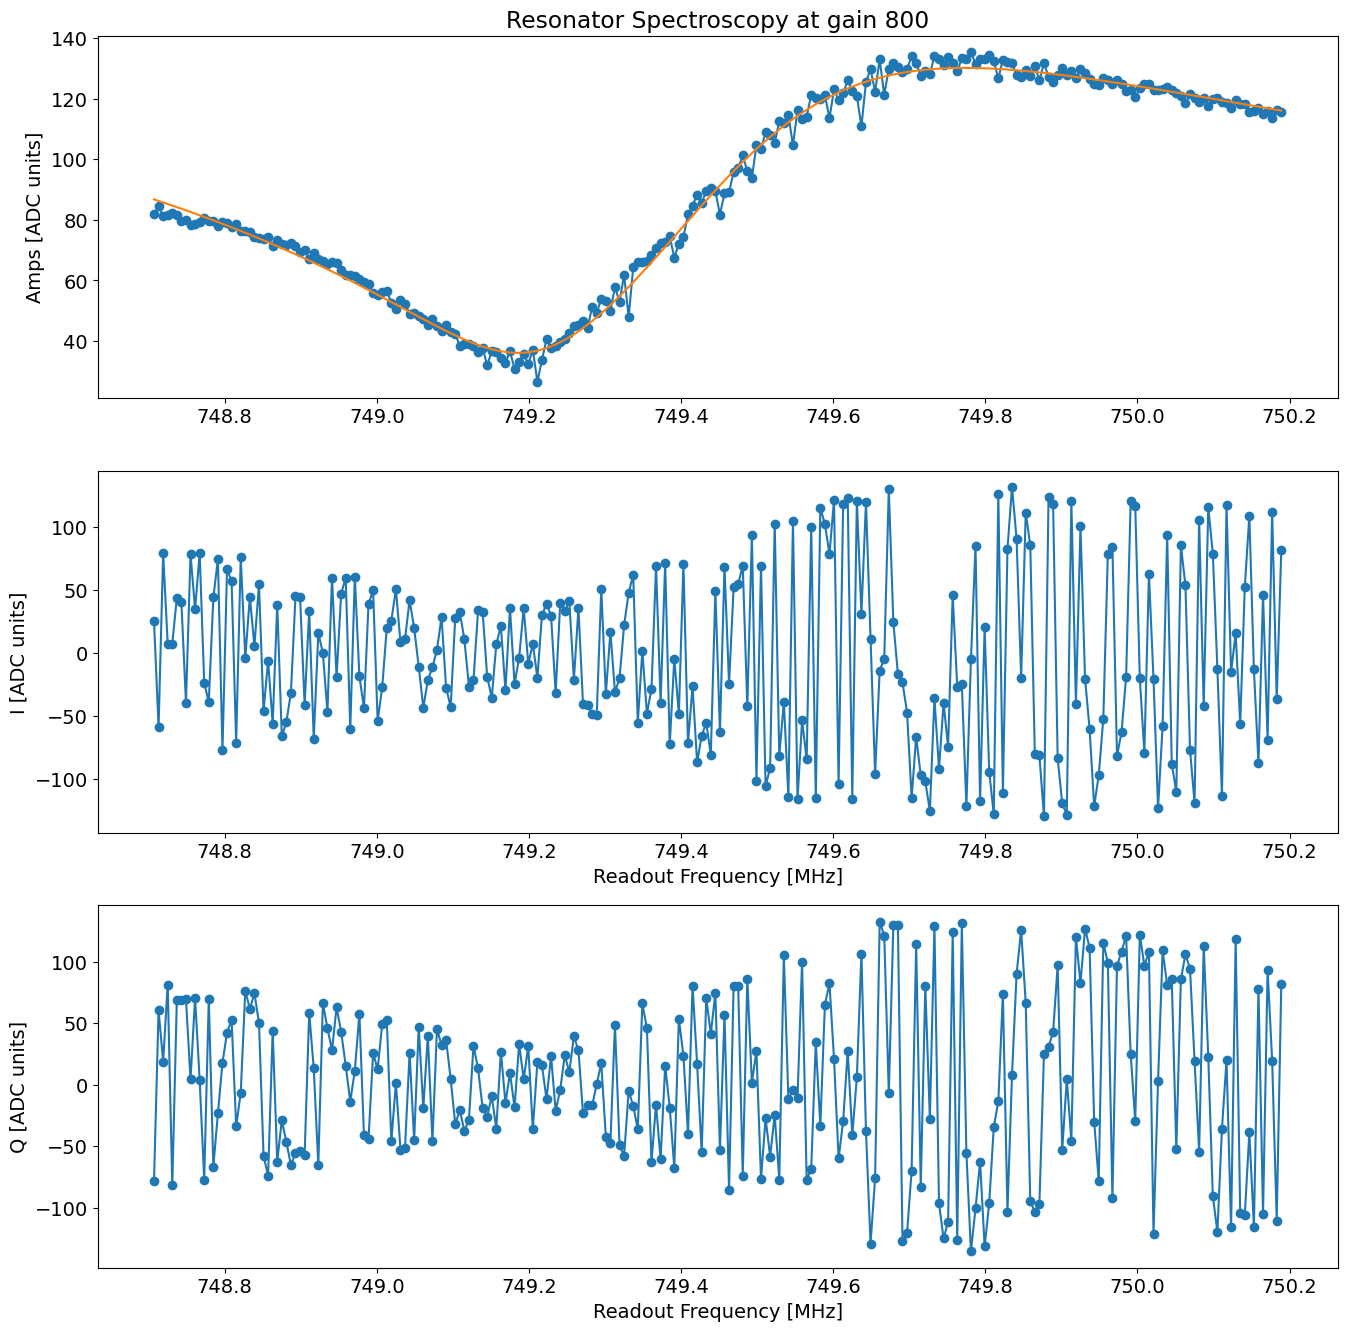

In [9]:
# Execute
# =================================
rspec_runner = CharacterizationRunner(
    station = station,
    ExptClass = meas.ResonatorSpectroscopyExperiment,
    default_expt_cfg = resspec_defaults,
    preprocessor = resspec_preproc,
    postprocessor = None, # resspec_postproc, # uncomment if you want to update the readout freq from this expt
    job_client=client,
)

if expts_to_run['res_spec']:
    rspec = rspec_runner.execute()
    rspec.display()

In [ ]:
# station.preview_config_update()

Comparing configurations:
Parent config file: D:\python\multimode_expts\configs\versions\hardware_config\CFG-HW-20260121-00005.yml


## Single Shot

In [28]:
# Define defaults, smart config preprocessing and post-measurement updates
# =====================================
singleshot_defaults = AttrDict(dict(    
    reps=5000,
    relax_delay=500,
    check_f=False,
    active_reset=False,
    man_reset=False,
    storage_reset=False,
    qubit=0,
    pulse_manipulate=False,
    cavity_freq=4984.373226159381,
    cavity_gain=400,
    cavity_length=2,
    prepulse=False,
    pre_sweep_pulse=None,
    gate_based=True,
    qubits=[0],
)) # Shouldn't be modifying this on the fly!
# You can use kwargs in the run function to override these values

def singleshot_postproc(station, expt):
    expt.analyze(plot=False, station=station, subdir=station.autocalib_path)
    fids = expt.data['fids']
    confusion_matrix = expt.data['confusion_matrix']
    thresholds_new = expt.data['thresholds']
    angle = expt.data['angle']
    print(fids)

    hardware_cfg = station.hardware_cfg
    hardware_cfg.device.readout.phase = [hardware_cfg.device.readout.phase[0] + angle]
    hardware_cfg.device.readout.threshold = thresholds_new
    hardware_cfg.device.readout.threshold_list = [thresholds_new]
    hardware_cfg.device.readout.Ie = [np.median(expt.data['Ie_rot'])]
    hardware_cfg.device.readout.Ig = [np.median(expt.data['Ig_rot'])]
    if expt.cfg.expt.active_reset:
        hardware_cfg.device.readout.confusion_matrix_with_active_reset = confusion_matrix
    else:
        hardware_cfg.device.readout.confusion_matrix_without_reset = confusion_matrix
    print('Updated readout!')

Job submitted: JOB-20260212-00368 (queue position: 1)

[0.1s] Job JOB-20260212-00368: pending

[220.3s] Job JOB-20260212-00368: running
[WORKER] Loading HistogramExperiment from experiments.single_qubit.single_shot
[WORKER] Creating experiment instance
[WORKER]   Data file: JOB-20260212-00368_HistogramExperiment.h5
[WORKER] Running experiment...
[WORKER] Setting coupler yoko current to 0.5mA according to hardware_cfg yaml...
[WORKER] Done setting coupler current
 66%|████████████████████████▏            | 3276/5000 [00:06<00:03, 498.93it/s]
[247.3s] Job JOB-20260212-00368: completed
100%|█████████████████████████████████████| 5000/5000 [00:10<00:00, 499.50it/s]
Unrotated:
Ig 429.8305288461538 +/- 70.32363191855401 	 Qg 244.5612980769231 +/- 71.48411876468998 	 Amp g 494.53464190613977
Ie 5.501201923076923 +/- 102.87653790361792 	 Qe 446.83774038461536 +/- 63.20258532432957 	 Amp e 446.87160287338395
Rotated:
Ig -284.5469544963628 +/- 82.52781701519386 	 Qg -404.1657215128045 +/- 56.960

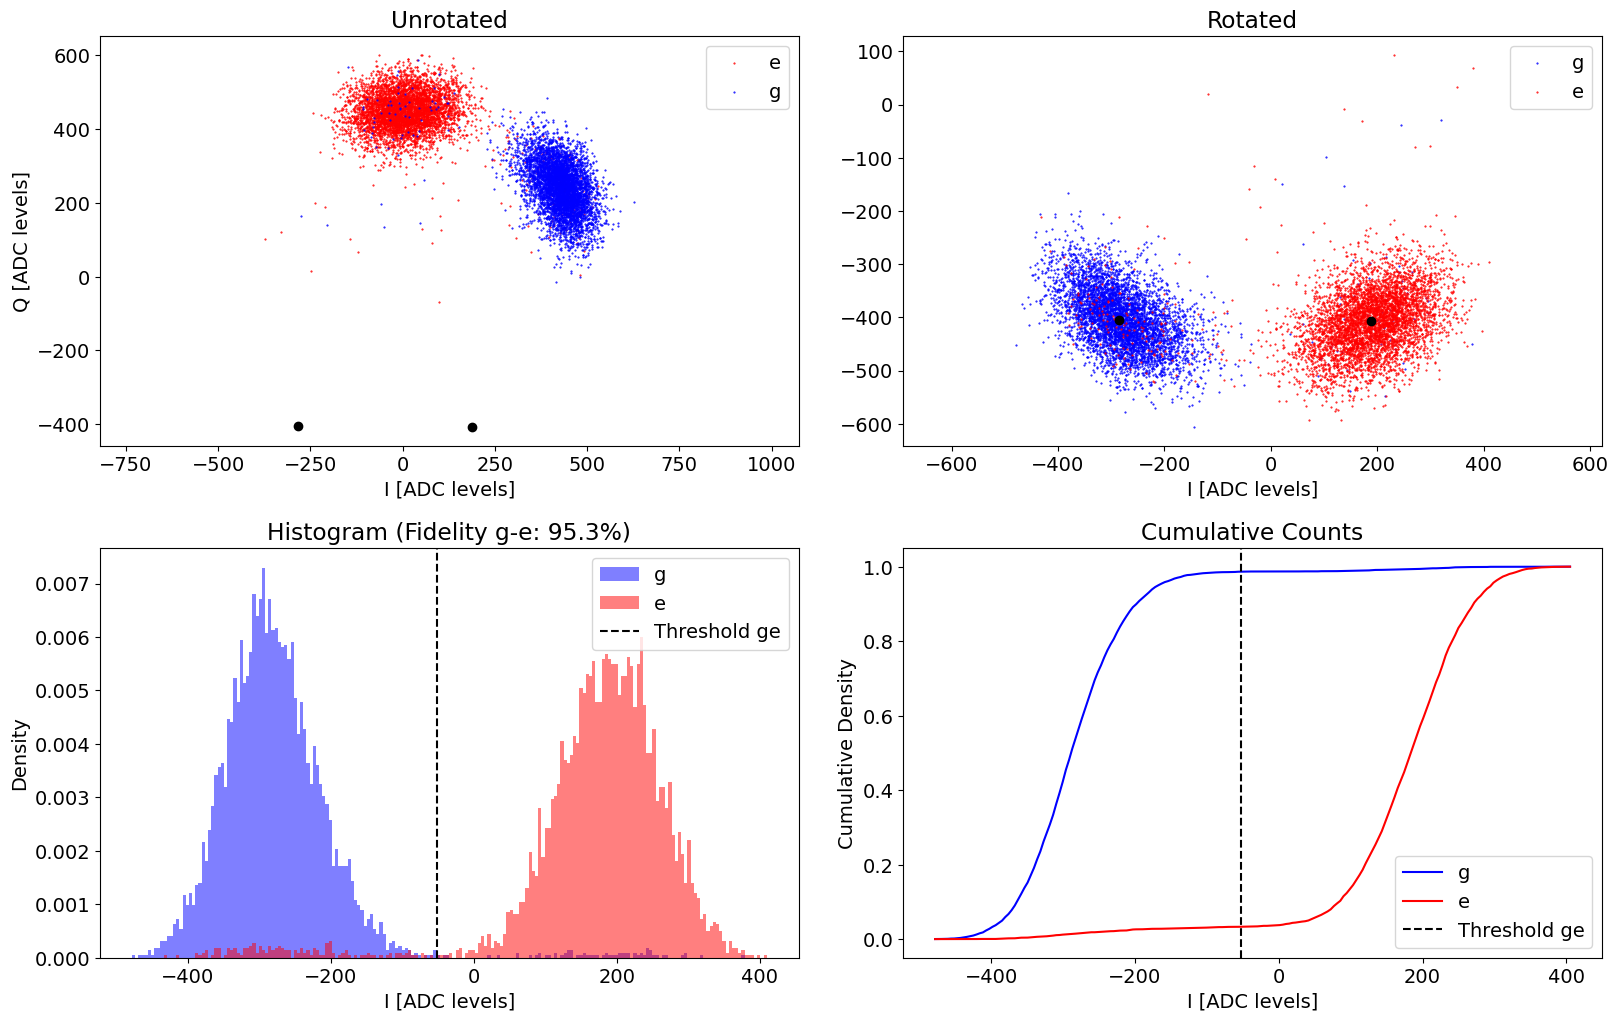

Plot saved to D:\experiments\260206_dump_mode\plots\2026-02-12_16-39-00_histogram.png
Plot reference appended to D:\experiments\260206_dump_mode\logs\2026-02-12.md
ge fidelity (%): 95.34
rotation angle (deg): -154.5130105990304
threshold ge: -51.94488517118975


In [105]:
# Execute
# =================================
ss_runner = CharacterizationRunner(
    station = station,
    ExptClass = meas.HistogramExperiment,
    default_expt_cfg = singleshot_defaults,
    postprocessor = singleshot_postproc,
    job_client=client,
)

if expts_to_run['single_shot']:
    ss = ss_runner.execute(
        check_f=False,
        # active_reset=False, # on recalibration of readout, turn off active reset because it will be wrong for selecting when to apply the qubit pulse
        relax_delay=2000,


        reps=5000,
        # active_reset=True,
        # relax_delay=200,
    )
    ss.display(station)

In [20]:
station.snapshot_hardware_config(update_main=False)
station.preview_config_update()

[CONFIG] Created new hardware_config version CFG-HW-20260127-00047
Comparing configurations:
Parent config file: D:\python\multimode_expts\configs\versions\hardware_config\CFG-HW-20260127-00035.yml
Key 'device.readout.phase' differs:
  Old value (config1): [246.152881385227]
  New value (config2): [254.61960210230458]
Key 'device.readout.threshold' differs:
  Old value (config1): [-18.92390542003048]
  New value (config2): [-39.78383556251916]
Key 'device.readout.threshold_list' differs:
  Old value (config1): [[-18.92390542003048]]
  New value (config2): [[-39.78383556251916]]
Key 'device.readout.confusion_matrix_without_reset' differs:
  Old value (config1): [0.9806, 0.019399999999999973, 0.038400000000000004, 0.9616]
  New value (config2): [0.9751999999999996, 0.024800000000000377, 0.03560712142428485, 0.9643928785757152]
Key 'device.readout.Ie' differs:
  Old value (config1): [44.45161397531844]
  New value (config2): [26.56067319319294]
Key 'device.readout.Ig' differs:
  Old value

In [14]:
station.snapshot_hardware_config(update_main=True)

[CONFIG] Created new hardware_config version CFG-HW-20260122-00009
[CONFIG] Updated main hardware_config to CFG-HW-20260122-00009


'CFG-HW-20260122-00009'

## Qubit ge

### Pulse-probe

In [55]:
# Define defaults, smart config preprocessing and post-measurement updates
# =====================================
gespec_defaults = AttrDict(dict(    
    # start=center-span/2,  # [MHz]
    # step=span/expts,  # min step ~1 MHz
    expts=200,  # Number of experiments stepping from start
    reps=100,  # Number of averages per point
    rounds=1,  # Number of start to finish sweeps to average over
    length=1,  # Qubit probe constant pulse length [us]
    gain=100,  # Qubit pulse gain
    sigma=0.1,  # Qubit flat top sigma
    qubit=[0],
    qubits=[0],
    prepulse=False,
    pre_sweep_pulse=[],
    gate_based=False,
    relax_delay=250,  # Wait time between experiments [us]
)) # Shouldn't be modifying this on the fly!
# You can use kwargs in the run function to override these values


def gespec_preproc(station, default_expt_cfg, **kwargs):
    expt_cfg = deepcopy(default_expt_cfg)

    span = kwargs.pop('span', 10)  # MHz
    center = kwargs.pop('center', station.hardware_cfg.device.qubit.f_ge[0])
    expts = kwargs.pop('expts', default_expt_cfg.expts)

    expt_cfg.start = center - span / 2
    expt_cfg.step = span / expts
    
    expt_cfg.update(kwargs)
    return expt_cfg

def gespec_postproc(station, expt):
    old_freq = station.hardware_cfg.device.qubit.f_ge[0]
    station.hardware_cfg.device.qubit.f_ge = [expt.data['fit_avgi'][2]]
    print(f'Updated qubit frequency from {old_freq} to {station.hardware_cfg.device.qubit.f_ge[0]}!')
    station.snapshot_hardware_config(update_main=False)

Job submitted: JOB-20260206-00171 (queue position: 1)

[0.1s] Job JOB-20260206-00171: pending

[2.1s] Job JOB-20260206-00171: running
[WORKER] Loading PulseProbeSpectroscopyExperiment from experiments.single_qubit.pulse_probe_spectroscopy
[WORKER] Creating experiment instance
[WORKER]   Data file: JOB-20260206-00171_PulseProbeSpectroscopyExperiment.h5
[WORKER] Running experiment...
[WORKER] Setting coupler yoko current to 0.23mA according to expt.cfg...
[WORKER] Done setting coupler current
 49%|█████████████████▏                 | 9828/20000 [00:02<00:02, 3934.38it/s]
[36.6s] Job JOB-20260206-00171: completed
100%|██████████████████████████████████| 20000/20000 [00:05<00:00, 3935.65it/s]
Saving D:\experiments\260206_dump_mode\data\JOB-20260206-00171_PulseProbeSpectroscopyExperiment.h5
[WORKER] Saving expt object to: D:\experiments\260206_dump_mode\expt_objs\JOB-20260206-00171_expt.pkl

Job completed! Data: D:\experiments\260206_dump_mode\data\JOB-20260206-00171_PulseProbeSpectroscopyE

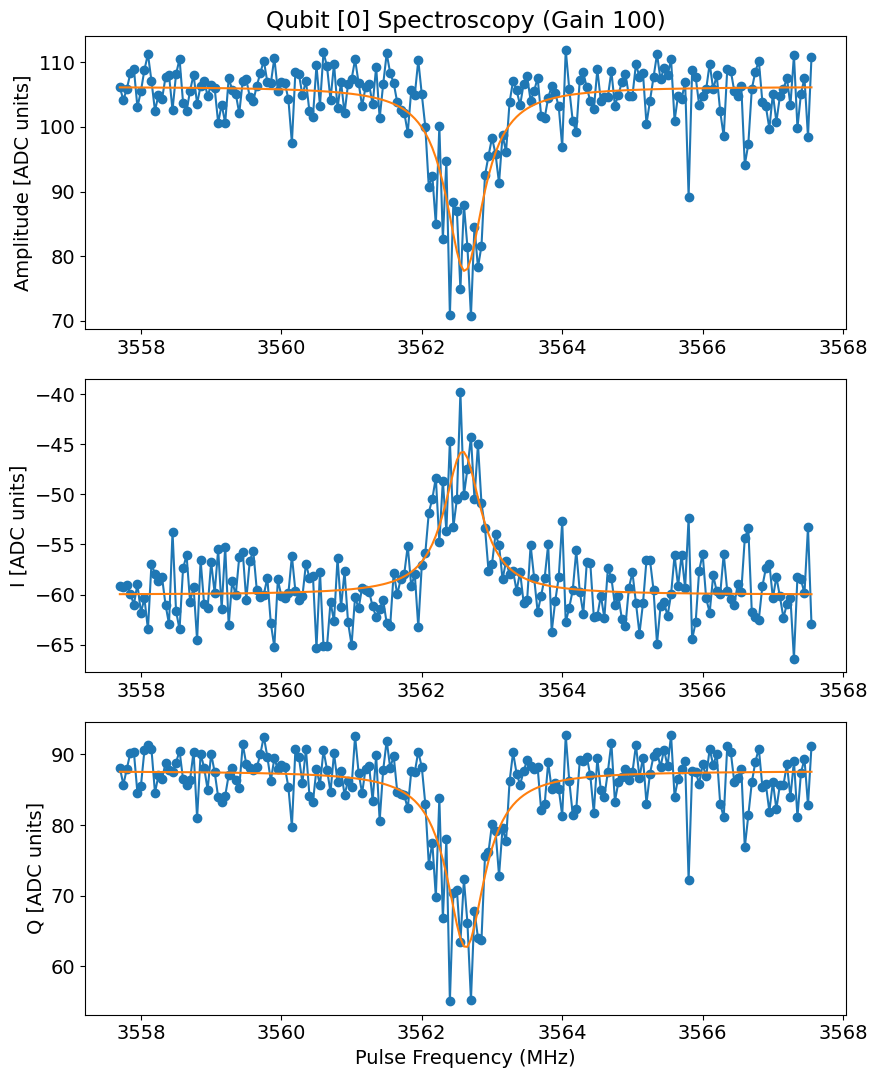

In [57]:
# Execute
# =================================
gespec_runner = CharacterizationRunner(
    station = station,
    ExptClass = meas.PulseProbeSpectroscopyExperiment,
    default_expt_cfg = gespec_defaults,
    preprocessor = gespec_preproc,
    # postprocessor = gespec_postproc,
    job_client=client,
)

if expts_to_run['pulse_probe_ge']:
    gespec = gespec_runner.execute(
        coupler_current=coupler_current,
    )
    gespec.display()

In [ ]:
station.preview_config_update()
# station.snapshot_hardware_config(update_main=True)

### T2 Ramsey

In [ ]:
# Define defaults, smart config preprocessing and post-measurement updates
# =====================================
from sqlalchemy import false


geramsey_defaults = AttrDict(dict(
    ramsey_freq=0.2,  # [MHz]
    start=0.01, # us
    step=0.5,
    expts=101,
    reps=200,
    rounds=1,
    pre_sweep_pulse=None,
    post_sweep_pulse=None,
    if_ef=False,
    ef_init=True, # redundant
    qubits=[0],
    user_defined_freq=[False, 3568.2038290468167, 5304, 0.035],
    f0g1_cavity=0,
    normalize=False,
    active_reset=False,
    man_reset=False,
    storage_reset=False,
    prepulse=None,
    postpulse=None,
    pre_active_reset_pulse=False,
    gate_based=False,
    advance_phase=0,
    echoes=[False, 0],
    relax_delay=200
)) # Shouldn't be modifying this on the fly!
# You can use kwargs in the run function to override these values

def geramsey_preproc(station, default_expt_cfg, **kwargs):
    expt_cfg = deepcopy(default_expt_cfg)
    expt_cfg.update(kwargs)

    # Copied over but what's all this below????
    # Which ones are actually used? 
    # Can we straighten out all the nested boolean logic???
    checkEF = False
    qubit_ge_init = False
    qubit_ge_after = False
    if expt_cfg.if_ef:
        checkEF = True
        qubit_ge_init = True if expt_cfg.ef_init else False
        qubit_ge_after = True if expt_cfg.ef_init else False
    expt_cfg.checkEF = checkEF
    expt_cfg.qubit_ge_init = qubit_ge_init
    expt_cfg.qubit_ge_after = qubit_ge_after

    expt_cfg.prepulse = False if expt_cfg.pre_sweep_pulse is None else True if expt_cfg.prepulse is None else expt_cfg.prepulse,
    expt_cfg.postpulse = False if expt_cfg.post_sweep_pulse is None else True if expt_cfg.postpulse is None else expt_cfg.postpulse,
    
    return expt_cfg

def geramsey_postproc(station, expt):
    old_freq = station.hardware_cfg.device.qubit.f_ge[0]
    station.hardware_cfg.device.qubit.f_ge = [
        station.hardware_cfg.device.qubit.f_ge[0] + min(expt.data['f_adjust_ramsey_avgi'])
    ]
    print(f'Updated qubit frequency from {old_freq} to {station.hardware_cfg.device.qubit.f_ge[0]}!')
    station.snapshot_hardware_config(update_main=False)

fge is  3562.613351269981
fef is  3419.0415164961432


  0%|          | 0/20200 [00:00<?, ?it/s]

No echoes in the data
Saving D:\experiments\260112_qsim_calibration_practice\data\00026_RamseyExperiment.h5
Current pi pulse frequency: 3562.613351269981
Fit frequency from I [MHz]: 0.20259015484996745 +/- 0.0001843606621277634
Suggested new pi pulse frequency from fit I [MHz]:
 	3562.610761115131
 	3563.015941424831
T2 Ramsey from fit I [us]: 261.8132779880607
Fit frequency from Q [MHz]: 0.047095966321008174 +/- 0.006084899168265302
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3562.7662553036603
 	3562.860447236302
T2 Ramsey from fit Q [us]: 24.45341996316469


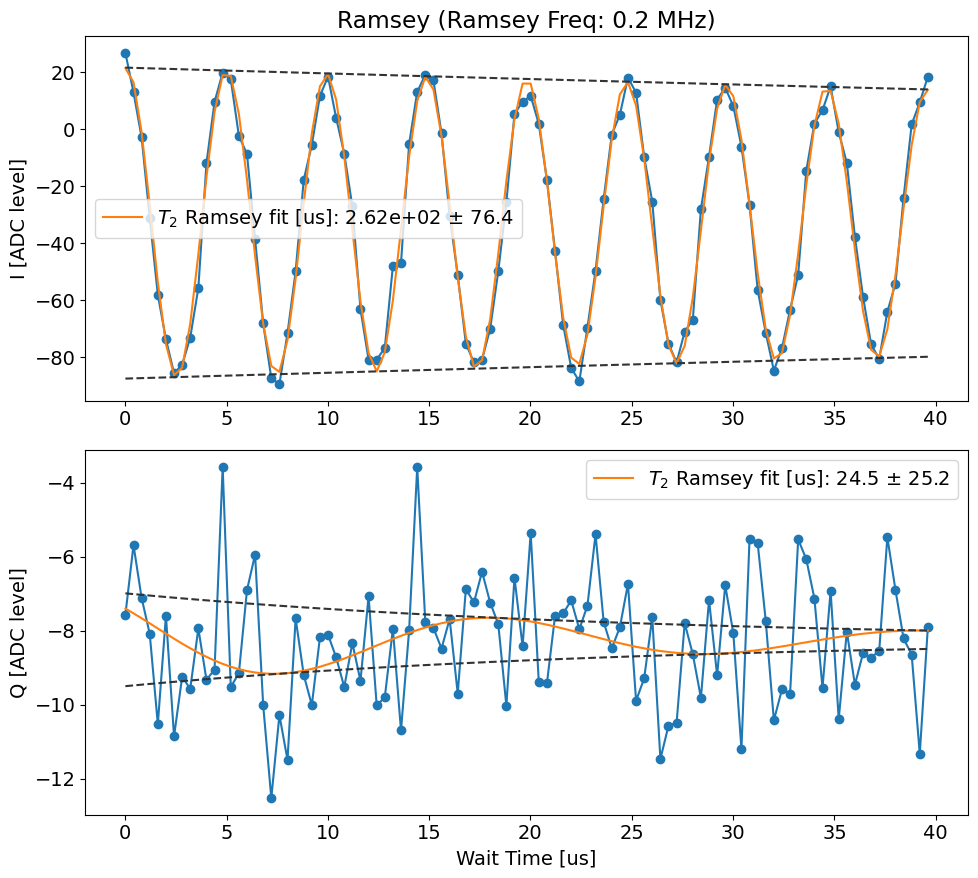

Updated qubit frequency from 3562.613351269981 to 3562.610761115131!


In [ ]:
# Execute
# =================================
geramsey_runner = CharacterizationRunner(
    station = station,
    ExptClass = meas.RamseyExperiment,
    default_expt_cfg = geramsey_defaults,
    preprocessor = geramsey_preproc,
    postprocessor = geramsey_postproc,
    job_client=client,
)

if expts_to_run['t2_ge']:
    geramsey = geramsey_runner.execute(
        ramsey_freq = 0.2,
        step=0.4,
        active_reset=False,
        relax_delay=2500,
        postprocess=True,
        if_ef=False,
    )
    geramsey.display()

In [ ]:
station.preview_config_update()
# station.snapshot_hardware_config(update_main=True)

### Amplitude Rabi

We should probably use a cosine fit with fixed phase=0 instead of decaying sine with varying phase?

In [ ]:
# Define defaults, smart config preprocessing and post-measurement updates
# =====================================
amprabi_defaults = AttrDict(dict(
    start=0,
    step=60,
    expts=151,
    reps=200,
    rounds=1,
    sigma_test=None,
    qubit=0,
    pulse_type='gauss',
    drag_beta=0.0,
    pulse_ge_init=False,
    pulse_ge_after=False,
    checkZZ=False,
    checkEF=False,
    qubits=[0],
    flat_length=0,
    normalize=False,
    single_shot=False,
    singleshot_reps=10000,
    span=50,
    user_defined_freq=[False, 3568.203829046816],
    prepulse=False,
    postpulse=False, 
    if_ef=False,  # If true, will check ef frequency and update it
)) # Shouldn't be modifying this on the fly!
# You can use kwargs in the run function to override these values

def amprabi_preproc(station, default_expt_cfg, **kwargs):
    expt_cfg = deepcopy(default_expt_cfg)
    expt_cfg.update(kwargs)

    # Copied over but what's all this below????
    # Which ones are actually used? 
    # Can we straighten out all the nested boolean logic???
    pulse_ge = station.hardware_cfg.device.qubit.pulses.pi_ge
    if expt_cfg.sigma_test is None:
        expt_cfg.sigma_test = pulse_ge.sigma[0]
    if expt_cfg.step is None:
        expt_cfg.step = int(pulse_ge.gain[0] / (expt_cfg.expts - 1))
    
    expt_cfg.checkEF = False
    expt_cfg.pulse_ge_init = False
    expt_cfg.pulse_ge_after = False
    if expt_cfg.if_ef:
        expt_cfg.checkEF = True
        expt_cfg.pulse_ge_init = True
        expt_cfg.pulse_ge_after = True
    
    return expt_cfg

def amprabi_postproc(station, expt):
    station.hardware_cfg.device.qubit.pulses.pi_ge.gain = [expt.data['pi_gain_avgi']]
    station.hardware_cfg.device.qubit.pulses.hpi_ge.gain = [expt.data['hpi_gain_avgi']]
    print('Updated qubit ge pi and hpi gaussian gain!')
    station.snapshot_hardware_config(update_main=False)

  0%|          | 0/30200 [00:00<?, ?it/s]

Attempted to init fitparam 4 to -38.85972764542301, which is out of bounds -12.932359307359308 to -4.106612554112554. Instead init to -8.51948593073593
Attempted to init fitparam 4 to -8.51948593073593, which is out of bounds 5.834305708346742 to 92.99063326600597. Instead init to 49.41246948717636
Saving D:\experiments\260112_qsim_calibration_practice\data\00008_AmplitudeRabiExperiment.h5
Pi gain from avgi data [dac units]: 3289
	Pi/2 gain from avgi data [dac units]: 1629
Pi gain from avgq data [dac units]: 3268
	Pi/2 gain from avgq data [dac units]: 786


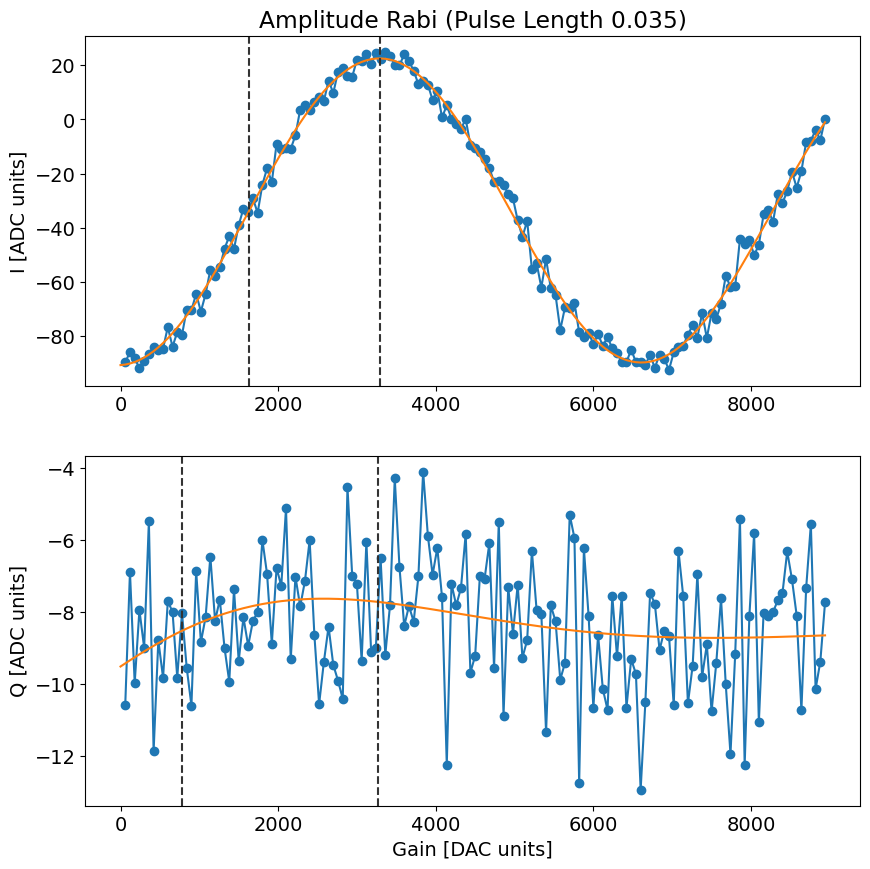

Updated qubit ge pi and hpi gaussian gain!
fge is  3562.610761115131
fef is  3419.0415164961432


  0%|          | 0/20200 [00:00<?, ?it/s]

No echoes in the data
Saving D:\experiments\260112_qsim_calibration_practice\data\00027_RamseyExperiment.h5
Current pi pulse frequency: 3562.610761115131
Fit frequency from I [MHz]: 0.20022782082373075 +/- 0.0001778466326411408
Suggested new pi pulse frequency from fit I [MHz]:
 	3562.6105332943075
 	3563.0109889359546
T2 Ramsey from fit I [us]: 418.0283426122109
Fit frequency from Q [MHz]: 0.20176082701121514 +/- 0.0023276508272821878
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3562.6090002881197
 	3563.012521942142
T2 Ramsey from fit Q [us]: 118.2657395848334


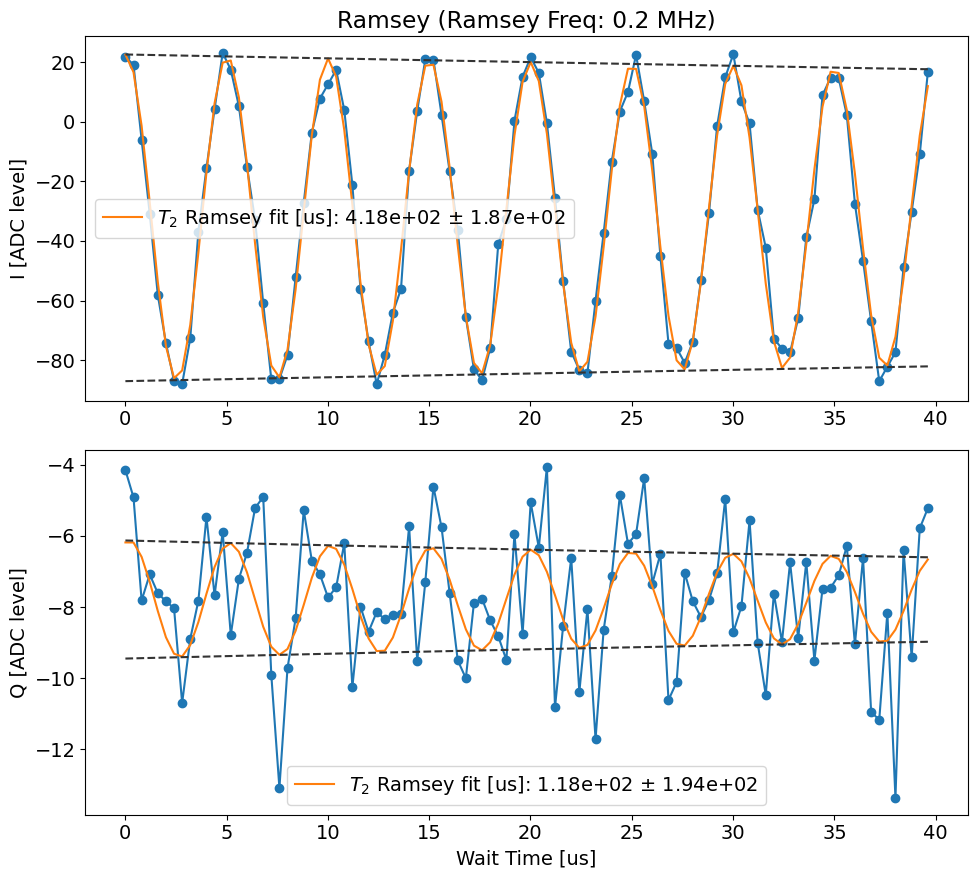

Updated qubit frequency from 3562.610761115131 to 3562.6105332943075!


In [ ]:
# Execute
# =================================
amprabi_runner = CharacterizationRunner(
    station = station,
    ExptClass = meas.AmplitudeRabiExperiment,
    default_expt_cfg = amprabi_defaults,
    preprocessor = amprabi_preproc,
    postprocessor = amprabi_postproc,
    job_client=client,
)

if expts_to_run['amplitude_ge']:
    amprabi = amprabi_runner.execute(
        relax_delay=2500,
        postprocess=True,
    )
    amprabi.display()

    #After amplitude calibration, do another T2 Ramsey to fine tune frequency
    #Added by Jonginn, as a part of practice
    #Please remove if the below code causes any problem.
    t2_ramsey_ge_after_amp = geramsey_runner.execute(
        ramsey_freq = 0.2,
        step = 0.4,
        active_reset = True,
        relax_delay=250,
    )
    t2_ramsey_ge_after_amp.display()


In [ ]:
station.preview_config_update()
# station.snapshot_hardware_config(update_main=True)

### T1

In [ ]:
# Define defaults, smart config preprocessing and post-measurement updates
# =====================================
t1_ge_defaults = AttrDict(dict(
    start=0,
    step=20,
    expts=100,
    reps=100,
    rounds=1,
    qubit=0,
    qubit_ef=False,
    normalize=False,
    relax_delay=2500,
))

def t1_ge_postproc(station, expt):
    station.hardware_cfg.device.qubit.T1 = [expt.data['fit_avgi'][3]]
    print('Updated qubit T1!')
    station.snapshot_hardware_config(update_main=False)


  0%|          | 0/10000 [00:00<?, ?it/s]

Saving D:\experiments\260112_qsim_calibration_practice\data\00005_T1Experiment.h5
Fit T1 avgi [us]: 393.0070389378491
Fit T1 avgq [us]: 725.2991444687509


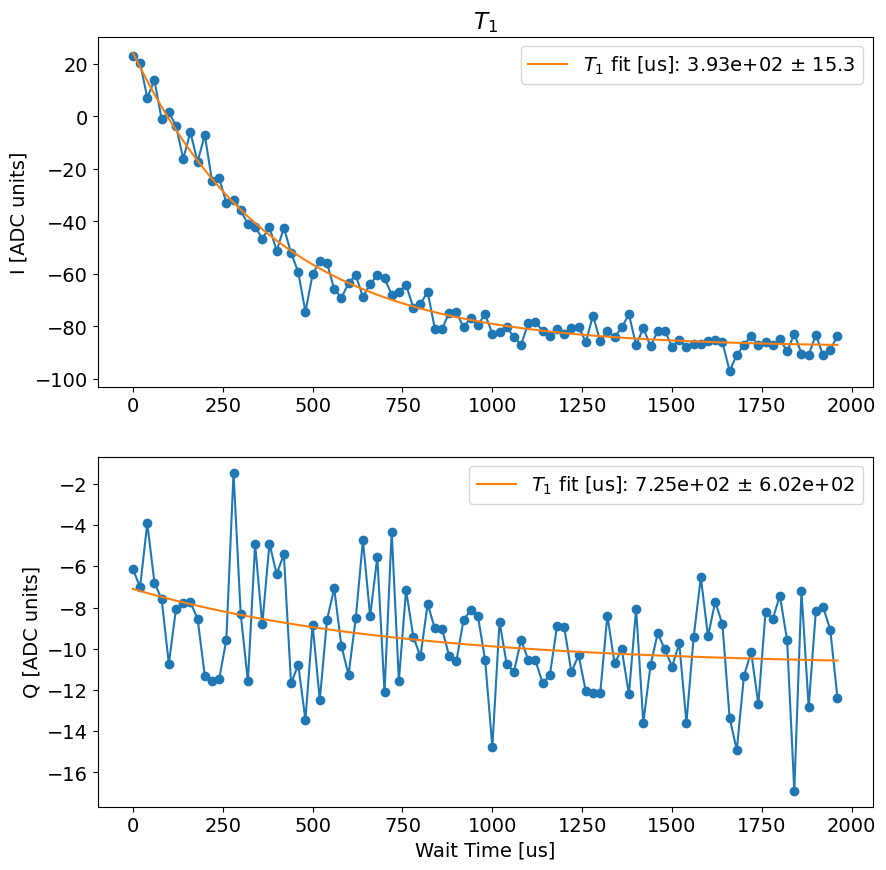

Updated qubit T1!


In [ ]:
# Execute
# =================================
t1_ge_runner = CharacterizationRunner(
    station=station,
    ExptClass=meas.single_qubit.t1.T1Experiment,
    default_expt_cfg=t1_ge_defaults,
    postprocessor=t1_ge_postproc,
    job_client=client,
)

if expts_to_run['t1_ge']:
    t1_ge = t1_ge_runner.execute()
    t1_ge.display()

In [ ]:
station.preview_config_update()
# station.snapshot_hardware_config(update_main=True)

## Qubit ef

### Pulse-probe

In [ ]:
# Define defaults, smart config preprocessing and post-measurement updates
# =====================================
efspec_defaults = AttrDict(dict(
    start=3415,
    step=0.05,
    expts=500,
    reps=200,
    rounds=1,
    length=1,
    gain=100,
    qubit_f=False,
    qubit=0,
    cavity_drive=False,
    wait_qubit=False,
    relax_delay=500,
))

def efspec_postproc(station, expt):
    old_freq = station.hardware_cfg.device.qubit.f_ef[0]
    station.hardware_cfg.device.qubit.f_ef = [expt.data['fit_avgi'][2]]
    print(f'Updated qubit ef frequency from {old_freq} to {station.hardware_cfg.device.qubit.f_ef[0]}!')
    station.snapshot_hardware_config(update_main=False)

  0%|          | 0/100000 [00:00<?, ?it/s]

Saving D:\experiments\260112_qsim_calibration_practice\data\00004_PulseProbeEFSpectroscopyExperiment.h5
Found peak in amps at [MHz] 3419.016401019646, HWHM -0.4554925231687473
Found peak in I at [MHz] 3419.015754059691, HWHM -0.38994888760706525
Found peak in Q at [MHz] 3419.0221597934615, HWHM -0.40329556360989866


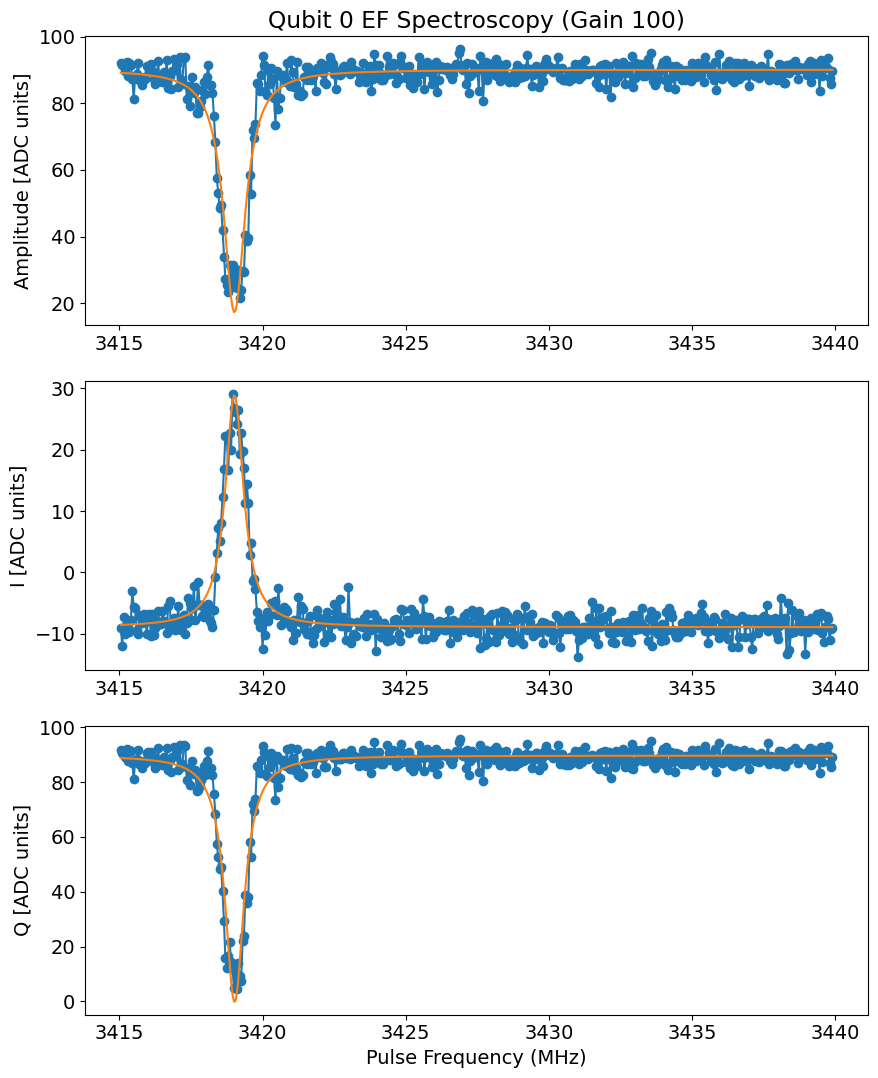

Updated qubit ef frequency from 3419.0415164961432 to 3419.015754059691!


In [ ]:
# Execute
# =================================
efspec_runner = CharacterizationRunner(
    station=station,
    ExptClass=meas.PulseProbeEFSpectroscopyExperiment,
    default_expt_cfg=efspec_defaults,
    postprocessor=efspec_postproc,
    job_client=client,
)

if expts_to_run['pulse_probe_ef']:
    qspec_ef = efspec_runner.execute()
    qspec_ef.display()

### T2 Ramsey

In [ ]:
# Define defaults, smart config preprocessing and post-measurement updates
# =====================================
# Reuse ge defaults but with if_ef=True
eframsey_defaults = AttrDict(deepcopy(geramsey_defaults))
eframsey_defaults.if_ef = True
eframsey_defaults.ef_init = True
eframsey_defaults.ramsey_freq = 3  # Typical ef ramsey frequency

def eframsey_postproc(station, expt):
    old_freq = station.hardware_cfg.device.qubit.f_ef[0]
    station.hardware_cfg.device.qubit.f_ef = [
        station.hardware_cfg.device.qubit.f_ef[0] + min(expt.data['f_adjust_ramsey_avgi'])
    ]
    print(f'Updated qubit ef frequency from {old_freq} to {station.hardware_cfg.device.qubit.f_ef[0]}!')
    station.snapshot_hardware_config(update_main=False)

fge is  3562.6105332943075
fef is  3419.015754059691


  0%|          | 0/20200 [00:00<?, ?it/s]

No echoes in the data
Saving D:\experiments\260112_qsim_calibration_practice\data\00028_RamseyExperiment.h5
Current pi pulse frequency: 3419.015754059691
Fit frequency from I [MHz]: 0.48062026743084274 +/- 0.000742730949200538
Suggested new pi pulse frequency from fit I [MHz]:
 	3419.0351337922602
 	3419.996374327122
T2 Ramsey from fit I [us]: 95.93279720097566
Fit frequency from Q [MHz]: 0.4810249791895802 +/- 0.0008053359257081703
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3419.0347290805016
 	3419.9967790388805
T2 Ramsey from fit Q [us]: 137.5865838573234


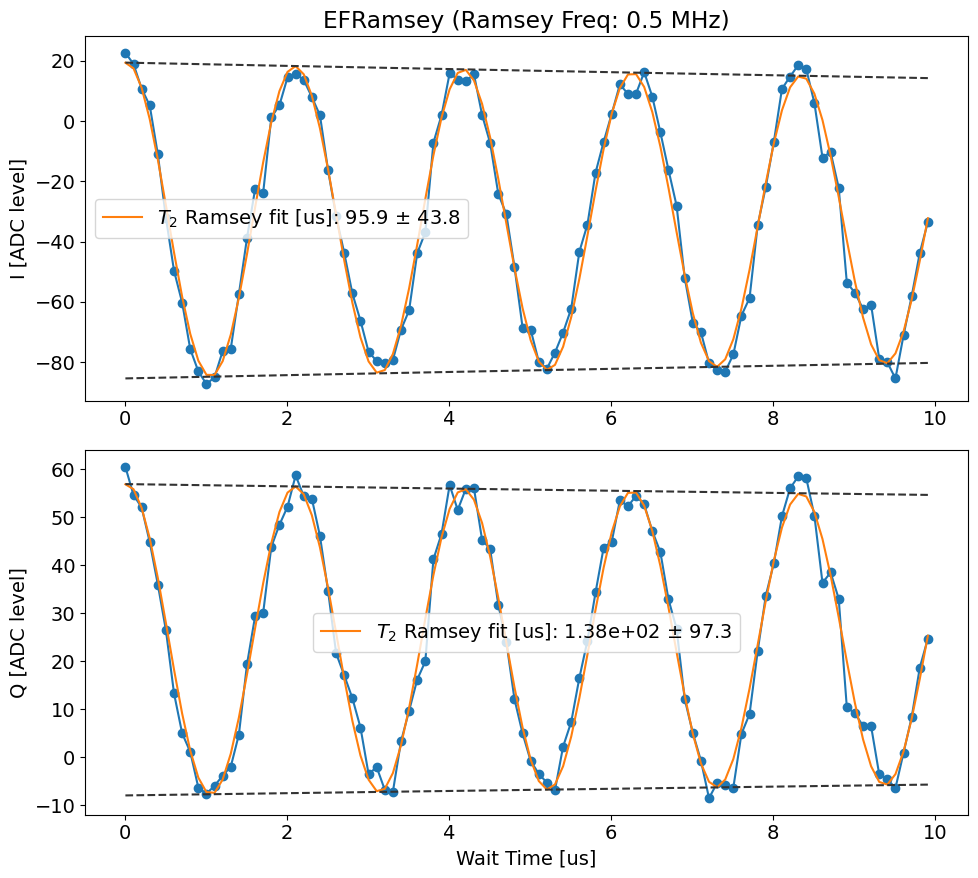

Updated qubit ef frequency from 3419.015754059691 to 3419.0351337922602!


In [ ]:
# Execute
# =================================
eframsey_runner = CharacterizationRunner(
    station=station,
    ExptClass=meas.RamseyExperiment,
    default_expt_cfg=eframsey_defaults,
    preprocessor=geramsey_preproc,  # Reuse ge preprocessor
    postprocessor=eframsey_postproc,
    job_client=client,
)

if expts_to_run['t2_ef']:
    t2ramsey_ef = eframsey_runner.execute(
        ramsey_freq=0.5,
        step = 0.1,
        relax_delay=2500,
        active_reset=True,
    )
    t2ramsey_ef.display()

In [ ]:
station.preview_config_update()
# station.snapshot_hardware_config(update_main=True)

### Amplitude Rabi

We should probably use a cosine fit with fixed phase=0 instead of decaying sine with varying phase?

In [ ]:
# Define defaults, smart config preprocessing and post-measurement updates
# =====================================
# Reuse ge defaults but with if_ef=True
efamprabi_defaults = AttrDict(deepcopy(amprabi_defaults))
efamprabi_defaults.if_ef = True
efamprabi_defaults.step = 40  # Typical ef amplitude step
efamprabi_defaults.expts = 150

def efamprabi_postproc(station, expt):
    station.hardware_cfg.device.qubit.pulses.pi_ef.gain = [expt.data['pi_gain_avgi']]
    station.hardware_cfg.device.qubit.pulses.hpi_ef.gain = [expt.data['hpi_gain_avgi']]
    print('Updated qubit ef pi and hpi gaussian gain!')
    station.snapshot_hardware_config(update_main=False)

  0%|          | 0/30000 [00:00<?, ?it/s]

Attempted to init fitparam 4 to -31.238300216450213, which is out of bounds -11.694707792207792 to 60.27384199134199. Instead init to 24.289567099567098
Attempted to init fitparam 4 to 24.289567099567098, which is out of bounds 35.946989477509874 to 94.14184385848756. Instead init to 65.04441666799872
Saving D:\experiments\260112_qsim_calibration_practice\data\00009_AmplitudeRabiExperiment.h5
Pi gain from avgi data [dac units]: 3038
	Pi/2 gain from avgi data [dac units]: 1514
Pi gain from avgq data [dac units]: 3038
	Pi/2 gain from avgq data [dac units]: 1527


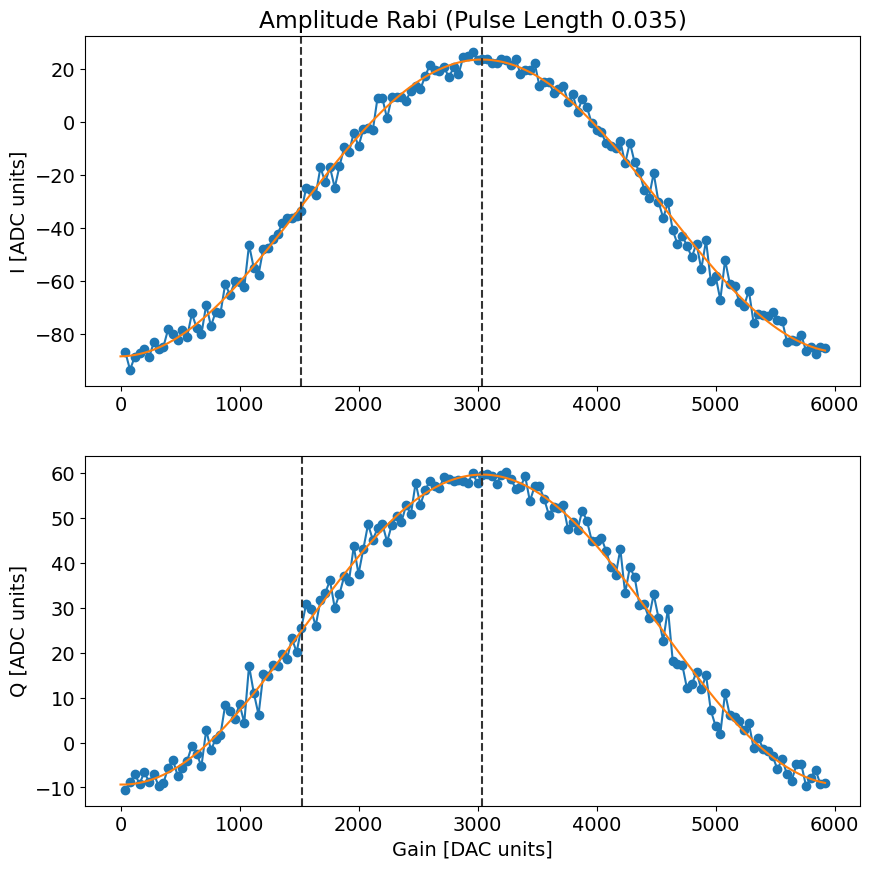

Updated qubit ef pi and hpi gaussian gain!
fge is  3562.6105332943075
fef is  3419.0351337922602


  0%|          | 0/20200 [00:00<?, ?it/s]

No echoes in the data
Saving D:\experiments\260112_qsim_calibration_practice\data\00029_RamseyExperiment.h5
Current pi pulse frequency: 3419.0351337922602
Fit frequency from I [MHz]: 0.4991217313182372 +/- 0.001361811899682974
Suggested new pi pulse frequency from fit I [MHz]:
 	3419.036012060942
 	3420.0342555235784
T2 Ramsey from fit I [us]: 16.76269934574044
Fit frequency from Q [MHz]: 0.5005322568083582 +/- 0.0014684469429258014
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3419.0346015354517
 	3420.035666049069
T2 Ramsey from fit Q [us]: 16.60380258639506


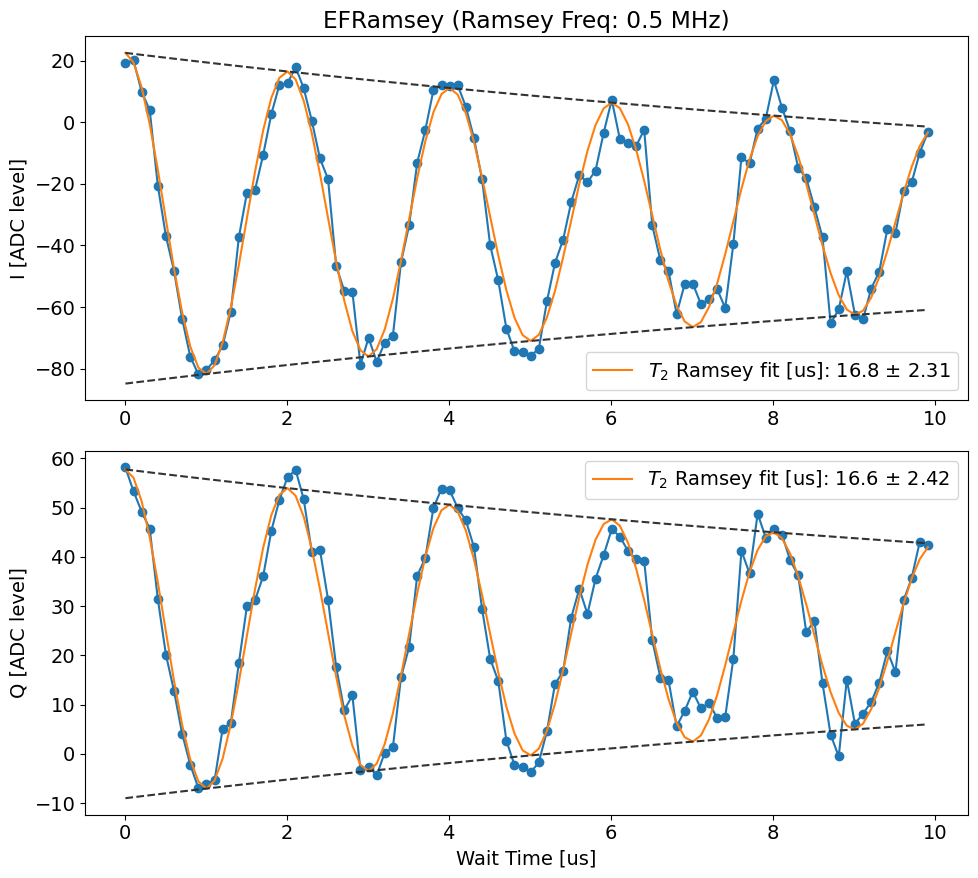

Updated qubit ef frequency from 3419.0351337922602 to 3419.036012060942!


In [ ]:
# Execute
# =================================
efamprabi_runner = CharacterizationRunner(
    station=station,
    ExptClass=meas.AmplitudeRabiExperiment,
    default_expt_cfg=efamprabi_defaults,
    preprocessor=amprabi_preproc,  # Reuse ge preprocessor
    postprocessor=efamprabi_postproc,
    job_client=client,
)

if expts_to_run['amplitude_ef']:
    amprabi_ef = efamprabi_runner.execute(
                relax_delay=2500,
    )
    amprabi_ef.display()
    
    # After amplitude calibration, do another T2 Ramsey to fine tune frequency
    t2_ramsey_ef_after_amp = eframsey_runner.execute(
        ramsey_freq=0.5,
        step = 0.1,
        relax_delay=2500,
    )
    t2_ramsey_ef_after_amp.display()

In [ ]:
station.preview_config_update()
# station.snapshot_hardware_config(update_main=True)

### T1

In [ ]:
# Define defaults, smart config preprocessing and post-measurement updates
# =====================================
t1_ef_defaults = AttrDict(dict(
    start=0,
    step=5,
    expts=100,
    reps=50,
    rounds=1,
    qubit=0,
    qubit_ef=True,
    normalize=False,
    relax_delay=2500,
))

def t1_ef_postproc(station, expt):
    station.hardware_cfg.device.qubit.T1_ef = [expt.data['fit_avgq'][3]]
    print('Updated qubit T1 ef!')
    station.snapshot_hardware_config(update_main=False)

  0%|          | 0/5000 [00:00<?, ?it/s]

Saving D:\experiments\260112_qsim_calibration_practice\data\00007_T1Experiment.h5
Fit T1 avgi [us]: 77.17010496621927
Fit T1 avgq [us]: 267.2742414577797


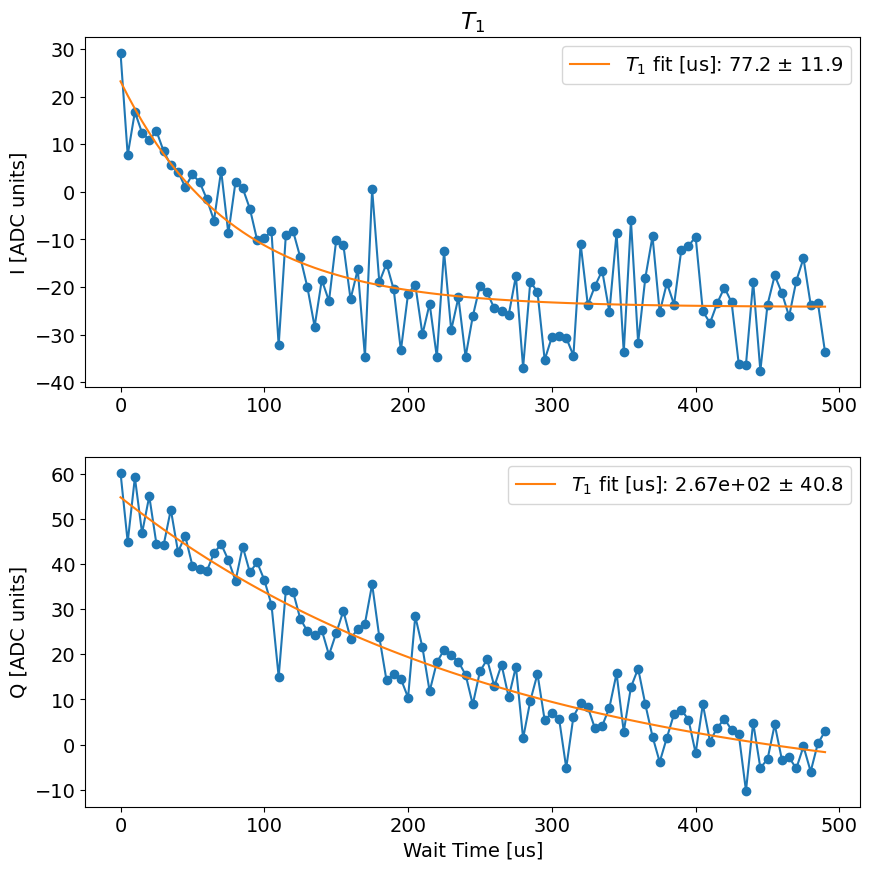

Updated qubit T1 ef!


In [ ]:
# Execute
# =================================
t1_ef_runner = CharacterizationRunner(
    station=station,
    ExptClass=meas.T1Experiment,
    default_expt_cfg=t1_ef_defaults,
    postprocessor=t1_ef_postproc,
    job_client=client,
)

if expts_to_run['t1_ef']:
    t1_ef = t1_ef_runner.execute()
    t1_ef.display()

In [ ]:
station.preview_config_update()
# station.snapshot_hardware_config(update_main=True)

# Manipulate

## Spectroscopy

In [61]:
f0g1spec_defaults = AttrDict(dict(
    start=None,  # Will be computed in preprocessor from ds_storage
    step=0.2,
    expts=200,
    reps=100,
    rounds=1,
    length=1,
    gain=3000,
    pulse_type='gaussian',
    qubit_f=True,
    qubits=[0],
    prepulse=False,
    relax_delay=200,
))

def f0g1spec_preproc(station, default_expt_cfg, man_mode_no=1, **kwargs):
    expt_cfg = deepcopy(default_expt_cfg)
    expt_cfg.man_mode_no = man_mode_no  # Store for postprocessor
    expt_cfg.update(kwargs)
    
    # Compute start frequency from dataset if not provided
    if expt_cfg.start is None:
        expt_cfg.start = station.ds_storage.get_freq('M' + str(man_mode_no)) - 20
    
    return expt_cfg

def f0g1spec_postproc(station, expt):
    man_mode_no = expt.cfg.expt.man_mode_no
    station.ds_storage.update_freq('M' + str(man_mode_no), expt.data['fit_avgi'][2])
    station.hardware_cfg.device.multiphoton['pi']['fn-gn+1']['frequency'][0] = expt.data['fit_avgi'][2]
    print(f"Updated man f0g1 freq to: {station.ds_storage.get_freq('M' + str(man_mode_no))}")
    station.snapshot_hardware_config(update_main=False)
    station.snapshot_man1_storage_swap(update_main=False)

In [7]:
# station.yoko_coupler.ramp_current(0.5e-3, sweeprate=0.0001)

Running pulse probe f0g1 for mode 1
Job submitted: JOB-20260206-00088 (queue position: 1)

[0.1s] Job JOB-20260206-00088: pending

[2.1s] Job JOB-20260206-00088: running
[WORKER] Loading PulseProbeF0g1SpectroscopyExperiment from experiments.single_qubit.pulse_probe_f0g1_spectroscopy
[WORKER] Creating experiment instance
[WORKER]   Data file: JOB-20260206-00088_PulseProbeF0g1SpectroscopyExperiment.h5
[WORKER] Running experiment...
[WORKER] Setting coupler yoko current to 0.23mA according to expt.cfg...
[WORKER] Done setting coupler current
 98%|██████████████████████████████████▍| 19656/20000 [00:49<00:00, 399.42it/s]
[82.8s] Job JOB-20260206-00088: completed
100%|███████████████████████████████████| 20000/20000 [00:50<00:00, 399.42it/s]
Saving D:\experiments\260206_dump_mode\data\JOB-20260206-00088_PulseProbeF0g1SpectroscopyExperiment.h5
[WORKER] Saving expt object to: D:\experiments\260206_dump_mode\expt_objs\JOB-20260206-00088_expt.pkl

Job completed! Data: D:\experiments\260206_dump

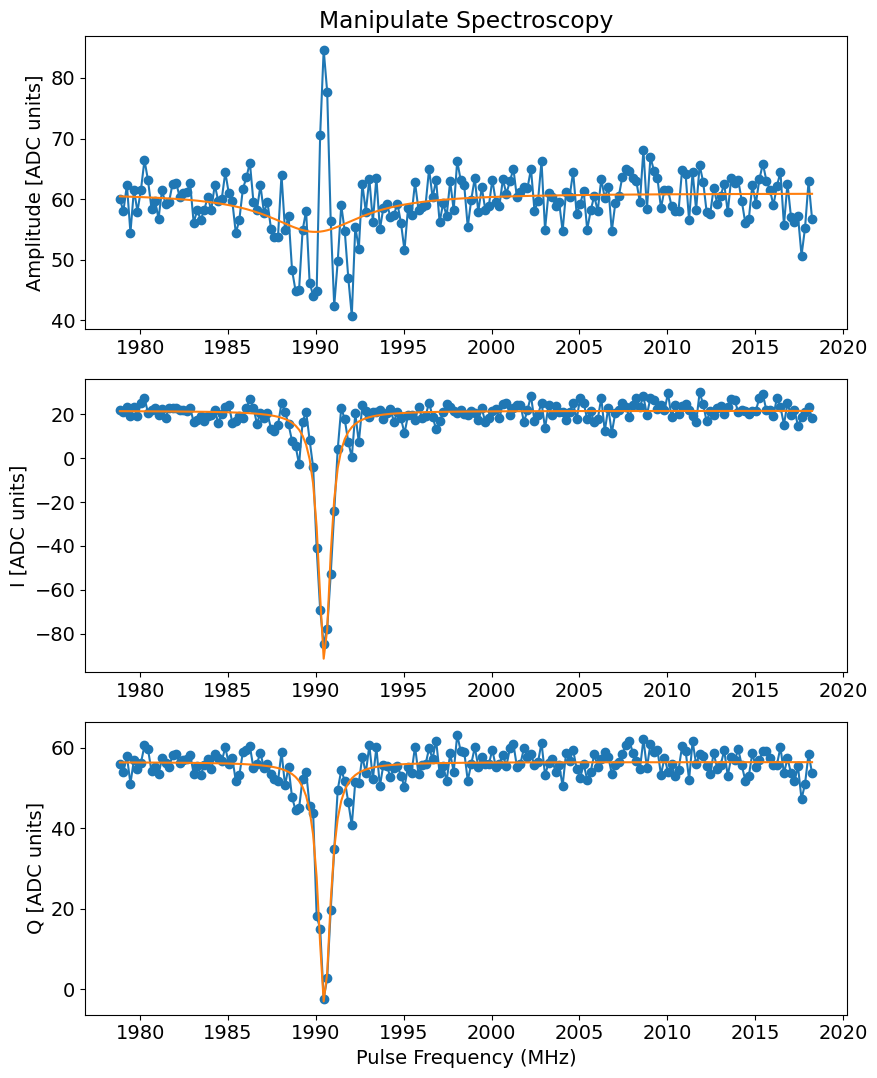

In [9]:
# Execute
# =================================
f0g1spec_runner = CharacterizationRunner(
    station=station,
    ExptClass=meas.PulseProbeF0g1SpectroscopyExperiment,
    default_expt_cfg=f0g1spec_defaults,
    preprocessor=f0g1spec_preproc,
    postprocessor=f0g1spec_postproc,
    job_client=client,
)

man_specs = [None] * len(expts_to_run['man_modes'])

for i in range(len(expts_to_run['man_modes'])):
    if expts_to_run['pulse_probe_f0g1']:
        print(f'Running pulse probe f0g1 for mode {i+1}')
        man_specs[i] = f0g1spec_runner.execute(
            man_mode_no=i+1,
            go_kwargs=dict(progress=True),
            relax_delay=2500,
            coupler_current=coupler_current,
        )
        man_specs[i].display()


In [ ]:
station.preview_config_update()
# station.snapshot_hardware_config(update_main=True)
# station.snapshot_multiphoton_config(update_main=True)

## Find Frequency (Chevron)


In [11]:
chevron_defaults = AttrDict(dict(
    start=0, # time start in us
    step=0.1, # time step in us
    expts=25, # number of time points
    reps=100,
    rounds=1,
    qubits=[0],
    gain=None, # Leave as None to use current value in dataset
    ramp_sigma=0.005,
    use_arb_waveform=False,
    pi_ge_before=True,
    pi_ef_before=True,
    pi_ge_after=False,
    normalize=False,
    active_reset=False,
    check_man_reset=[False, 0],
    check_man_reset_pi=[],
    prepulse=False,
    pre_sweep_pulse=[],
    err_amp_reps=0,
    swap_lossy=False,
))


def f0g1_chevron_postproc(station, mother_expt):
    expt_cfg = mother_expt.cfg.expt
    expt_cfg.man_mode_no = 1
    stor_name = f'M{expt_cfg.man_mode_no}'

    from fitting.fit_display_classes import ChevronFitting

    chevron_analysis = ChevronFitting(
        frequencies=mother_expt.data['freq_sweep'],
        time=mother_expt.data['xpts'][0],
        response_matrix=mother_expt.data['avgi'],
        config=station.hardware_cfg,
        station=station,
    )

    chevron_analysis.analyze()
    
    best_freq = chevron_analysis.results.get('best_frequency_contrast')
        
    if best_freq:
        print(f"Best frequency found: {best_freq:.4f} MHz")
        station.ds_storage.update_freq(stor_name, best_freq)
        station.hardware_cfg.device.multiphoton['pi']['fn-gn+1']['frequency'][0] = best_freq
        print(f"Updated {stor_name} frequency to {best_freq:.4f} MHz (ds_storage and hardware_cfg)")

        pi_len = abs(np.pi / chevron_analysis.results['best_fit_params_period']['omega'])
        station.ds_storage.update_pi(stor_name, pi_len)
        station.hardware_cfg.device.multiphoton['pi']['fn-gn+1']['length'][0] = pi_len
        print('Updated the pi length to:', pi_len, "(ds_storage and hardware_cfg)")

        station.ds_storage.update_h_pi(stor_name, pi_len / 2)
        print('Updated the h_pi length to:', pi_len / 2, "(ds_storage)")

        gain = expt_cfg.get('gain', station.ds_storage.get_gain(stor_name))
        station.ds_storage.update_gain(stor_name, gain)
        station.hardware_cfg.device.multiphoton['pi']['fn-gn+1']['gain'][0] = gain
        print('Updated gain to:', gain)
    mother_expt.analysis = chevron_analysis
    chevron_analysis.display_results()
    station.snapshot_man1_storage_swap(update_main=False)
    station.snapshot_hardware_config(update_main=False)


runner = SweepRunner(
    station=station,
    ExptClass=meas.LengthRabiGeneralF0g1Experiment,
    default_expt_cfg=chevron_defaults,
    sweep_param='freq',
    live_plot=False,
    # preprocessor=my_preproc,
    # postprocessor=f0g1_chevron_postproc,
    job_client=client,
)

Sweep: freq from 1992.7428443114848 to 1998.7428443114848 (11 pts)
  File: D:\experiments\260206_dump_mode\data\00014_LengthRabiGeneralF0g1Experiment_sweep.h5
  Submitting 11 jobs...
Job submitted: JOB-20260210-00298 (queue position: 1)
Job submitted: JOB-20260210-00299 (queue position: 2)
Job submitted: JOB-20260210-00300 (queue position: 3)
Job submitted: JOB-20260210-00301 (queue position: 4)
Job submitted: JOB-20260210-00302 (queue position: 5)
Job submitted: JOB-20260210-00303 (queue position: 6)
Job submitted: JOB-20260210-00304 (queue position: 7)
Job submitted: JOB-20260210-00305 (queue position: 7)
Job submitted: JOB-20260210-00306 (queue position: 8)
Job submitted: JOB-20260210-00307 (queue position: 9)
Job submitted: JOB-20260210-00308 (queue position: 10)
  All 11 jobs submitted. Waiting for results...
  [1/11] freq=1992.7428 [WORKER] Loading LengthRabiGeneralF0g1Experiment from experiments.single_qubit.length_rabi_f0g1_general
[WORKER] Creating experiment instance
[WORKER]

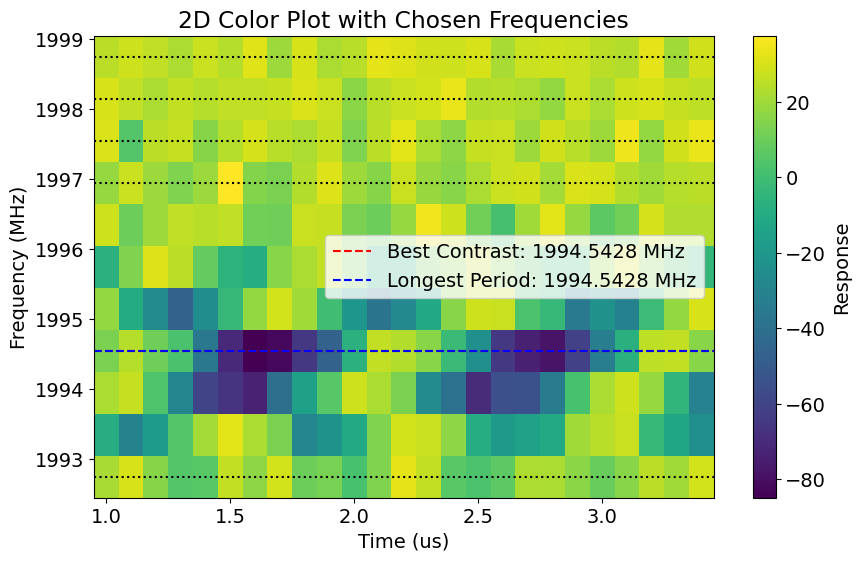

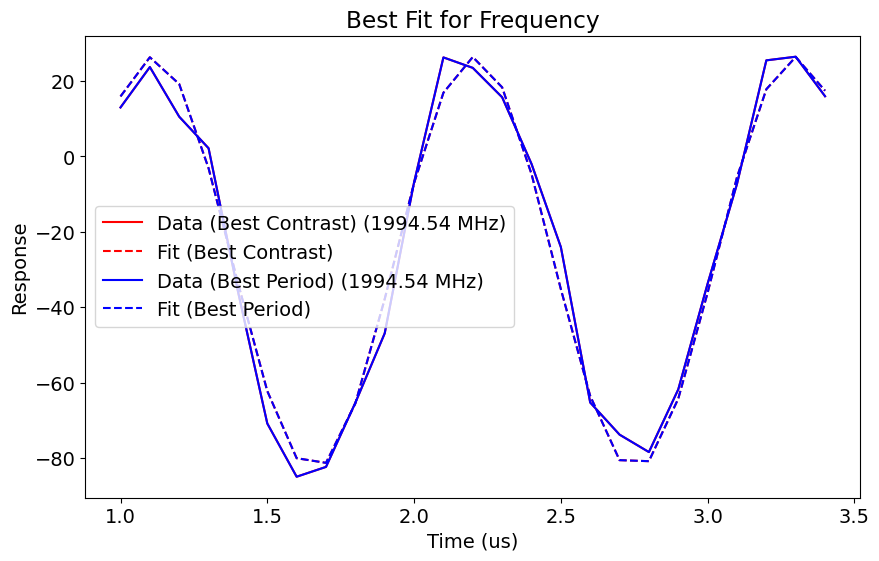

[CONFIG] Created new man1_storage_swap version CFG-M1-20260210-00013
[CONFIG] Created new hardware_config version CFG-HW-20260210-00021


In [83]:
# coarse sweep
f0g1_chevron = runner.execute(
    sweep_start=station.ds_storage.get_freq('M1') - 3,
    sweep_stop=station.ds_storage.get_freq('M1') + 3,
    sweep_npts=11,
    gain = station.ds_storage.get_gain('M1'),
    start = 1, # time start in us
    coupler_current=coupler_current,
    batch=True,
)

uncertainty smells off, marking this line as invalid
uncertainty smells off, marking this line as invalid
uncertainty smells off, marking this line as invalid
uncertainty smells off, marking this line as invalid
uncertainty smells off, marking this line as invalid
Best frequency found: 1994.5428 MHz
Updated M1 frequency to 1994.5428 MHz (ds_storage and hardware_cfg)
Updated the pi length to: 0.5473035993168043 (ds_storage and hardware_cfg)
Updated the h_pi length to: 0.27365179965840214 (ds_storage)
Updated gain to: 8000


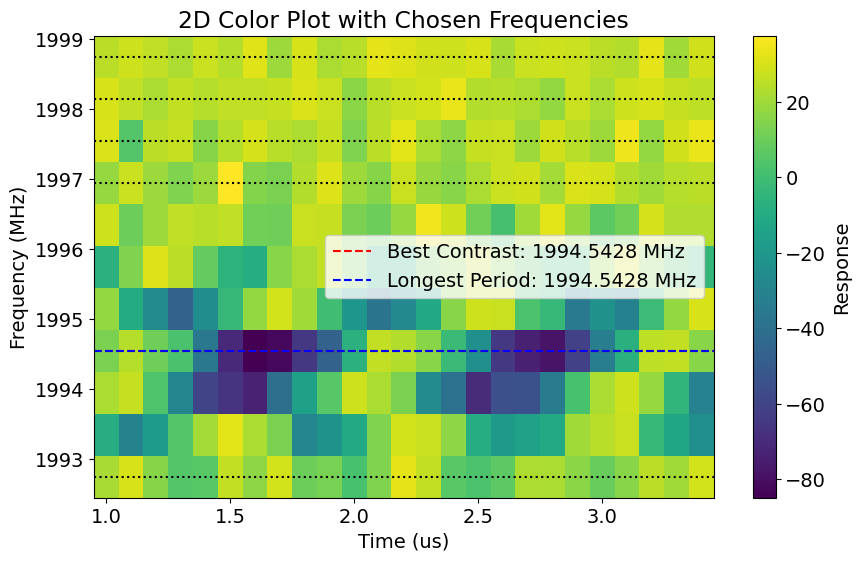

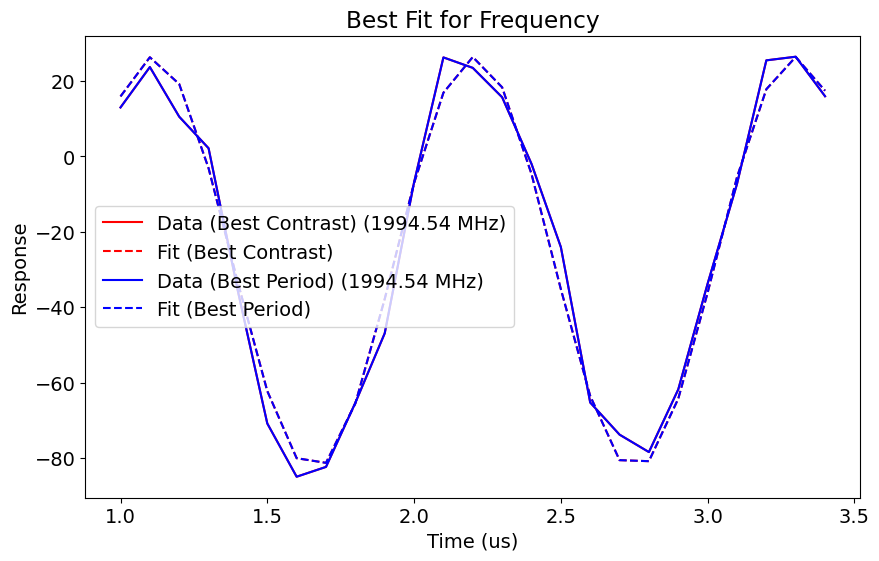

[CONFIG] Created new man1_storage_swap version CFG-M1-20260210-00014
[CONFIG] Reusing existing hardware_config version CFG-HW-20260210-00021


In [86]:
f0g1_chevron_postproc(station, f0g1_chevron)

In [87]:
station.ds_storage.df

stor_name   freq (MHz)  precision (MHz)   pi (mus)  h_pi (mus)  \
0      M1-S1   352.808553              NaN   2.352172    1.176086   
1      M1-S2   524.626255              NaN   2.307073    1.153536   
2      M1-S3   700.807420              NaN   1.696505    0.848253   
3      M1-S4   880.757057              NaN   1.865498    0.932749   
4      M1-S5  1056.917751              NaN        NaN         NaN   
5      M1-S6  1248.717666              NaN   1.804485    0.902242   
6      M1-S7  1426.889688              NaN   3.008964    1.504482   
7      M1-S8    -1.000000            -1.00  -1.000000   -1.000000   
8      M1-S9    -1.000000            -1.00  -1.000000   -1.000000   
9     M1-S10    -1.000000            -1.00  -1.000000   -1.000000   
10    M1-S11    -1.000000            -1.00  -1.000000   -1.000000   
11    M1-S12    -1.000000            -1.00  -1.000000   -1.000000   
12        M1  1994.542844              NaN   0.547304    0.273652   
13        M2  1834.950000             0.01   1.054456    0.520515   
14     M2-S1   175.630000             0.01   2.173484    1.086742   
15     M2-S2   346.840000             0.01   0.908835    0.454417   
16     M2-S3   523.220000             0.01   1.561615    0.780808   
17     M2-S4   702.650000             0.01   1.386764    0.693382   
18     M2-S5   878.780000             0.01   1.303372    0.651686   
19     M2-S6  1070.100000             0.01   2.379622    1.189811   
20     M2-S7  1249.700000             0.01   1.796981    0.898491   
21     M2-M1   173.790000             0.01   0.463481    0.231741   
22     M1-D1  2262.697217             0.01  10.402550    5.201275   
23     M2-D2  2094.050000             0.01  15.000000    0.000000   
24      M1-C   919.000000             0.02   0.251127    0.122354   
25     M1_ce  2008.780000             0.02   0.617915    0.304523   

    gain (DAC units)                 last_update  \
0               3175  2026-02-05 12:03:18.308045   
1               3747  2026-02-05 12:05:05.006501   
2               4717  2026-02-05 12:06:37.153292   
3               7158  2026-02-05 14:12:50.143204   
4               2493  2026-02-05 11:53:30.560024   
5              12761  2026-02-05 12:09:41.772552   
6               9774  2026-02-05 13:58:34.538345   
7                 -1                     51:31.3   
8                 -1                     51:31.3   
9                 -1                     51:31.3   
10                -1                     51:31.3   
11                -1                     51:31.3   
12              8000  2026-02-10 16:26:48.358306   
13             15000  2025-04-30 11:22:11.432806   
14              1000                     28:20.8   
15              5000                     33:56.1   
16              5000                     22:30.3   
17              9000                     25:33.1   
18             13500                     00:05.4   
19              9000                     30:59.0   
20             12000                     56:07.5   
21              2000  2024-10-06 01:47:25.946153   
22             20000  2026-02-10 13:52:17.569020   
23              8000  2025-01-23 17:22:53.776061   
24              1000  2025-12-08 16:40:53.078714   
25             15000  2025-01-20 09:52:35.311227   

                                     bs_rate_coeffs_g  \
0   [2.71800440497595e-10, 3.5345716702085755e-05,...   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
5                                                 NaN   
6                                                 NaN   
7                                                 NaN   
8                                                 NaN   
9                                                 NaN   
10                                                NaN   
11                                                

In [13]:
# fine sweep
f0g1_chevron = runner.execute(
    sweep_start=station.ds_storage.get_freq('M1') - 0.5,
    sweep_stop=station.ds_storage.get_freq('M1') + 0.5,
    sweep_npts=11,
    gain = station.ds_storage.get_gain('M1'),
    # start = 1, # time start in us
    # coupler_current=coupler_current,
    reps=75,
    batch=True,
)

Sweep: freq from 1998.1428443114849 to 1999.1428443114849 (11 pts)
  File: D:\experiments\260206_dump_mode\data\00016_LengthRabiGeneralF0g1Experiment_sweep.h5
  Submitting 11 jobs...
Job submitted: JOB-20260211-00189 (queue position: 1)
Job submitted: JOB-20260211-00190 (queue position: 2)
Job submitted: JOB-20260211-00191 (queue position: 3)
Job submitted: JOB-20260211-00192 (queue position: 4)
Job submitted: JOB-20260211-00193 (queue position: 5)
Job submitted: JOB-20260211-00194 (queue position: 6)
Job submitted: JOB-20260211-00195 (queue position: 7)
Job submitted: JOB-20260211-00196 (queue position: 8)
Job submitted: JOB-20260211-00197 (queue position: 8)
Job submitted: JOB-20260211-00198 (queue position: 9)
Job submitted: JOB-20260211-00199 (queue position: 10)
  All 11 jobs submitted. Waiting for results...
  [1/11] freq=1998.1428 [WORKER] Loading LengthRabiGeneralF0g1Experiment from experiments.single_qubit.length_rabi_f0g1_general
[WORKER] Creating experiment instance
[WORKER]

RuntimeError: Job JOB-20260211-00189 failed: ConnectionAbortedError: [WinError 10053] An established connection was aborted by the software in your host machine
Traceback (most recent call last):
  File "D:\python\multimode_expts\job_server\worker.py", line 366, in _execute_job
    data_file_path, expt_pickle_path = self._run_experiment(ExptClass, expt_config, job)
                                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\python\multimode_expts\job_server\worker.py", line 547, in _run_experiment
    self.station.yoko_coupler.ramp_current(coupler_current, sweeprate=2e-4)
  File "D:\python\multimode_expts\slab\instruments\voltsource.py", line 35, in ramp_current
    start = self.get_current()
            ^^^^^^^^^^^^^^^^^^
  File "D:\python\multimode_expts\slab\instruments\voltsource.py", line 203, in get_current
    if self.get_mode() == "CURR":
       ^^^^^^^^^^^^^^^
  File "D:\python\multimode_expts\slab\instruments\voltsource.py", line 153, in get_mode
    return self.query(':SOURCE:FUNCTION?').strip()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\python\multimode_expts\slab\instruments\instrumenttypes.py", line 59, in query
    self.write(cmd)
  File "D:\python\multimode_expts\slab\instruments\instrumenttypes.py", line 179, in write
    if self.enabled: self.socket.send(self.encode_s(s))
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ConnectionAbortedError: [WinError 10053] An established connection was aborted by the software in your host machine


Best frequency found: 1998.7428 MHz
Updated M1 frequency to 1998.7428 MHz (ds_storage and hardware_cfg)
Updated the pi length to: 0.5899174771806575 (ds_storage and hardware_cfg)
Updated the h_pi length to: 0.29495873859032873 (ds_storage)
Updated gain to: 8000


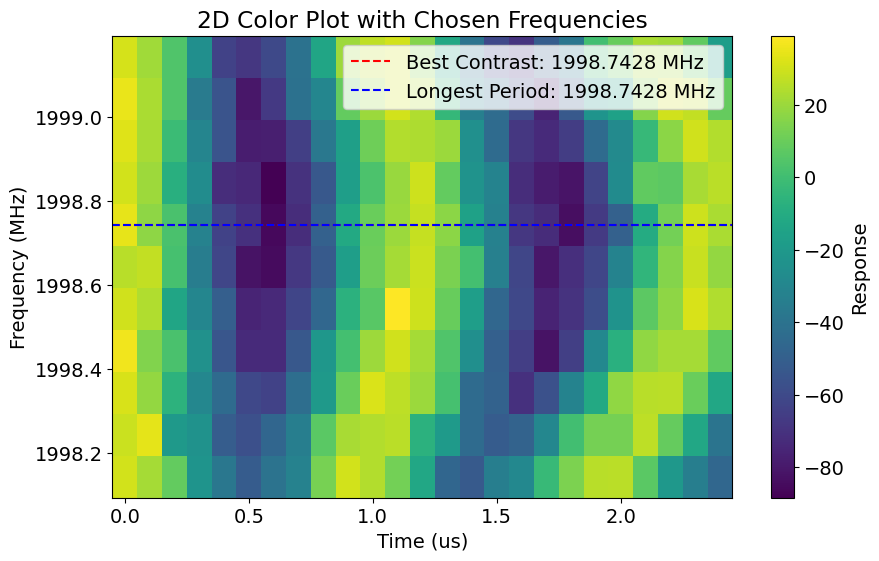

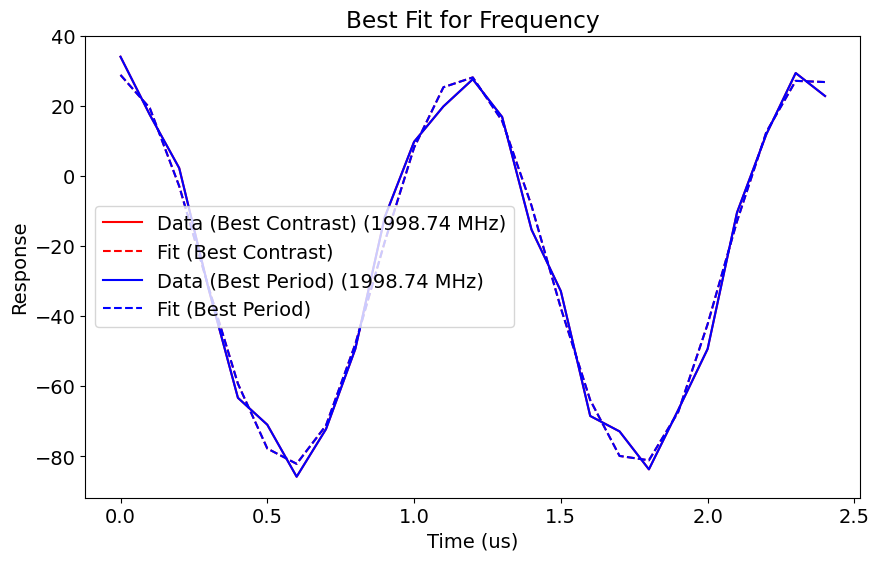

[CONFIG] Created new man1_storage_swap version CFG-M1-20260210-00009
[CONFIG] Created new hardware_config version CFG-HW-20260210-00018


In [ ]:
# f0g1_chevron_postproc(station, f0g1_chevron)

In [93]:
# station.ds_storage.df

## Error amplification

cfg at start of acquire {'start': 1998, 'expts': 40, 'step': 0.025, 'reps': 1, 'rounds': 1, 'qubit': 0, 'qubits': [0], 'n_pulses': 7, 'sideband': 'f0-g1', 'parameter_to_test': 'frequency', 'pulse_type': ['multiphoton', 'f0-g1', 'pi', 0], 'active_reset': False, 'man_reset': True, 'storage_reset': True, 'relax_delay': 2500}
n_pts [1 2 3 4 5 6 7]


  0%|          | 0/7 [00:00<?, ?it/s]

post_pulse: [[3562.5885072817487, 3419.01692885307], [3319, 3074], [0, 0], [0, 0], [2, 2], ['gauss', 'gauss'], [0.035, 0.035]]
post_pulse: [[3562.5885072817487, 3419.01692885307], [3319, 3074], [0, 0], [0, 0], [2, 2], ['gauss', 'gauss'], [0.035, 0.035]]
post_pulse: [[3562.5885072817487, 3419.01692885307], [3319, 3074], [0, 0], [0, 0], [2, 2], ['gauss', 'gauss'], [0.035, 0.035]]
post_pulse: [[3562.5885072817487, 3419.01692885307], [3319, 3074], [0, 0], [0, 0], [2, 2], ['gauss', 'gauss'], [0.035, 0.035]]
post_pulse: [[3562.5885072817487, 3419.01692885307], [3319, 3074], [0, 0], [0, 0], [2, 2], ['gauss', 'gauss'], [0.035, 0.035]]
post_pulse: [[3562.5885072817487, 3419.01692885307], [3319, 3074], [0, 0], [0, 0], [2, 2], ['gauss', 'gauss'], [0.035, 0.035]]
post_pulse: [[3562.5885072817487, 3419.01692885307], [3319, 3074], [0, 0], [0, 0], [2, 2], ['gauss', 'gauss'], [0.035, 0.035]]
Saving D:\experiments\260112_qsim_calibration_practice\data\00009_ErrorAmplificationExperiment.h5
fitparams [-0

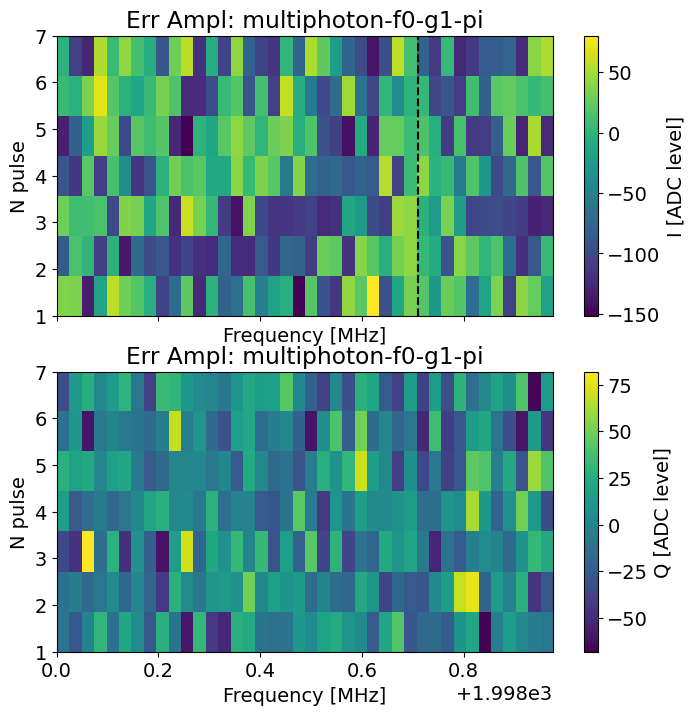

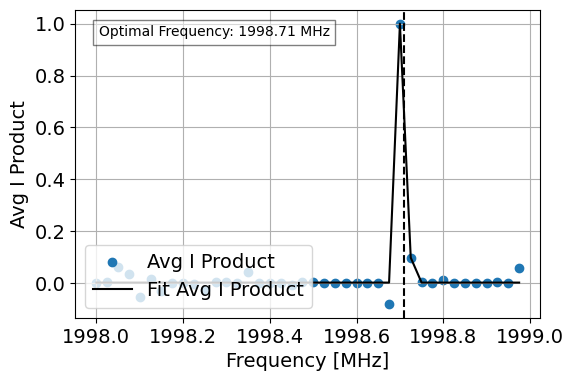

Error amplification analysis complete
Man f0-g1 pi frequency before update: 1998.6868657264545
Man f0-g1 pi frequency after update: 1998.709452801087
Creating or updating new csv at path: D:\python\multimode_expts\configs\man1_storage_swap_dataset_new.csv
Updated the ds_storage frequency to: 1998.709452801087


In [ ]:
# Manipulate/Error Amplification - New Pattern with CharacterizationRunner

# Configuration defaults
error_amp_defaults = AttrDict(dict(
    start=1998,
    expts=40,
    step=0.025,
    reps=100,
    rounds=1,
    qubit=0,
    qubits=[0],
    n_pulses=7,
    sideband = 'f0-g1', #should be in the format of 'fn-gn+1' 
    parameter_to_test='frequency',
    pulse_type= None, # if this is None, will be set to ['multiphoton', sideband, 'pi', 0] in preproc
    active_reset=False,
    man_reset=True,
    storage_reset=True,
    relax_delay=2500,
))

def error_amp_preproc(station, 
                      default_expt_cfg, 
                      **kwargs):
    expt_cfg = deepcopy(default_expt_cfg)
    expt_cfg.update(kwargs)
    if expt_cfg.pulse_type is None:
        expt_cfg.pulse_type = ['multiphoton', expt_cfg.sideband, 'pi', 0]
    return expt_cfg

def error_amp_postproc(station, expt):
    """
    Postprocessor for error amplification.
    Analyze with custom parameters.
    """
    sideband = expt.cfg.expt.sideband
    _sideband = sideband[0] + 'n' + '-' + sideband[3] + 'n+1'
    i = int(sideband[1])
    # Perform analysis with state_fin='e' as in original code
    expt.analyze(data=expt.data, state_fin='e')
    # expt.display(data=expt.data, state_fin='e')
    print('Error amplification analysis complete')

    print(f"Man {sideband} pi frequency before update:", 
          station.hardware_cfg.device.multiphoton['pi'][_sideband]['frequency'][i])
    station.hardware_cfg.device.multiphoton['pi'][_sideband]['frequency'][i] = expt.data['fit_avgi'][2]
    print(f"Man {sideband} pi frequency after update:", 
          station.hardware_cfg.device.multiphoton['pi'][_sideband]['frequency'][i])
    if i > 0:
        print("WARNING! No update will occur! The update in this cell was meant for the csv which does not have multiphoton params. To update the multiphoton params, please run the multiphoton calibration notebook instead.")
    else:
        station.ds_storage.update_freq('M1', expt.data['fit_avgi'][2])
        print("Updated the ds_storage frequency to:", station.ds_storage.get_freq('M1'))
    station.snapshot_hardware_config(update_main=False)
    station.snapshot_multiphoton_config(update_main=False)

# Create runner
error_amp_runner = CharacterizationRunner(
    station=station,
    ExptClass=meas.ErrorAmplificationExperiment,
    default_expt_cfg=error_amp_defaults,
    preprocessor=error_amp_preproc,
    postprocessor=error_amp_postproc,
    job_client=client,
)

# Example execution

# Run with analyze=False, display=False initially
# Postprocessor will handle custom analysis
error_amp_exp = error_amp_runner.execute(
    reps = 1,
    go_kwargs = dict(analyze=False, display=False),
    postprocess=True  # This will call postprocessor which does the custom analysis
)

error_amp_exp.display()

## Length Rabi f0g1 (Update time)

In [ ]:
# Define defaults, smart config preprocessing and post-measurement updates
# =====================================
lenrabi_f0g1_defaults = AttrDict(dict(
    start=None,  # Will be computed in preprocessor (soc.cycles2us(3))
    step=0.01,
    qubits=[0],
    expts=150,
    reps=100,
    rounds=1,
    gain=8000,
    freq=None,  # Will be set from ds_storage in preprocessor
    use_arb_waveform=False,
    pi_ge_before=True,
    pi_ef_before=True,
    pi_ge_after=True,
    normalize=False,
    active_reset=False,
    man_reset=True,
    stor_reset=True,
    check_man_reset=[False, 0],
    swap_lossy=False,
    check_man_reset_pi=[],
    prepulse=False,
    pre_sweep_pulse=[],
    err_amp_reps=0,
    relax_delay=5000,
))

def lenrabi_f0g1_preproc(station, default_expt_cfg, man_mode_no=1, **kwargs):
    expt_cfg = deepcopy(default_expt_cfg)
    expt_cfg.man_mode_no = man_mode_no  # Store for postprocessor
    expt_cfg.update(kwargs)
    
    # Compute start and freq from soc and ds_storage if not provided
    if expt_cfg.start is None:
        expt_cfg.start = station.soc.cycles2us(3)
    if expt_cfg.freq is None:
        expt_cfg.freq = station.ds_storage.get_freq('M' + str(man_mode_no))
    
    return expt_cfg

def lenrabi_f0g1_postproc(station, expt):
    man_mode_no = expt.cfg.expt.man_mode_no
    
    # Get analysis results from the LengthRabiFitting object stored in expt
    if hasattr(expt, '_length_rabi_analysis'):
        analysis = expt._length_rabi_analysis
        pi_length = analysis.results['pi_length']
        pi2_length = analysis.results['pi2_length']
        gain = expt.cfg.expt.gain
        freq = expt.cfg.expt.freq

       
        station.ds_storage.update_all('M' + str(man_mode_no), freq, None, pi_length, pi2_length, gain)
        print(f'Updated dataset M{man_mode_no}: pi_length={pi_length:.4f}, pi2_length={pi2_length:.4f}, gain={gain}')

        station.snapshot_hardware_config(update_main=False)
        station.snapshot_multiphoton_config(update_main=False)


Running length rabi for mode 1


  0%|          | 0/150 [00:00<?, ?it/s]

Attempted to init fitparam 1 to 42.28187919463087, which is out of bounds 0.06756756756756757 to 33.78378378378378. Instead init to 16.925675675675674
Saving D:\experiments\260101_qsim\data\00006_LengthRabiGeneralF0g1Experiment.h5
p1: 0.8332776386989512
p2: 95.54100046380569
Pi length: 0.5815688667724646
Pi/2 length: 0.28154881536397997
p1: 14.485549800712121
p2: 50.76264056157366
Pi length: 0.04204139114393858
Pi/2 length: 0.02478281253011822


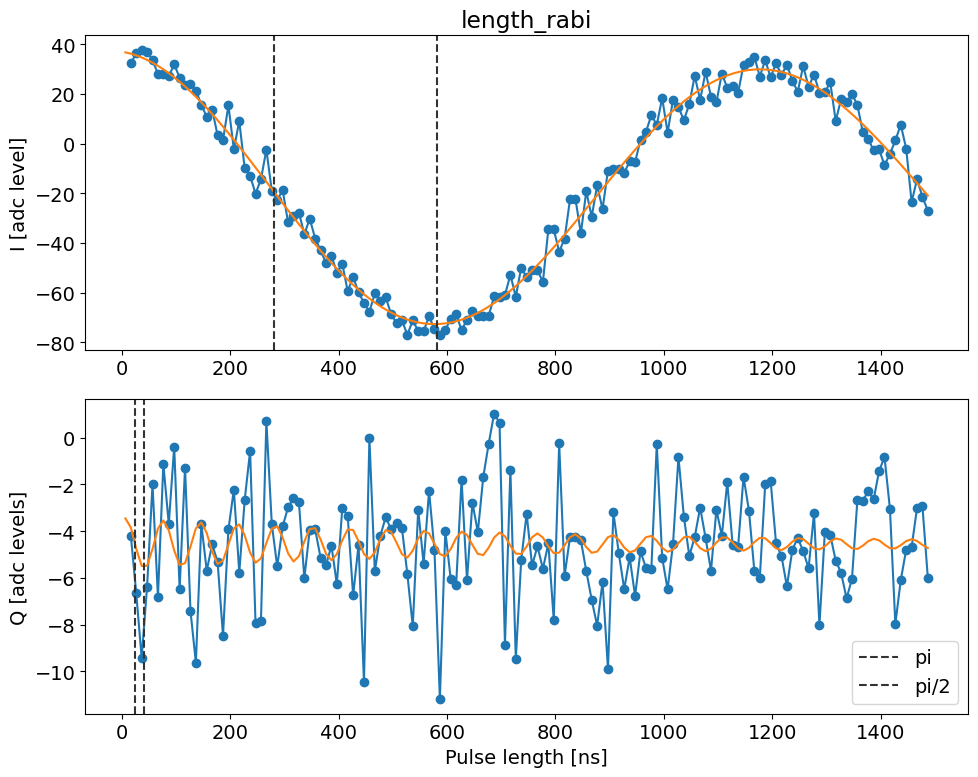

Creating or updating new csv at path: D:\python\multimode_expts\configs\man1_storage_swap_dataset_new.csv
Updated dataset M1: pi_length=0.5816, pi2_length=0.2815, gain=8000


In [ ]:
# Execute
# =================================
lenrabi_f0g1_runner = CharacterizationRunner(
    station=station,
    ExptClass=meas.LengthRabiGeneralF0g1Experiment,
    default_expt_cfg=lenrabi_f0g1_defaults,
    preprocessor=lenrabi_f0g1_preproc,
    postprocessor=lenrabi_f0g1_postproc,
    job_client=client,
)

len_rabis_mans = [None] * len(expts_to_run['man_modes'])

for i in range(len(expts_to_run['man_modes'])):
    if expts_to_run['length_rabi'] or expts_to_run['length_rabi_sweep']:
        print(f'Running length rabi for mode {i+1}')
        len_rabis_mans[i] = lenrabi_f0g1_runner.execute(
            man_mode_no=i+1,
            go_kwargs=dict(progress=True)
        )
        len_rabis_mans[i].display()


In [61]:
# len_rabis_mans[0].active_reset = True
# len_rabis_mans[0].analyze()
# len_rabis_mans[0].display(title_str='Length Rabi General F0g1')

## --- Manipulate sections below not refactored ---

## Chi between qubit and Manipulate 

### ge

In [85]:
mm_base_dummy = MM_dual_rail_base(config_thisrun, soc)
prep_man_pi = mm_base_dummy.prep_man_photon(1)
mm_base_dummy.get_prepulse_creator(prep_man_pi).pulse

array([[3570.1569917242878, 3426.533540542471, 2006.6594442381024],
       [3523, 2909, 8000],
       [0, 0, 0.5884878240625507],
       [0, 0, 0],
       [2, 2, 0],
       ['gauss', 'gauss', 'flat_top'],
       [0.035, 0.035, 0.005]], dtype=object)

In [ ]:
from experiments.MM_dual_rail_base import MM_dual_rail_base
import numpy as np

# the do function contains 2 calls to ramsey, one with no prepulse and one with prepulse 
# that initializes manipulation mode to 1 state
# do_t2_ramsey_ge is already defined in previous cells and can be used directly

# Add active_reset, relax_delay, expts as arguments and pass them to do_t2_ramsey_ge
def do_chi(config_thisrun, expt_path, config_path, prepulse=None, standard_ramsey=True,
           man_mode_no=1, active_reset=False, relax_delay=2500, expts=100):
    """
    Run two Ramsey experiments: one standard, one with a prepulse that initializes manipulation mode 1.
    Returns both experiment objects.
    """
    # Standard Ramsey (no prepulse)
    if standard_ramsey:
        t2ramsey_no_prepulse = do_t2_ramsey_ge(
            config_thisrun, expt_path, config_path,
            pre_sweep_pulse=None, post_sweep_pulse=None,
            step_size=0.1,
            active_reset=active_reset,
            relax_delay=relax_delay,
            expts=expts
        )
    else: 
        t2ramsey_no_prepulse = None

    # Ramsey with prepulse (initialize manipulation mode 1)
    if prepulse is None:
        mm_base_dummy = MM_dual_rail_base(config_thisrun, soc)
        prep_man_pi = mm_base_dummy.prep_man_photon(man_mode_no)
        prepulse = mm_base_dummy.get_prepulse_creator(prep_man_pi).pulse.tolist()

    t2ramsey_with_prepulse = do_t2_ramsey_ge(
        config_thisrun, expt_path, config_path,
        pre_sweep_pulse=prepulse, post_sweep_pulse=None,
        step_size=0.1,
        active_reset=active_reset,
        relax_delay=relax_delay,
        expts=expts
    )

    return t2ramsey_no_prepulse, t2ramsey_with_prepulse


def update_chi(t2_ramsey_original, t2_ramsey_prepulse, config_thisrun, man_mode_no=1):
    """
    Update config_thisrun.device.qubit.chi for the given manipulation mode.
    """
    f_without_prepulse = t2_ramsey_original.data['f_adjust_ramsey_avgi'][0]
    f_with_prepulse = t2_ramsey_prepulse.data['f_adjust_ramsey_avgi'][0]
    chi = f_with_prepulse - f_without_prepulse
    print('Chi:', chi)
    config_thisrun.device.manipulate.chi_ge[man_mode_no - 1] = chi
    config_thisrun.device.manipulate.revival_time[man_mode_no-1] = np.abs(np.pi/(2 * np.pi * chi))
    print('Delay time (mus):', config_thisrun.device.manipulate.revival_time[man_mode_no-1] )


fge is  3569.7141623787825
fef is  3426.6982208338936


  0%|          | 0/20000 [00:00<?, ?it/s]

Saving D:\experiments\251111_qec\data\00004_RamseyExperiment.h5
fge is  3569.7141623787825
fef is  3426.6982208338936


  0%|          | 0/20000 [00:00<?, ?it/s]

Saving D:\experiments\251111_qec\data\00005_RamseyExperiment.h5
No echoes in the data
Attempted to init fitparam 4 to -52.724925000000006, which is out of bounds -27.571309523809525 to 4.514718614718615. Instead init to -11.528295454545455
Current pi pulse frequency: 3569.7141623787825
Fit frequency from I [MHz]: 2.0 +/- inf
Suggested new pi pulse frequency from fit I [MHz]:
 	3570.7141623787825
 	3574.7141623787825
T2 Ramsey from fit I [us]: 9.9
Fit frequency from Q [MHz]: 2.076533826954893 +/- 0.024749944810192936
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3570.6376285518277
 	3574.7906962057373
T2 Ramsey from fit Q [us]: 2.9700000000000006


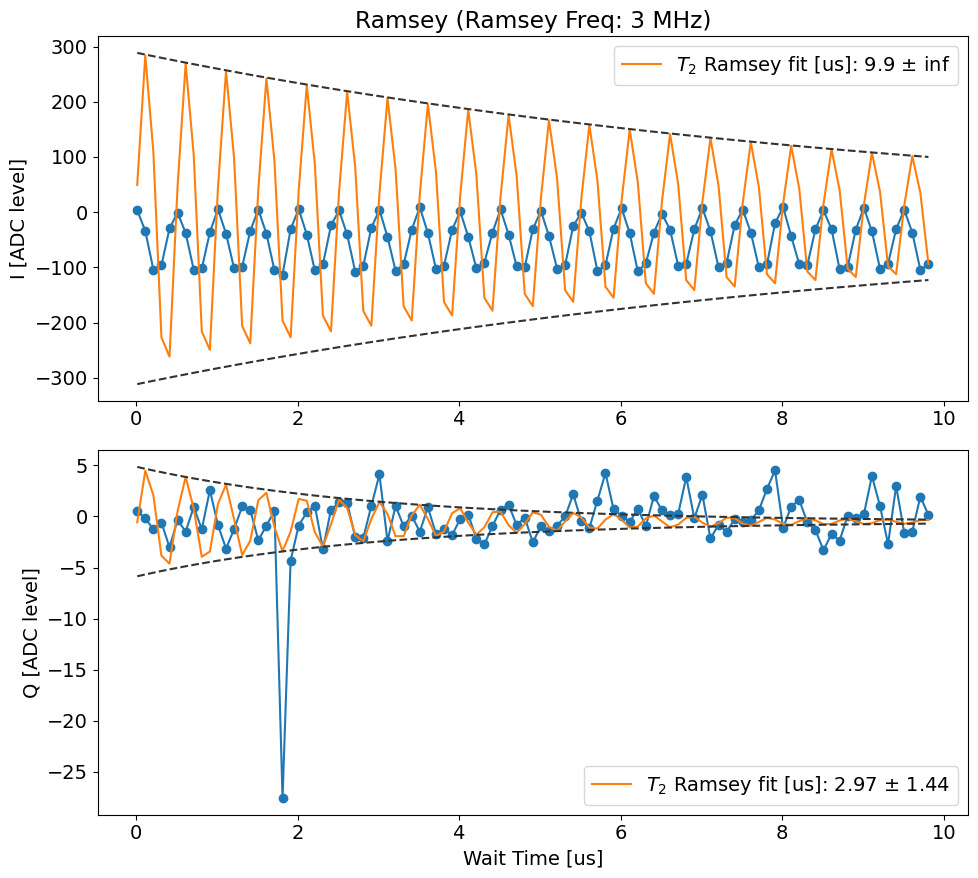

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-11-11_10-59-59_Ramsey.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-11-11.md
No echoes in the data
Attempted to init fitparam 4 to -51.17035303030303, which is out of bounds -3.31245670995671 to 8.356028138528139. Instead init to 2.5217857142857145
Current pi pulse frequency: 3569.7141623787825
Fit frequency from I [MHz]: 1.71978267183764 +/- 0.0012380111575450356
Suggested new pi pulse frequency from fit I [MHz]:
 	3570.994379706945
 	3574.43394505062
T2 Ramsey from fit I [us]: 14.777506484792996
Fit frequency from Q [MHz]: 1.7361956078739427 +/- 0.01620406466299428
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3570.9779667709086
 	3574.4503579866564
T2 Ramsey from fit Q [us]: 2.9700000000000006


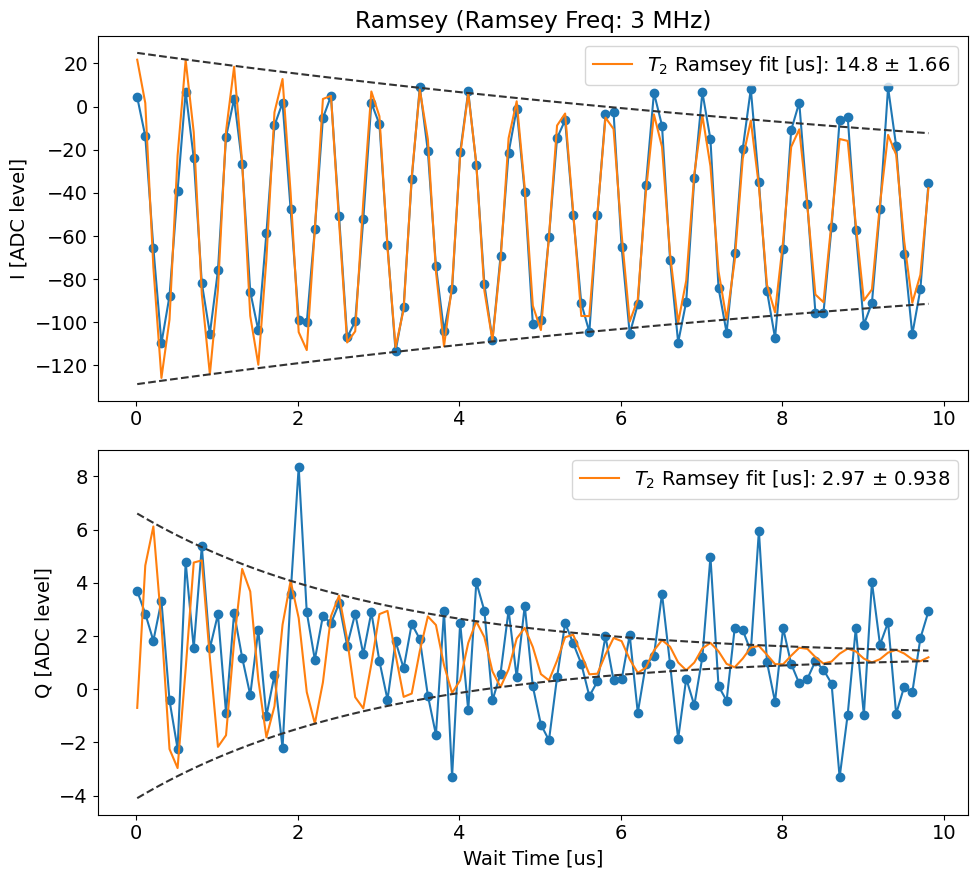

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-11-11_11-00-00_Ramsey.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-11-11.md
Chi: 0.2802173281623599
Delay time (mus): 1.7843293392273603
Only doing it for mode 1


In [87]:
t2_ramsey_original, t2_ramsey_prepulse = None, None
# Run the chi experiments/__pycache__/
if expts_to_run['chi_ge']:
    t2_ramsey_original, t2_ramsey_prepulse = do_chi(config_thisrun, expt_path, config_path, standard_ramsey=True)
    # analyze and display the results
    t2_ramsey_original.analyze(fitparams=[300, None, None, None, None, None])
    t2_ramsey_original.display()
    t2_ramsey_prepulse.analyze(fitparams=[300, None, None, None, None, None])
    t2_ramsey_prepulse.display() 
    # update the config_thisrun with the chi value
    update_chi(t2_ramsey_original, t2_ramsey_prepulse, config_thisrun, man_mode_no=1)
    print('Only doing it for mode 1')

In [ ]:
# config_thisrun.device.manipulate.revival_time[0] = np.pi/(2 * np.pi * config_thisrun.device.manipulate.chi[0])

### ef

In [ ]:
from experiments.MM_dual_rail_base import MM_dual_rail_base

# the do function contains 2 calls to ramsey, one with no prepulse and one with prepulse 
# that initializes manipulation mode to 1 state
def do_chi_f(config_thisrun, expt_path, config_path, 
           man_mode_no=1):
    """
    Run two Ramsey experiments: one standard, one with a prepulse that initializes manipulation mode 1.
    Returns both experiment objects.
    """

    
    mm_base_dummy = MM_dual_rail_base(config_thisrun, soc)
    prep_man_pi = mm_base_dummy.prep_man_photon(man_mode_no)
    # Add qubit ge prepulse and postpulse for ef (ge init)
    qubit_ge_prepulse = [['qubit', 'ge', 'pi', 0]]
    prep_man_pi_prepulse = mm_base_dummy.get_prepulse_creator(prep_man_pi).pulse.tolist()
    prepulse =  mm_base_dummy.get_prepulse_creator(prep_man_pi + qubit_ge_prepulse ).pulse.tolist() 
    postpulse  = mm_base_dummy.get_prepulse_creator(qubit_ge_prepulse).pulse.tolist()

    # Add chi to frequency of qubit ge 
    # prepulse[0][-1] += config_thisrun.device.manipulate.chi[man_mode_no - 1]
    # postpulse[0][-1] += config_thisrun.device.manipulate.chi[man_mode_no - 1]

    # Do an ef and ge ramsey with this prepulse 
    # Run ge Ramsey 
    
    
    t2ramsey_no_prepulse_ge = do_t2_ramsey_ge(config_thisrun,
        expt_path,
        config_path,
        step_size=0.1,
        pre_sweep_pulse=prep_man_pi_prepulse,
        post_sweep_pulse=None)
    # Run ef Ramsey with prepulse and postpulse
    t2ramsey_with_prepulse_ef = do_t2_ramsey_ef(
        config_thisrun,
        expt_path,
        config_path,
        pre_sweep_pulse=prepulse,
        post_sweep_pulse=postpulse,
        step_size=0.1,
        ef_init=False  # Do not initialize ef, we are already in ef state
    )
    

    return t2ramsey_no_prepulse_ge, t2ramsey_with_prepulse_ef

def update_chi_ef(t2_standard_ramsey, t2_prepulsed_ramsey, config_thisrun, man_mode_no=1):
    """
    Update config_thisrun.device.qubit.chi for the given manipulation mode.
    """
    f_with_prepulse = t2_prepulsed_ramsey.data['f_adjust_ramsey_avgi'][0]
    f_without_prepulse = t2_standard_ramsey.data['f_adjust_ramsey_avgi'][0]
    chi_ef = f_with_prepulse - f_without_prepulse
    print('Chi:', chi_ef)
    config_thisrun.device.manipulate.chi_ef[man_mode_no - 1] = chi_ef


In [ ]:
man_mode_no = 1
t2ge_ramsey_forchief, t2ef_ramsey_forchief = None, None
t2ef_standard_ramsey_forchief = None
if expts_to_run['chi_ef']:
    
    #get standard ef ramsey 
    t2ef_standard_ramsey_forchief = do_t2_ramsey_ef(config_thisrun, expt_path, config_path)
    # analyze and display the results
    t2ef_standard_ramsey_forchief.analyze(fitparams=[300, None, None, None, None, None])
    t2ef_standard_ramsey_forchief.display(title_str='T2_ef_standard_for_chief')

    # Now ramseys with man photon prepulse
    config_thisrun_chief = deepcopy(config_thisrun)
    config_thisrun_chief.device.qubit.f_ge[0] += config_thisrun.device.manipulate.chi_ge[man_mode_no - 1]
    t2ge_ramsey_forchief, t2ef_ramsey_forchief = do_chi_f(config_thisrun_chief, expt_path, config_path)
    # analyze and display the results
    t2ge_ramsey_forchief.analyze(fitparams=[300, None, None, None, None, None])
    t2ge_ramsey_forchief.display(title_str='T2_ge_for_chief_tocheck_this_is_correctly_at_ramsey_freq')
    t2ef_ramsey_forchief.analyze(fitparams=[300, None, None, None, None, None])
    t2ef_ramsey_forchief.display(title_str='T2_ef_for_chief')
    # update the config_thisrun with the chi value
    update_chi_ef(t2ef_standard_ramsey_forchief, t2ef_ramsey_forchief, config_thisrun)


## Parity Delay
NOT Implemented yet: We can use chi to estimate parity waiting time pi/chi but can also fine tune it using this experiment

Basically Length rabi analysis 

## T1

In [ ]:
def do_t1_manipulate(config_thisrun, expt_path, config_path, man_mode_no=1):
    """
    Run T1 experiment for the specified manipulate mode (man_mode_no).
    """
    t1_man = meas.single_qubit.t1_cavity.T1CavityExperiment(
        soccfg=soc, path=expt_path, prefix='T1CavityExperiment', config_file=config_path
    )

    t1_man.cfg = AttrDict(deepcopy(config_thisrun))

    # Set experiment parameters for the specified manipulate mode
    t1_man.cfg.expt = dict(
        start=0,
        step=15,
        expts=60,
        reps=300,
        rounds=1,
        cavity_prepulse=[False, 300, 1.5],
        f0g1_prep=True,
        f0g1_param=[ds_storage.get_freq(f'M{man_mode_no}'), ds_storage.get_gain(f'M{man_mode_no}'), ds_storage.get_pi(f'M{man_mode_no}')],
        resolved_pi=False,
        cavity=man_mode_no,
        qubit=0,
        normalize=False
    )

    t1_man.cfg.device.readout.relax_delay = [2500]
    t1_man.go(analyze=True, display=True, progress=True, save=True)
    return t1_man



In [ ]:
t1_man = do_t1_manipulate(config_thisrun, expt_path, config_path, 1)

## T2
06/19/2025: The code below should use man ramsey directly instead of user defined; user defined is for ramsey where you directly displace manipulate mode  - Eesh

In [ ]:
def do_cavity_ramsey(config_thisrun, expt_path, config_path, man_mode_no=1):
    """
    Run the Cavity Ramsey experiment using the specified configuration.
    """
    cavity_ramsey = meas.single_qubit.t2_cavity.CavityRamseyExperiment(
        soccfg=soc, path=expt_path, prefix='CavityRamseyExperiment', config_file=config_path
    )

    cavity_ramsey.cfg = AttrDict(deepcopy(config_thisrun))

    # Prepulse and postpulse

    # Set experiment parameters as in the YAML block above
    cavity_ramsey.cfg.expt = dict(
        start=0.01,
        step=0.02*7.5,
        expts=600,
        # ramsey_freq=-3.5,
        ramsey_freq=1.5,
        reps=100,
        rounds=1,
        qubits=[0],
        checkEF=False,
        f0g1_cavity=0,
        init_gf=False,
        active_reset=False,
        man_reset=True,
        storage_reset=True,
        user_defined_pulse=[False, ds_storage.get_freq(stor_name='M'+ str(man_mode_no)), 
                            ds_storage.get_gain(stor_name='M'+ str(man_mode_no)), 0.005, 
                            ds_storage.get_pi(stor_name='M'+ str(man_mode_no)), 0],
        parity_meas=False,
        man_mode_no=man_mode_no ,
        storage_ramsey=[False, 2, True],
        man_ramsey=[True, man_mode_no],
        coupler_ramsey=False,
        custom_coupler_pulse=[[944.25], [1000], [0.316677658], [0], [1], ['flat_top'], [0.005]],
        echoes=[True, 1],
        prepulse=True,
        postpulse=True,
        gate_based = True,
        pre_sweep_pulse= [['qubit', 'ge', 'hpi', 0], ['qubit', 'ef', 'pi', 0]],
        post_sweep_pulse=[['qubit', 'ef', 'pi', 0], ['qubit', 'ge', 'hpi', 0]]
    )

    cavity_ramsey.cfg.device.readout.relax_delay = [2500]
    cavity_ramsey.go(analyze=False, display=False, progress=True, save=True)
    return cavity_ramsey

cavity_ramsey = do_cavity_ramsey(config_thisrun, expt_path, config_path, man_mode_no=1)

In [ ]:
cavity_ramsey.analyze(fitparams=[300, None, None, None, None, None])
cavity_ramsey.display()

# Storage

In [11]:
# Storage Spectroscopy - New Pattern with CharacterizationRunner
from experiments.MM_dual_rail_base import MM_dual_rail_base

In [12]:
def get_storage_mode_parameters(ds_storage, config_thisrun, man_mode_no, stor_mode_no):
    """Get pulse parameters for a given storage mode."""
    stor_name = 'M' + str(man_mode_no) + '-S' + str(stor_mode_no)
    freq = ds_storage.get_freq(stor_name)
    gain = ds_storage.get_gain(stor_name)
    pi_len = ds_storage.get_pi(stor_name)
    h_pi_len = ds_storage.get_h_pi(stor_name)
    # flux_low_ch = config_thisrun.hw.soc.dacs.flux_low.ch
    # flux_high_ch = config_thisrun.hw.soc.dacs.flux_high.ch
    # ch = flux_low_ch if freq < 1000 else flux_high_ch
    ch = 'low' if freq < 1800 else 'high'

    mm_base_dummy = MM_dual_rail_base(config_thisrun, soccfg=station.soc)
    prep_man_pi = mm_base_dummy.prep_man_photon(man_mode_no)
    prepulse = mm_base_dummy.get_prepulse_creator(prep_man_pi).pulse.tolist()
    postpulse = mm_base_dummy.get_prepulse_creator(prep_man_pi[-1:-3:-1]).pulse.tolist()

    return freq, gain, pi_len, h_pi_len, ch, prepulse, postpulse

## Man-Stor Spectroscopy

In [ ]:
# Configuration defaults
stor_spec_defaults = AttrDict(dict(
    step=0.08,  # bw/expts = 20/250
    expts=250,
    reps=200,
    qubit=[0],
    flux_drive=[0, 1, 3000, 10],  # [ch, freq_placeholder, gain, length(us)]
    prepulse=True,
    postpulse=True,
    active_reset=True,
    relax_delay=500,
))

def stor_spec_preproc(station, default_expt_cfg, man_mode_no=1, stor_mode_no=1, bw=20, **kwargs):
    """Preprocessor for storage spectroscopy."""
    expt_cfg = deepcopy(default_expt_cfg)
    expt_cfg.update(kwargs)
    
    # Get storage mode parameters
    freq, gain, pi_len, h_pi_len, ch, prepulse, postpulse = get_storage_mode_parameters(
        station.ds_storage, station.hardware_cfg, man_mode_no, stor_mode_no
    )
    
    # Set sweep range centered on current frequency
    expt_cfg.start = freq - bw/2
    expt_cfg.step = bw / expt_cfg.expts
    
    # Set flux drive channel and prepulse/postpulse
    expt_cfg.flux_drive = [ch, 1, 3000, 5]
    expt_cfg.pre_sweep_pulse = prepulse
    expt_cfg.post_sweep_pulse = postpulse
    
    print(f'Storage spectroscopy for M{man_mode_no}-S{stor_mode_no}: freq={freq:.3f} MHz, bw={bw} MHz')
    
    return expt_cfg

def stor_spec_postproc(station, expt, man_mode_no=1, stor_mode_no=1):
    """Postprocessor for storage spectroscopy - updates frequency."""
    stor_name = f'M{man_mode_no}-S{stor_mode_no}'
    new_freq = expt.data['fit_avgi'][2]
    station.ds_storage.update_freq(stor_name, new_freq)
    print(f'Updated frequency for {stor_name}: {new_freq:.4f} MHz')

# Create runner
stor_spec_runner = CharacterizationRunner(
    station=station,
    ExptClass=meas.FluxSpectroscopyF0g1Experiment,
    default_expt_cfg=stor_spec_defaults,
    preprocessor=stor_spec_preproc,
    # postprocessor=stor_spec_postproc,
    job_client=client,
)

print("NOT APPLYING POST PROCESSING!")

NOT APPLYING POST PROCESSING!


Running storage spectroscopy for mode 7
Storage spectroscopy for M1-S7: freq=1426.890 MHz, bw=20 MHz
Job submitted: JOB-20260205-00446 (queue position: 1)

[0.1s] Job JOB-20260205-00446: pending

[2.1s] Job JOB-20260205-00446: running
[WORKER] Loading FluxSpectroscopyF0g1Experiment from experiments.single_qubit.rf_flux_spectroscopy_f0g1
[WORKER] Creating experiment instance
[WORKER]   Data file: JOB-20260205-00446_FluxSpectroscopyF0g1Experiment.h5
[WORKER] Running experiment...
[WORKER] Setting coupler yoko current to 0.5mA according to hardware_cfg yaml...
[WORKER] Done setting coupler current
  0%|                                                  | 0/250 [00:00<?, ?it/s]flux drive: ['low', 1, 3000, 5]
Playing flux drive at frequency 1416.8896879013369 MHz with gain 3000
channel 1
  0%|▏                                         | 1/250 [00:00<01:01,  4.02it/s]flux drive: ['low', 1, 3000, 5]
Playing flux drive at frequency 1416.9696879013368 MHz with gain 3000
channel 1
  1%|▎          

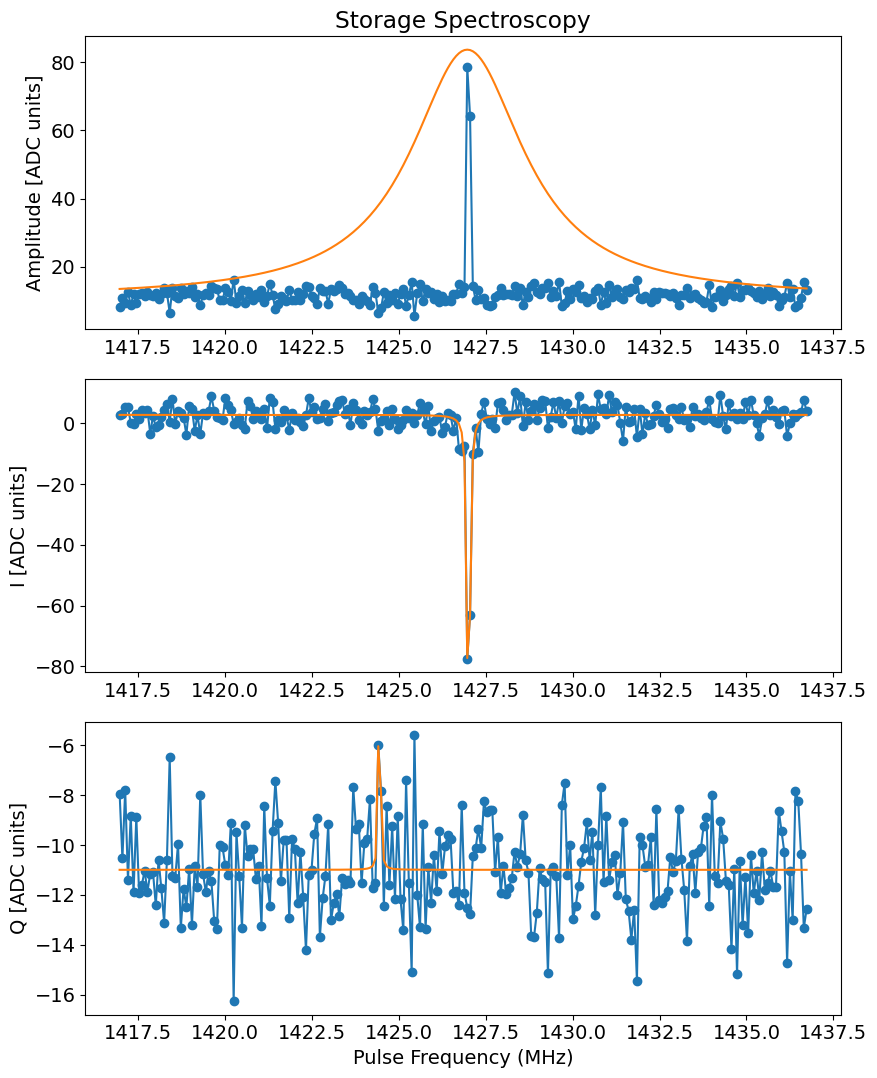

In [ ]:
# Execute for all storage modes
if expts_to_run.get('stor_spectroscopy', False):
    stor_specs = {}
    # for stor_mode_no in range(1, 8):  # modes 1-7
    for stor_mode_no in [7]:  # modes 1-7
        print(f'Running storage spectroscopy for mode {stor_mode_no}')
        stor_specs[stor_mode_no] = stor_spec_runner.execute(
            man_mode_no=1,
            stor_mode_no=stor_mode_no,
            coupler_current=coupler_current,
        )
        stor_specs[stor_mode_no].display()

### Save dataset and update to main if desired

In [ ]:
station.snapshot_man1_storage_swap(update_main=False)
# station.snapshot_man1_storage_swap(update_main=True)

## Man-dump

In [31]:
def get_dump_mode_parameters(ds_storage, config_thisrun, man_mode_no, dump_mode_no):
    """Get pulse parameters for a given dump mode."""
    dump_name = 'M' + str(man_mode_no) + '-D' + str(dump_mode_no)
    freq = ds_storage.get_freq(dump_name)
    gain = ds_storage.get_gain(dump_name)
    pi_len = ds_storage.get_pi(dump_name)
    h_pi_len = ds_storage.get_h_pi(dump_name)
    flux_low_ch = config_thisrun.hw.soc.dacs.flux_low.ch
    flux_high_ch = config_thisrun.hw.soc.dacs.flux_high.ch
    # ch = flux_low_ch if freq < 1000 else flux_high_ch
    ch = 4 
    print('Flux channel manually set to 4')

    mm_base_dummy = MM_dual_rail_base(config_thisrun, soccfg=station.soc)
    # prepulse_spec = [['multiphoton', 'g0-e0', 'pi', 0],
    #                  ['multiphoton', 'e0-f0', 'pi', 0],
    #                  ['multiphoton', 'f0-g1', 'pi', 0]]
    # postpulse_spec = [['multiphoton', 'f0-g1', 'pi', 0],
    #                   ['multiphoton', 'e0-f0', 'pi', 0]]
    # prepulse = mm_base_dummy.get_prepulse_creator(prepulse_spec).pulse.tolist()
    # postpulse = mm_base_dummy.get_prepulse_creator(postpulse_spec).pulse.tolist()

    prep_man_pi = mm_base_dummy.prep_man_photon(man_mode_no)
    prepulse = mm_base_dummy.get_prepulse_creator(prep_man_pi).pulse.tolist()
    postpulse = mm_base_dummy.get_prepulse_creator(prep_man_pi[-1:-3:-1]).pulse.tolist()

    return freq, gain, pi_len, h_pi_len, ch, prepulse, postpulse

In [27]:
station.ds_storage.df

stor_name   freq (MHz)  precision (MHz)   pi (mus)  h_pi (mus)  \
0      M1-S1   352.805558              NaN   2.352172    1.176086   
1      M1-S2   524.626255              NaN   2.307073    1.153536   
2      M1-S3   700.807420              NaN   1.696505    0.848253   
3      M1-S4   880.757057              NaN   1.865498    0.932749   
4      M1-S5  1056.917751              NaN        NaN         NaN   
5      M1-S6  1248.717666              NaN   1.804485    0.902242   
6      M1-S7  1426.868265              NaN   2.983754    1.491877   
7      M1-S8    -1.000000            -1.00  -1.000000   -1.000000   
8      M1-S9    -1.000000            -1.00  -1.000000   -1.000000   
9     M1-S10    -1.000000            -1.00  -1.000000   -1.000000   
10    M1-S11    -1.000000            -1.00  -1.000000   -1.000000   
11    M1-S12    -1.000000            -1.00  -1.000000   -1.000000   
12        M1  1998.642844              NaN   0.577254    0.283179   
13        M2  1834.950000             0.01   1.054456    0.520515   
14     M2-S1   175.630000             0.01   2.173484    1.086742   
15     M2-S2   346.840000             0.01   0.908835    0.454417   
16     M2-S3   523.220000             0.01   1.561615    0.780808   
17     M2-S4   702.650000             0.01   1.386764    0.693382   
18     M2-S5   878.780000             0.01   1.303372    0.651686   
19     M2-S6  1070.100000             0.01   2.379622    1.189811   
20     M2-S7  1249.700000             0.01   1.796981    0.898491   
21     M2-M1   173.790000             0.01   0.463481    0.231741   
22     M1-D2  2271.992162             0.01  30.000000   15.000000   
23     M2-D2  2094.050000             0.01  15.000000    0.000000   
24      M1-C   919.000000             0.02   0.251127    0.122354   
25     M1_ce  2008.780000             0.02   0.617915    0.304523   

    gain (DAC units)                 last_update  \
0               3165  2026-02-18 11:50:42.036154   
1               3747  2026-02-05 12:05:05.006501   
2               4717  2026-02-05 12:06:37.153292   
3               7158  2026-02-05 14:12:50.143204   
4               2493  2026-02-05 11:53:30.560024   
5              12761  2026-02-05 12:09:41.772552   
6               9834  2026-02-18 11:48:35.511677   
7                 -1                     51:31.3   
8                 -1                     51:31.3   
9                 -1                     51:31.3   
10                -1                     51:31.3   
11                -1                     51:31.3   
12              8000  2026-01-19 11:06:42.086262   
13             15000  2025-04-30 11:22:11.432806   
14              1000                     28:20.8   
15              5000                     33:56.1   
16              5000                     22:30.3   
17              9000                     25:33.1   
18             13500                     00:05.4   
19              9000                     30:59.0   
20             12000                     56:07.5   
21              2000  2024-10-06 01:47:25.946153   
22             20000  2026-02-10 17:57:07.753893   
23              8000  2025-01-23 17:22:53.776061   
24              1000  2025-12-08 16:40:53.078714   
25             15000  2025-01-20 09:52:35.311227   

                                     bs_rate_coeffs_g  \
0   [2.71800440497595e-10, 3.5345716702085755e-05,...   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
5                                                 NaN   
6                                                 NaN   
7                                                 NaN   
8                                                 NaN   
9                                                 NaN   
10                                                NaN   
11                                                

In [ ]:
# station.ds_storage.update_freq('M1-D1', 2271.970410423097)

### Spectroscopy

In [ ]:
# Configuration defaults
dump_spec_defaults = AttrDict(dict(
    # step=0.5,  # span/expts = 100/200
    # step=0.2,  # span/expts = 100/200
    span=20,
    expts=200,
    reps=200,
    qubit=[0],
    flux_drive=[0, 1, 5000, 5],  # [ch, freq_placeholder, gain, length(us)]
    flux_gain=5000,
    flux_length=5,
    prepulse=True,
    postpulse=True,
    active_reset=False,
    man_reset=False,
    storage_reset=False,
    relax_delay=2500,
))

def dump_spec_preproc(station, default_expt_cfg, man_mode_no=1, dump_mode_no=1, **kwargs):
    """Preprocessor for dump spectroscopy."""
    expt_cfg = deepcopy(default_expt_cfg)
    expt_cfg.update(kwargs)
    
    # Get dump mode parameters
    freq, gain, pi_len, h_pi_len, ch, prepulse, postpulse = get_dump_mode_parameters(
        station.ds_storage, station.hardware_cfg, man_mode_no, dump_mode_no
    )
    print(f'Using dump mode parameters: freq={freq}, gain={gain}, pi_len={pi_len}, h_pi_len={h_pi_len}, ch={ch}')

    # freq = 2313.0 # Temporary fix for testing
    # freq = 2262.0
    # freq = 1426.889688
    
    # Set sweep range centered on current frequency
    expt_cfg.step = expt_cfg.span / expt_cfg.expts
    expt_cfg.start = freq - expt_cfg.span/2
    print(f'Set sweep start to {expt_cfg.start} MHz with step {expt_cfg.step} MHz')
    
    # Set flux drive channel and prepulse/postpulse
    expt_cfg.flux_drive = ['high', expt_cfg.start, expt_cfg.flux_gain, expt_cfg.flux_length]
    expt_cfg.pre_sweep_pulse = prepulse
    expt_cfg.post_sweep_pulse = postpulse
    
    print(f'Dump spectroscopy for M{man_mode_no}-D{dump_mode_no}: freq={freq:.3f} MHz, span={expt_cfg.span} MHz, gain={expt_cfg.flux_gain}, length={expt_cfg.flux_length} us')
    
    return expt_cfg

def dump_spec_postproc(station, expt, man_mode_no=1, dump_mode_no=1):
    """Postprocessor for dump spectroscopy - updates frequency."""
    dump_name = f'M{man_mode_no}-D{dump_mode_no}'
    new_freq = expt.data['fit_avgi'][2]
    expt.display()
    station.ds_storage.update_freq(dump_name, new_freq)
    print(f'Updated frequency for {dump_name}: {new_freq:.4f} MHz')
    station.snapshot_man1_storage_swap(update_main=False)


In [73]:
# station.ds_storage.df

Running dump spectroscopy for mode 2
Flux channel manually set to 4
Using dump mode parameters: freq=2271.8811598952143, gain=20000, pi_len=115.27453254641748, h_pi_len=57.63726627320874, ch=4
Set sweep start to 2303.0 MHz with step 0.2 MHz
Dump spectroscopy for M1-D2: freq=2313.000 MHz, span=20.0 MHz, gain=30000, length=40 us
Job submitted: JOB-20260212-00337 (queue position: 2)

[0.1s] Job JOB-20260212-00337: pending



[382.3s] Job JOB-20260212-00337: running
[WORKER] Loading FluxSpectroscopyF0g1Experiment from experiments.single_qubit.rf_flux_spectroscopy_f0g1
[WORKER] Creating experiment instance
[WORKER]   Data file: JOB-20260212-00337_FluxSpectroscopyF0g1Experiment.h5
[WORKER] Running experiment...
[WORKER] Setting coupler yoko current to 0.5mA according to hardware_cfg yaml...
[WORKER] Done setting coupler current
  0%|                                                  | 0/100 [00:00<?, ?it/s]flux drive: ['high', 2303.0, 30000, 40]
Playing flux drive at frequency 2303.0 MHz with gain 30000
channel 4
  1%|▍                                         | 1/100 [00:00<01:27,  1.13it/s]flux drive: ['high', 2303.0, 30000, 40]
Playing flux drive at frequency 2303.2 MHz with gain 30000
channel 4
  2%|▊                                         | 2/100 [00:01<01:26,  1.13it/s]flux drive: ['high', 2303.0, 30000, 40]
Playing flux drive at frequency 2303.4 MHz with gain 30000
channel 4
  3%|█▎                    

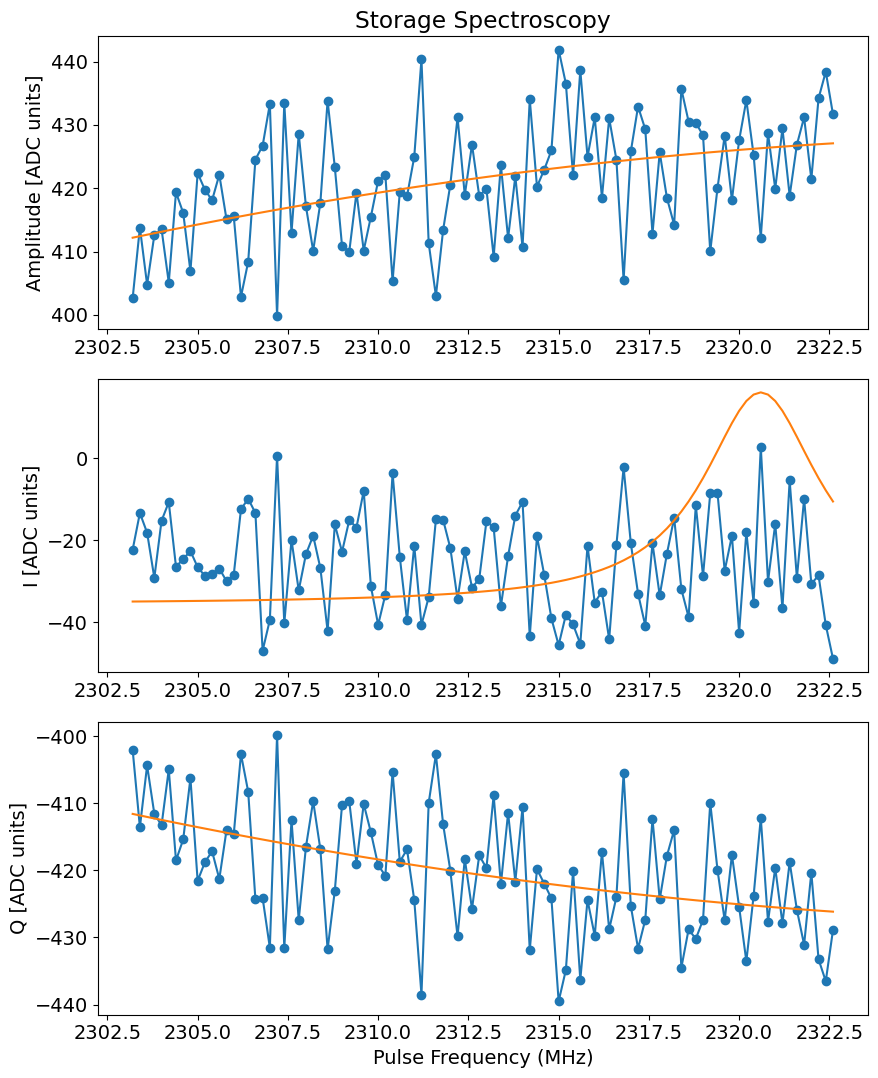

In [100]:
# Create runner
dump_spec_runner = CharacterizationRunner(
    station=station,
    ExptClass=meas.FluxSpectroscopyF0g1Experiment,
    default_expt_cfg=dump_spec_defaults,
    preprocessor=dump_spec_preproc,
    # postprocessor=dump_spec_postproc,
    job_client=client,
)

# Execute for dump modes
if expts_to_run.get('dump_spectroscopy', True):
    dump_specs = {}
    for dump_mode_no in [2]:  # specify which dump modes to run
        print(f'Running dump spectroscopy for mode {dump_mode_no}')
        dump_specs[dump_mode_no] = dump_spec_runner.execute(
            man_mode_no=1,
            dump_mode_no=dump_mode_no,
            flux_gain=30000,
            flux_length=40,
            # step=0.05,  # bw/expts = 100/200
            # span=30.0,
            # expts=600,
            span=20.0,
            expts=100,
            reps=300,
            # coupler_current=coupler_current,
        )
        dump_specs[dump_mode_no].display()

Found peak in amps at [MHz] 2271.9924169498017, HWHM 0.15504158386035677
Found peak in I at [MHz] 2271.992162304644, HWHM 0.15495663328328346
Found peak in Q at [MHz] 2271.896658594565, HWHM 0.13358156230579016


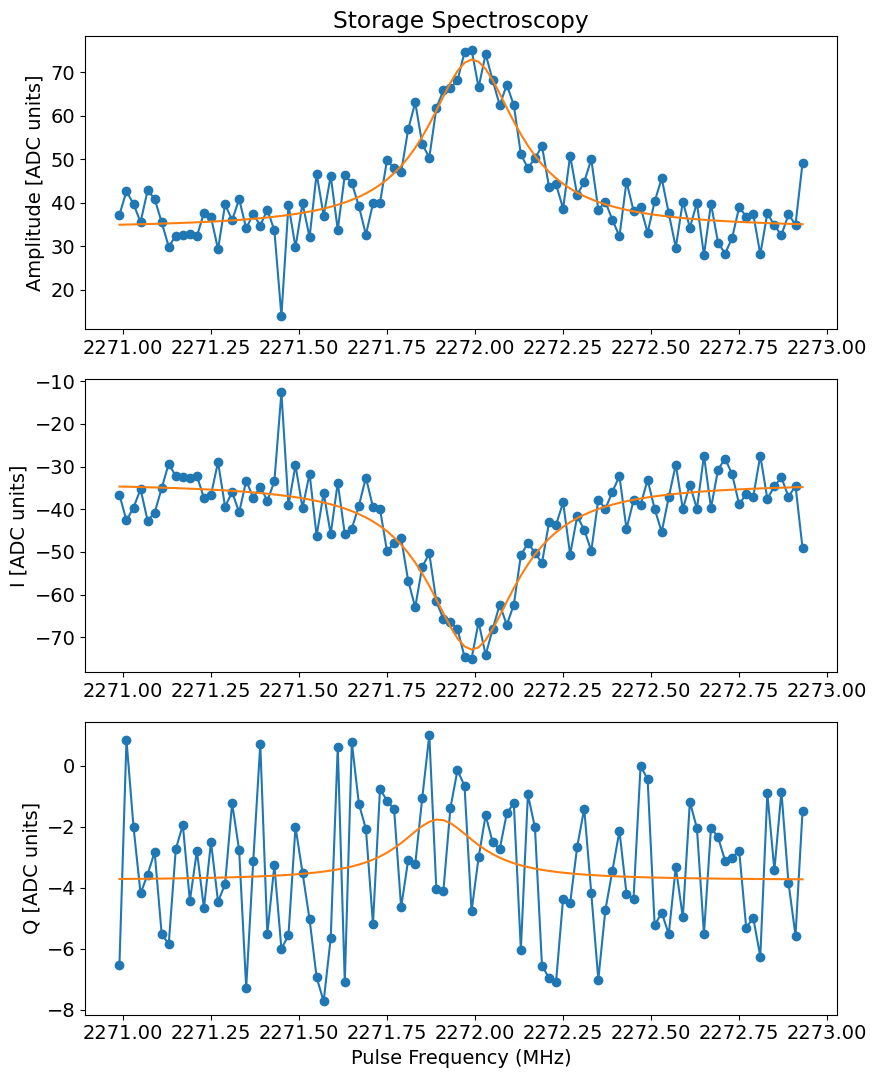

Updated frequency for M1-D1: 2271.9922 MHz
[CONFIG] Created new man1_storage_swap version CFG-M1-20260210-00020


In [127]:
dump_spec_postproc(station, dump_specs[1])

In [ ]:
# station.ds_storage.update_freq('M1-D1', 2262.6886)
station.ds_storage.update_pi('M1-D1', 30.0)
station.ds_storage.update_h_pi('M1-D1', 15.0)
station.ds_storage.update_gain('M1-D1', 20000)


# station.ds_storage.update_pi('M1-S5', 0.0)
# station.ds_storage.update_h_pi('M1-S5', 0.0)
station.ds_storage.df
station.snapshot_man1_storage_swap(update_main=False)

[CONFIG] Created new man1_storage_swap version CFG-M1-20260210-00021


'CFG-M1-20260210-00021'

### Dump chevron

Note that this experiment plays a flat top pulse by default while the spectroscopy plays a constant pulse.
The man reset code uses a flat top, so this is the one that should be used for the dump reset calibration!

In [32]:
from fitting.fit_display_classes import ChevronFitting
from datetime import datetime

# Configuration defaults for dump sideband sweep
dump_sideband_chevron_defaults = AttrDict(dict(
    start=0.007, # start time in us
    pi_len_sweep=2.0, # total sweep length in us
    expts=30, # num steps of time
    reps=50,
    rounds=1,
    qubit=0,
    qubits=[0],
    man_mode_no=1,
    prepulse=True,
    postpulse=True,
    active_reset=False,
    man_reset=True,
    storage_reset=True,
    update_post_pulse_phase=[False, 0],
    relax_delay=2500,
))

def dump_sideband_chevron_preproc(station, default_expt_cfg, **kwargs):
    assert 'dump_mode_no' in kwargs
    
    expt_cfg = deepcopy(default_expt_cfg)
    expt_cfg.update(kwargs)
    
    # Get dump mode parameters
    freq, gain, pi_len, h_pi_len, ch, prepulse, postpulse = get_dump_mode_parameters(
        station.ds_storage, station.hardware_cfg, expt_cfg.man_mode_no, expt_cfg.dump_mode_no
    )

    print('Prepulse:', prepulse)
    print('Postpulse:', postpulse)

    dump_name = f'M{expt_cfg.man_mode_no}-D{expt_cfg.dump_mode_no}'
    
    pi_len_sweep = expt_cfg.pi_len_sweep
    expt_cfg.step = pi_len_sweep / (expt_cfg.expts - 1)
    if 'gain' in expt_cfg and expt_cfg.gain is not None:
        gain = expt_cfg.gain  # Override gain if provided
    
    # expt_cfg.flux_drive = [ch, freq, gain, 0]
    expt_cfg.flux_drive = ['high', freq, gain, 0]
    expt_cfg.pre_sweep_pulse = prepulse
    expt_cfg.post_sweep_pulse = postpulse
    
    print(f'Dump sideband chevron for {dump_name}: freq={freq:.3f} MHz, gain={gain}')
    
    return expt_cfg

def dump_sideband_chevron_postproc(station, mother_expt):
    expt_cfg = mother_expt.cfg.expt
    expt_cfg.man_mode_no = 1
    stor_name = f'M1-D{expt_cfg.dump_mode_no}'

    from fitting.fit_display_classes import ChevronFitting, Spectroscopy
    import fitting.fitting as fitter
    times = mother_expt.data['xpts'][0]
    freqs = mother_expt.data['freq_sweep']

    chevron_analysis = ChevronFitting(
        frequencies=freqs,
        time=times,
        response_matrix=mother_expt.data['avgi'],
        config=station.hardware_cfg,
        station=station,
    )
    # chevron_analysis.analyze() # we don't actually use the results of the analysis, just for plotting
    chevron_analysis.display_results()

    # Fit to spectroscopy sice decay dominates over rabi
    print("Fitting assumes single shot blobs are rotated correctly")
    signs = [1, -1, 1]
    fitting_data = dict(
        avgi=mother_expt.data['avgi'][:, -1],
        avgq=mother_expt.data['avgq'][:, -1],
        amps=mother_expt.data['amps'][:, -1],
        xpts=freqs
    )
    spec_analysis = Spectroscopy(fitting_data, signs=signs, config=station.hardware_cfg, station=station)
    spec_analysis.analyze(fit=True)
    mother_expt.analysis = spec_analysis
    t = times[-1]
    spec_analysis.display(title=f'Dump Mode Spectroscopy (t={t} us)')

    best_freq = spec_analysis.data["fit_avgi"][2]

    plt.figure(figsize=(5, 4))
    best_freq_cut_idx = np.argmin(np.abs(freqs - best_freq))
    best_freq_cut = mother_expt.data['avgi'][best_freq_cut_idx, :]
    plt.plot(times, best_freq_cut, '.-')

    # Fit to an exponential decay
    spec_analysis.data["fit_T1_avgi"], spec_analysis.data["fit_err_T1_avgi"] = fitter.fitexp(times, best_freq_cut, fitparams=None)
    best_freq_cut_fit = fitter.expfunc(times, *spec_analysis.data["fit_T1_avgi"])
    p = spec_analysis.data['fit_T1_avgi']
    pCov = spec_analysis.data['fit_err_T1_avgi']
    t1 = p[3]
    captionStr = f'$T_1$ fit [us]: {t1:.3} $\\pm$ {np.sqrt(pCov[3][3]):.3}'
    print("final avgi value at best frequency:", best_freq_cut[-1])
    plt.plot(times, best_freq_cut_fit, label=captionStr)
    plt.legend()
    plt.xlabel("Time (us)")
    plt.ylabel("avgi")
    plt.title(f"Response at Freq {freqs[best_freq_cut_idx]} MHz")
    plt.show()


    print(f"Best frequency found: {best_freq:.4f} MHz")
    station.ds_storage.update_freq(stor_name, best_freq)
    print(f"Updated {stor_name} frequency to {best_freq:.4f} MHz (ds_storage)")

    pi_len = 3 * t1
    station.ds_storage.update_pi(stor_name, pi_len)
    print('Updated the pi length to 3 T1:', pi_len, "(ds_storage)")

    station.ds_storage.update_h_pi(stor_name, pi_len / 2)
    print('Updated the h_pi length to:', pi_len / 2, "(ds_storage)")

    gain = expt_cfg.get('gain', station.ds_storage.get_gain(stor_name))
    station.ds_storage.update_gain(stor_name, gain)
    print('Updated gain to:', gain)

    station.snapshot_man1_storage_swap(update_main=False)


dump_sideband_chevron_runner = SweepRunner(
    station=station,
    ExptClass=meas.single_qubit.sideband_general.SidebandGeneralExperiment,
    default_expt_cfg=dump_sideband_chevron_defaults,
    sweep_param='freq',
    # sweep_param='gain',
    preprocessor=dump_sideband_chevron_preproc,
    # postprocessor=dump_sideband_chevron_postproc,
    job_client=client,
)


In [33]:
# Run dump chevron for specified dump mode
dump_mode_no = 2
man_mode_no = 1

print(f'Running dump sideband chevron for M{man_mode_no}-D{dump_mode_no}')

# Get current frequency for sweep range
dump_name = f'M{man_mode_no}-D{dump_mode_no}'
center_freq = station.ds_storage.get_freq(dump_name)
freq_bw = 0.5  # MHz bandwidth for frequency sweep
# freq_bw = 1.0  # MHz bandwidth for frequency sweep

dump_chevron = dump_sideband_chevron_runner.execute(
    dump_mode_no=dump_mode_no,
    man_mode_no=man_mode_no,
    sweep_start=center_freq - freq_bw/2,
    sweep_stop=center_freq + freq_bw/2,
    sweep_npts=10,
    pi_len_sweep=100.0,
    expts=20,
    reps=100,
    gain=32000,
    # coupler_current=coupler_current,
    batch=True,
)


Running dump sideband chevron for M1-D2
Flux channel manually set to 4
Prepulse: [[3563.149430155541, 3419.1760186165175, 1998.7491605509501], [9318, 8275, 8000], [0, 0, 0.5760814409699041], [0, 0, 0], [2, 2, 0], ['gauss', 'gauss', 'flat_top'], [0.035, 0.035, 0.005]]
Postpulse: [[1998.7491605509501, 3419.1760186165175], [8000, 8275], [0.5760814409699041, 0], [0, 0], [0, 2], ['flat_top', 'gauss'], [0.005, 0.035]]
Dump sideband chevron for M1-D2: freq=2271.992 MHz, gain=32000
Sweep: freq from 2271.742162304644 to 2272.242162304644 (10 pts)
  File: D:\experiments\260218_qsim_scramble_low_kerr\data\00002_SidebandGeneralExperiment_sweep.h5
  Submitting 10 jobs...
Job submitted: JOB-20260218-00150 (queue position: 1)
Job submitted: JOB-20260218-00151 (queue position: 2)
Job submitted: JOB-20260218-00152 (queue position: 3)
Job submitted: JOB-20260218-00153 (queue position: 4)
Job submitted: JOB-20260218-00154 (queue position: 5)
Job submitted: JOB-20260218-00155 (queue position: 6)
Job submi

D:\python\multimode_expts\fitting\fit_display_classes.py:1717: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


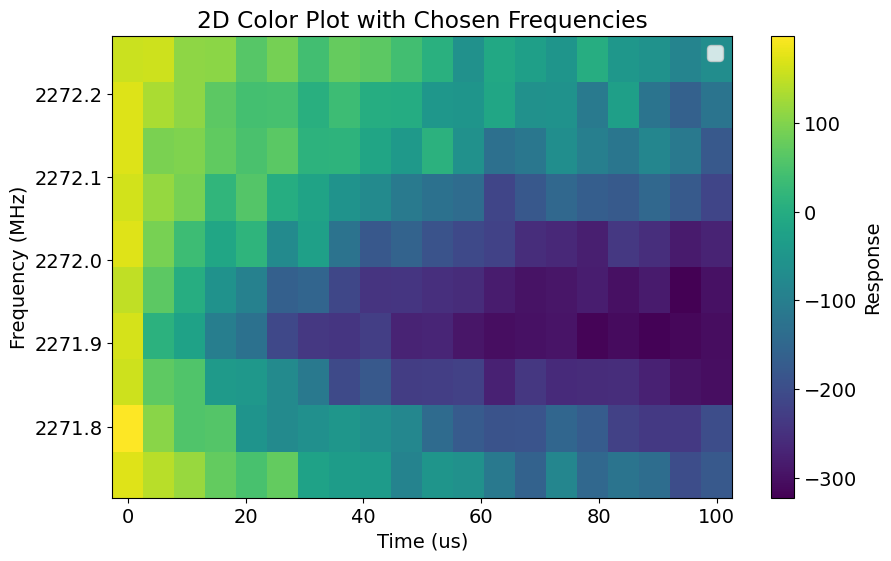

Fitting assumes single shot blobs are rotated correctly
Found peak in amps at [MHz] 2271.9484054494424, HWHM 0.4299662968887662
Found peak in I at [MHz] 2271.93451257758, HWHM 0.2845086497472599
Found peak in Q at [MHz] 2272.0754956379774, HWHM 0.05


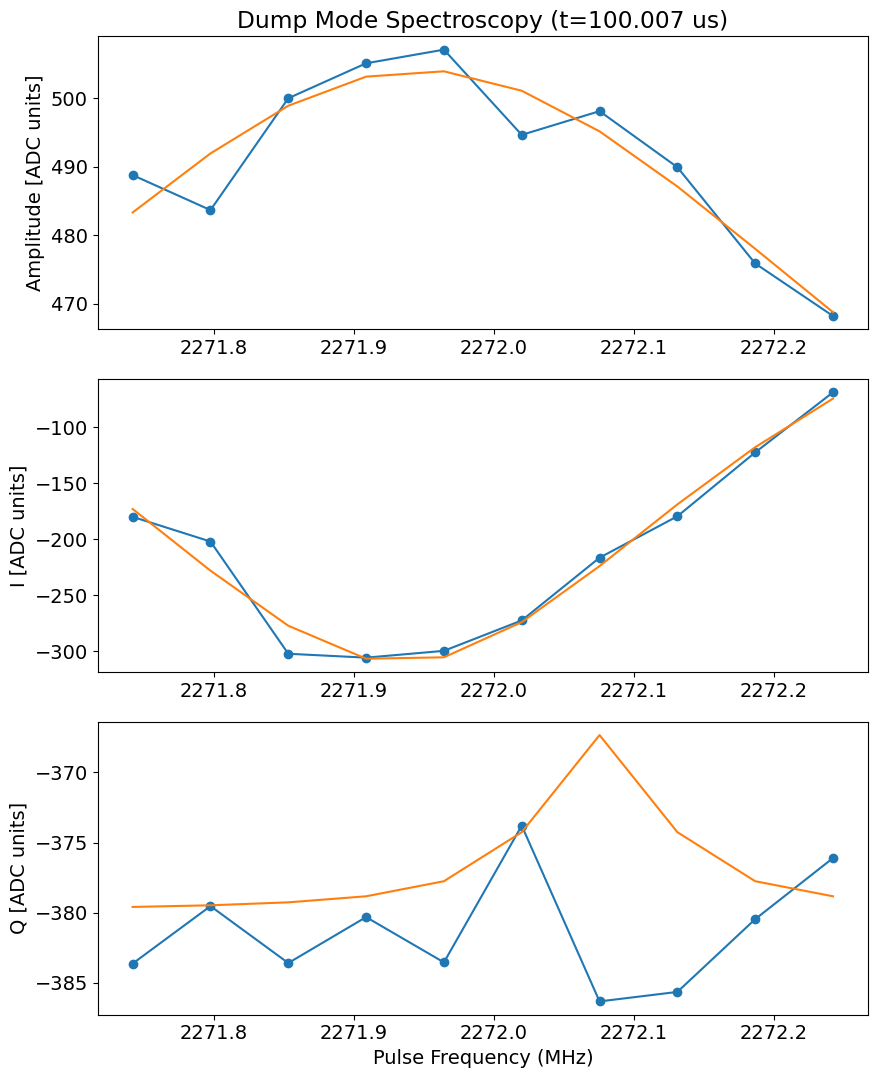

final avgi value at best frequency: -305.6312972972973


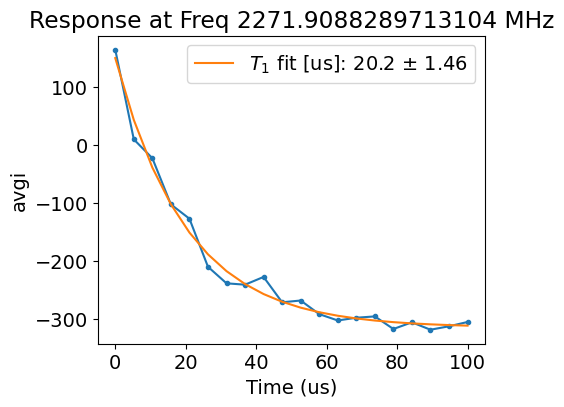

Best frequency found: 2271.9345 MHz
Updated M1-D2 frequency to 2271.9345 MHz (ds_storage)
Updated the pi length to 3 T1: 60.58134864661368 (ds_storage)
Updated the h_pi length to: 30.29067432330684 (ds_storage)
Updated gain to: 32000
[CONFIG] Created new man1_storage_swap version CFG-M1-20260218-00042


In [34]:
dump_sideband_chevron_postproc(station, dump_chevron)

In [35]:
station.snapshot_man1_storage_swap(update_main=True)

[CONFIG] Reusing existing man1_storage_swap version CFG-M1-20260218-00042
[CONFIG] Updated main man1_storage_swap to CFG-M1-20260218-00042


'CFG-M1-20260218-00042'

### Check man-dump reset with parity delay

In [ ]:
mm_base_calib = MM_dual_rail_base(station.hardware_cfg, soccfg=station.soc)
parity_delay_defaults = AttrDict(dict(
    start=0.01,
    step=0.05,
    expts=50,
    reps=250,
    rounds=1,
    qubits=[0],
    parity_fast=True,
    normalize=False,
    active_reset=False,
    man_reset=True,
    gate_based=False,
    storage_reset=True,
    man_mode_no=1,
    relax_delay=2500, 
    param_to_calib='length', # length or ac_stark_shift 
    shift_sign=1, # 1 or -1 for ac stark shift direction
    ))


def parity_delay_preproc(station, default_expt_cfg, **kwargs):
    expt_cfg = deepcopy(default_expt_cfg)
    expt_cfg.update(kwargs)
    if 'param_to_calib' in expt_cfg and expt_cfg.param_to_calib =='ac_stark_shift':
        expt_cfg.prepulse = False
        expt_cfg.pre_sweep_pulse = []
    elif 'param_to_calib' in expt_cfg and expt_cfg.param_to_calib =='length':
        expt_cfg.prepulse = True
        pre_sweep_pulse = mm_base_calib.prep_man_photon(man_no=expt_cfg.man_mode_no, photon_no=1)
        pre_sweep_pulse = mm_base_calib.get_prepulse_creator(pre_sweep_pulse, station.hardware_cfg).pulse.tolist()
        expt_cfg.pre_sweep_pulse = pre_sweep_pulse
    return expt_cfg

def parity_delay_postproc(station, expt):
    from fitting.fit_display_classes import LengthRabiFitting
    # Analyze the data
    length_rabi_analysis = LengthRabiFitting(expt.data, config = expt.cfg)
    length_rabi_analysis.analyze(fitparams = [100, 0.1, 0, None, None, None])
    length_rabi_analysis.display(title_str='Length Rabi General F0g1')
    expt_cfg = expt.cfg.expt
    man_mode_no = expt_cfg.man_mode_no
    shift_sign = expt_cfg.shift_sign


    if expt_cfg.param_to_calib == 'length':
        delay = length_rabi_analysis.results['pi_length']
        print(f'Fitted revival time: {delay} us')
        old_delay = station.hardware_cfg.device.manipulate.revival_time[man_mode_no - 1]
        station.hardware_cfg.device.manipulate.revival_time[man_mode_no - 1] = delay

        print("WARNING, NOT UPDATING ANY CONFIG PARAMS")
        # print(f'Updated revival time for mode {man_mode_no}: {old_delay} -> {station.hardware_cfg.device.manipulate.revival_time[man_mode_no - 1]}')

    elif expt_cfg.param_to_calib == 'ac_stark_shift': 
        freq = length_rabi_analysis.data['fit_avgi'][1]
        print(f'Fitted ac Stark shift: {freq} MHz')
        old_freq = station.hardware_cfg.device.manipulate.revival_stark_shift[man_mode_no - 1]

        print("WARNING, NOT UPDATING ANY CONFIG PARAMS")
        # station.hardware_cfg.device.manipulate.revival_stark_shift[man_mode_no - 1] += shift_sign * freq
        # print(f'Updated ac Stark shift for mode {man_mode_no}: {old_freq} -> {station.hardware_cfg.device.manipulate.revival_stark_shift[man_mode_no - 1]}')

In [63]:
station.ds_storage.df

stor_name   freq (MHz)  precision (MHz)   pi (mus)  h_pi (mus)  \
0      M1-S1   352.808553              NaN   2.352172    1.176086   
1      M1-S2   524.626255              NaN   2.307073    1.153536   
2      M1-S3   700.807420              NaN   1.696505    0.848253   
3      M1-S4   880.757057              NaN   1.865498    0.932749   
4      M1-S5  1056.917751              NaN        NaN         NaN   
5      M1-S6  1248.717666              NaN   1.804485    0.902242   
6      M1-S7  1426.889688              NaN   3.008964    1.504482   
7      M1-S8    -1.000000            -1.00  -1.000000   -1.000000   
8      M1-S9    -1.000000            -1.00  -1.000000   -1.000000   
9     M1-S10    -1.000000            -1.00  -1.000000   -1.000000   
10    M1-S11    -1.000000            -1.00  -1.000000   -1.000000   
11    M1-S12    -1.000000            -1.00  -1.000000   -1.000000   
12        M1  1998.642844              NaN   0.577254    0.283179   
13        M2  1834.950000             0.01   1.054456    0.520515   
14     M2-S1   175.630000             0.01   2.173484    1.086742   
15     M2-S2   346.840000             0.01   0.908835    0.454417   
16     M2-S3   523.220000             0.01   1.561615    0.780808   
17     M2-S4   702.650000             0.01   1.386764    0.693382   
18     M2-S5   878.780000             0.01   1.303372    0.651686   
19     M2-S6  1070.100000             0.01   2.379622    1.189811   
20     M2-S7  1249.700000             0.01   1.796981    0.898491   
21     M2-M1   173.790000             0.01   0.463481    0.231741   
22     M1-D2  2271.874262             0.01  86.956632   43.478316   
23     M2-D2  2094.050000             0.01  15.000000    0.000000   
24      M1-C   919.000000             0.02   0.251127    0.122354   
25     M1_ce  2008.780000             0.02   0.617915    0.304523   

    gain (DAC units)                 last_update  \
0               3175  2026-02-05 12:03:18.308045   
1               3747  2026-02-05 12:05:05.006501   
2               4717  2026-02-05 12:06:37.153292   
3               7158  2026-02-05 14:12:50.143204   
4               2493  2026-02-05 11:53:30.560024   
5              12761  2026-02-05 12:09:41.772552   
6               9774  2026-02-05 13:58:34.538345   
7                 -1                     51:31.3   
8                 -1                     51:31.3   
9                 -1                     51:31.3   
10                -1                     51:31.3   
11                -1                     51:31.3   
12              8000  2026-01-19 11:06:42.086262   
13             15000  2025-04-30 11:22:11.432806   
14              1000                     28:20.8   
15              5000                     33:56.1   
16              5000                     22:30.3   
17              9000                     25:33.1   
18             13500                     00:05.4   
19              9000                     30:59.0   
20             12000                     56:07.5   
21              2000  2024-10-06 01:47:25.946153   
22             20000  2026-02-12 14:10:23.774833   
23              8000  2025-01-23 17:22:53.776061   
24              1000  2025-12-08 16:40:53.078714   
25             15000  2025-01-20 09:52:35.311227   

                                     bs_rate_coeffs_g  \
0   [2.71800440497595e-10, 3.5345716702085755e-05,...   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
5                                                 NaN   
6                                                 NaN   
7                                                 NaN   
8                                                 NaN   
9                                                 NaN   
10                                                NaN   
11                                                

Job submitted: JOB-20260212-00251 (queue position: 1)

[0.1s] Job JOB-20260212-00251: pending

[2.1s] Job JOB-20260212-00251: running
[WORKER] Loading ParityDelayExperiment from experiments.single_qubit.parity_delay
[WORKER] Creating experiment instance
[WORKER]   Data file: JOB-20260212-00251_ParityDelayExperiment.h5
[WORKER] Running experiment...
[WORKER] Setting coupler yoko current to 0.5mA according to hardware_cfg yaml...
[WORKER] Done setting coupler current
 95%|███████████████████████████████████████▉  | 19/20 [02:25<00:07,  7.65s/it]
[160.0s] Job JOB-20260212-00251: completed
100%|██████████████████████████████████████████| 20/20 [02:32<00:00,  7.63s/it]
Saving D:\experiments\260206_dump_mode\data\JOB-20260212-00251_ParityDelayExperiment.h5
[WORKER] Saving expt object to: D:\experiments\260206_dump_mode\expt_objs\JOB-20260212-00251_expt.pkl

Job completed! Data: D:\experiments\260206_dump_mode\data\JOB-20260212-00251_ParityDelayExperiment.h5
Attempted to init fitparam 4 to 18

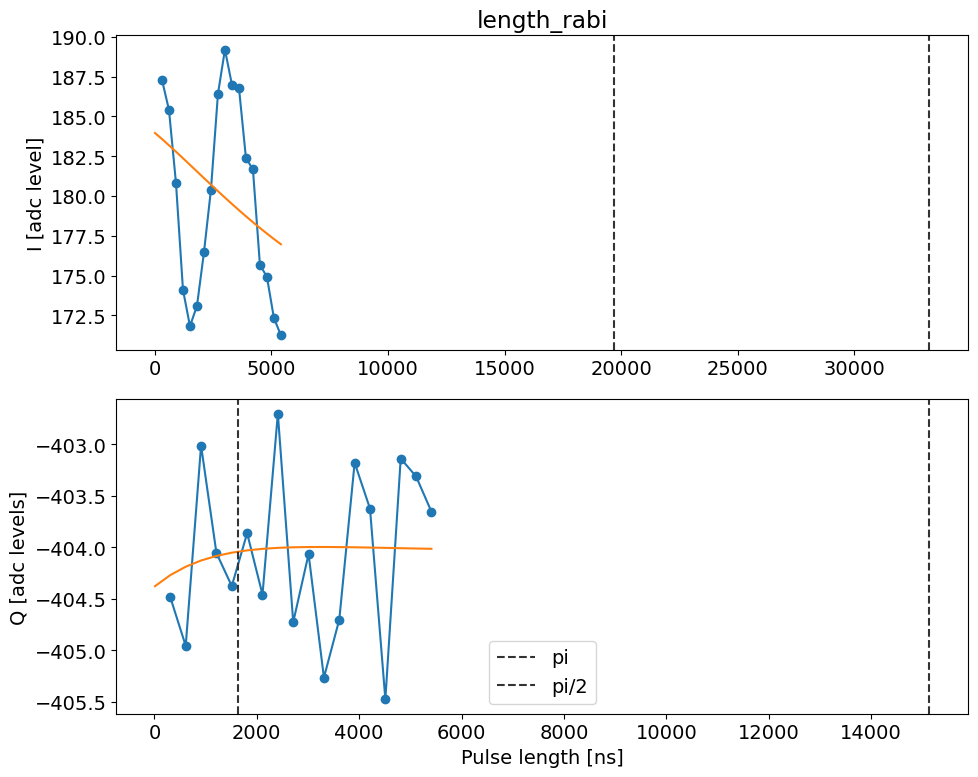

Fitted ac Stark shift: 0.018518518518518524 MHz
WARNING, NOT UPDATING ANY CONFIG PARAMS


In [77]:
parity_delay_runner = CharacterizationRunner(
    station=station,
    ExptClass=meas.ParityDelayExperiment,
    default_expt_cfg=parity_delay_defaults,
    postprocessor=parity_delay_postproc,
    preprocessor=parity_delay_preproc,
    job_client=client,
)

parity_delay_ac_stark = parity_delay_runner.execute(
    param_to_calib='ac_stark_shift', 
    # step=0.2,
    # expts=100,
    # reps=100,
    step=0.3,
    expts=20,
    reps=3000,
    shift_sign=+1,

    parity_fast=False,
    relax_delay=2500,
)

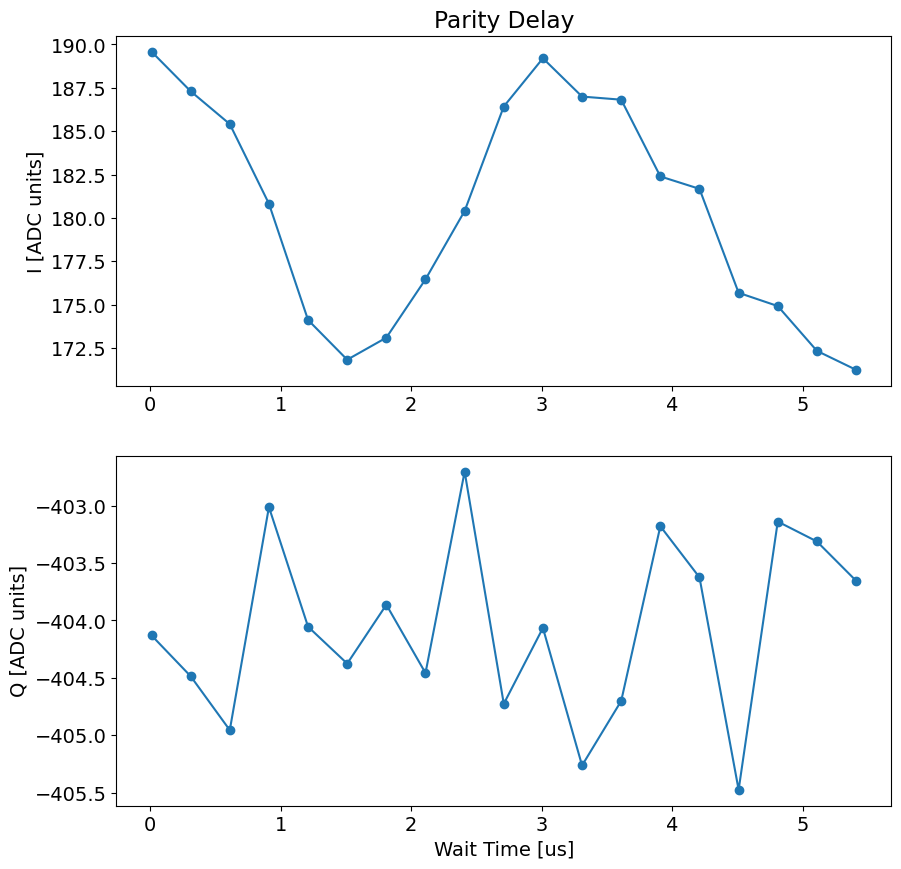

In [78]:
parity_delay_ac_stark.display(fit=False)

Job submitted: JOB-20260212-00250 (queue position: 1)

[0.1s] Job JOB-20260212-00250: pending



[10.2s] Job JOB-20260212-00250: running
[WORKER] Loading ParityDelayExperiment from experiments.single_qubit.parity_delay
[WORKER] Creating experiment instance
[WORKER]   Data file: JOB-20260212-00250_ParityDelayExperiment.h5
[WORKER] Running experiment...
[WORKER] Setting coupler yoko current to 0.5mA according to hardware_cfg yaml...
[WORKER] Done setting coupler current
  0%|                                                   | 0/20 [00:00<?, ?it/s]4 2271.874261702896 86.95663249825733 20000
4 2271.874261702896 86.95663249825733 20000
4 2272.1544790310586 86.95663249825733 20000
4 2273.3856595237867 86.95663249825733 20000
4 2272.4346963592207 86.95663249825733 20000
4 2274.8970573446777 86.95663249825733 20000
  5%|██▏                                        | 1/20 [00:09<03:01,  9.57s/it]4 2271.874261702896 86.95663249825733 20000
4 2271.874261702896 86.95663249825733 20000
4 2272.1544790310586 86.95663249825733 20000
4 2273.3856595237867 86.95663249825733 20000
4 2272.434696359220

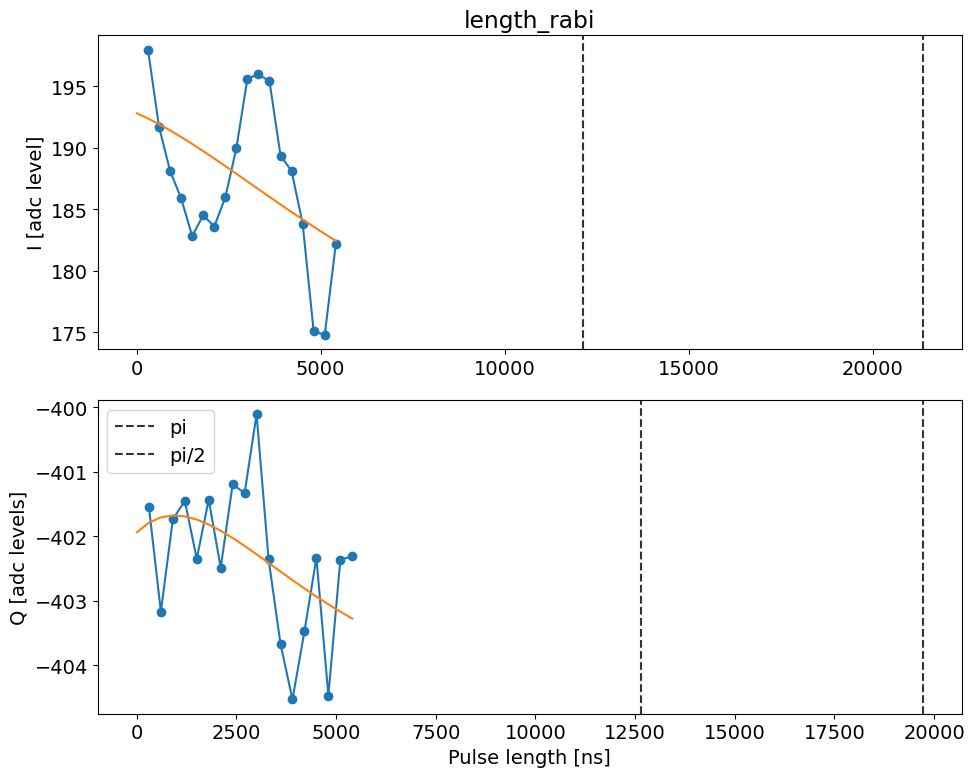

Fitted ac Stark shift: 0.027134253975118518 MHz
WARNING, NOT UPDATING ANY CONFIG PARAMS


In [75]:
parity_delay_runner = CharacterizationRunner(
    station=station,
    ExptClass=meas.ParityDelayExperiment,
    default_expt_cfg=parity_delay_defaults,
    postprocessor=parity_delay_postproc,
    preprocessor=parity_delay_preproc,
    job_client=client,
)

parity_delay_ac_stark = parity_delay_runner.execute(
    param_to_calib='ac_stark_shift', 
    step=0.3,
    expts=20,
    reps=3000,
    shift_sign=+1,

    parity_fast=False,

    active_reset=True,
    man_reset=True,
    storage_reset=False,
    relax_delay=2500, 
)

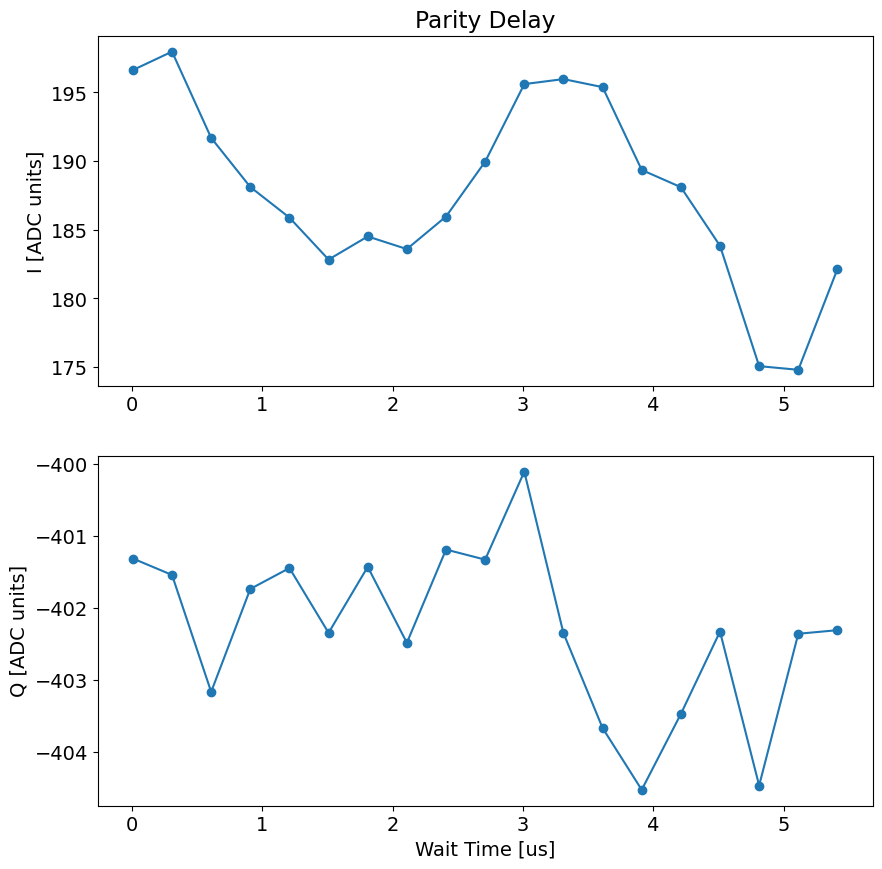

In [76]:
parity_delay_ac_stark.display(fit=False)

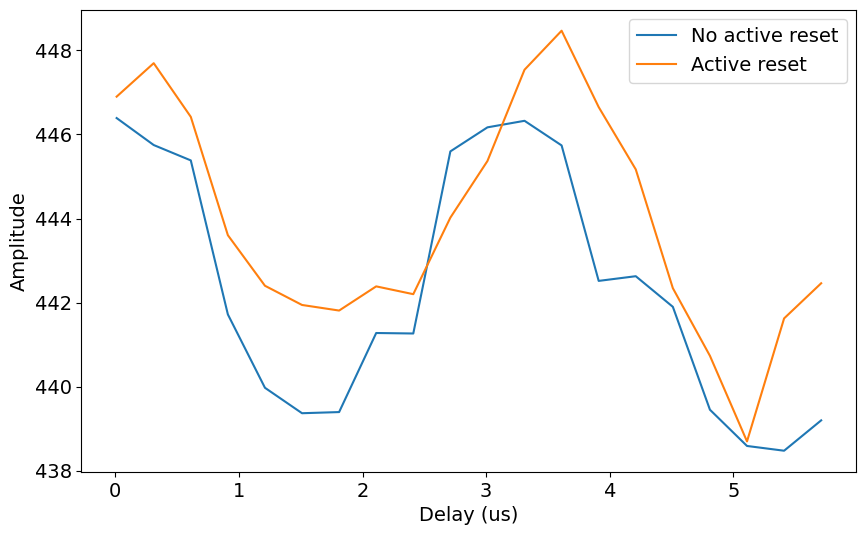

In [85]:
data1 = meas.ParityDelayExperiment.from_h5file('D:\\experiments\\260206_dump_mode\\data\\JOB-20260212-00251_ParityDelayExperiment.h5')

data2 = meas.ParityDelayExperiment.from_h5file('D:\\experiments\\260206_dump_mode\\data\\JOB-20260212-00250_ParityDelayExperiment.h5')

plt.figure()
plt.plot(data1.data['xpts'], data1.data['amps'], label='No active reset')
plt.plot(data2.data['xpts'], data2.data['amps'], label='Active reset')
plt.legend()
plt.xlabel('Delay (us)')
plt.ylabel('Amplitude')
plt.show()

## Man-coupler (to be updated)

In [ ]:
def get_coupler_parameters(ds_storage, config_thisrun, man_mode_no):
    """
    Get pulse parameters for a given storage mode. 
    Also returns prepulse and postpulse (single photon prep and meas for ge meas)

    Args:
        ds_storage: Dataset object for managing frequency data.
        config_thisrun: Configuration dictionary for the current run.
        man_mode_no: Manipulation mode number.
        dump_mode_no: Dump mode number.

    Returns:
        A tuple containing freq, gain, ch, prepulse, and postpulse.
    """
    stor_name = 'M' + str(man_mode_no) + '-C'
    freq = ds_storage.get_freq(stor_name)
    gain = ds_storage.get_gain(stor_name)
    pi_len = ds_storage.get_pi(stor_name)
    h_pi_len = ds_storage.get_h_pi(stor_name)
    ch = 'low' if freq < 1000 else 'high'

    from experiments.MM_dual_rail_base import MM_dual_rail_base
    mm_base_dummy = MM_dual_rail_base(config_thisrun, soccfg=soc)
    prep_man_pi = mm_base_dummy.prep_man_photon(man_mode_no)
    prepulse = mm_base_dummy.get_prepulse_creator(prep_man_pi).pulse.tolist()
    postpulse = mm_base_dummy.get_prepulse_creator(prep_man_pi[-1:-3:-1]).pulse.tolist() # for ge meas, only do f0g1 and ef pi

    prepulse_overwrite = [['multiphoton', 'g0-e0', 'pi', 0],
                            ['multiphoton', 'e0-f0', 'pi', 0],
                            ['multiphoton', 'f0-g1', 'pi', 0]
                        ]
    postpulse_overwrite = [ ['multiphoton', 'f0-g1', 'pi', 0],
                            ['multiphoton', 'e0-f0', 'pi', 0]]
    prepulse = mm_base_dummy.get_prepulse_creator(prepulse_overwrite).pulse.tolist()
    postpulse = mm_base_dummy.get_prepulse_creator(postpulse_overwrite).pulse.tolist()

    return freq, gain, pi_len, h_pi_len, ch, prepulse, postpulse


def do_coupler_spectroscopy(config_thisrun, 
                         ds_storage, 
                         expt_path, 
                         config_path, 
                         man_mode_no = 1, 
                         dump_no = 1,
                         flux_gain = 5000,
                         flux_length = 1):
    """
    Run the Flux Spectroscopy F0g1 Experiment.

    This function performs a flux spectroscopy experiment to measure the transition frequency
    between the f0 and g1 states of a qubit. It configures the experiment parameters, executes
    the experiment, and saves the results.

    Args:
        config_thisrun (AttrDict): Configuration dictionary for the current run.
        ds_storage (dataset.storage_man_swap_dataset): Dataset object for managing frequency data.
        expt_path (str): Path to save the experiment results.
        config_path (str): Path to the configuration file.
        man_mode_no (int, optional): Manipulation mode number (default is 1).
        dump_no (int, optional): Storage mode number (default is 1).

    Returns:
        FluxSpectroscopyF0g1Experiment: The experiment object containing the results.
    """
    flux_spec = meas.single_qubit.rf_flux_spectroscopy_f0g1.FluxSpectroscopyF0g1Experiment(
        soccfg=soc, path=expt_path, prefix='FluxSpectroscopyF0g1Experiment', config_file=config_path
    )

    flux_spec.cfg = AttrDict(deepcopy(config_thisrun))

    freq, gain, pi_len, h_pi_len, ch, prepulse, postpulse = get_coupler_parameters(ds_storage, config_thisrun,
                                                                      man_mode_no)

    # freq = 420

    flux_spec.cfg.expt = dict(
        start=freq - 50,  # Start RF frequency [MHz]
        step=1,  # Step size [MHz]
        expts=100,  # Number of experiments
        reps=200,  # Number of averages per point
        qubit=[0],
        flux_drive=[ch, 1, flux_gain, flux_length],  # RF flux modulation parameters [low/high (ch), freq (will be overwritten), gain, length(us)]
        prepulse=True,
        postpulse=True,
        active_reset=False,
        man_reset=False,
        storage_reset=False,
        pre_sweep_pulse= prepulse,
        post_sweep_pulse= postpulse,
    )

    flux_spec.cfg.device.readout.relax_delay = [2500]  # Wait time between experiments [us]
    flux_spec.go(analyze=False, display=False, progress=True, save=True)
    return flux_spec


def update_dump_spectroscopy(flux_spec, ds_storage, man_mode_no = 1):
    """Update the configuration based on Flux Spectroscopy F0g1 experiment results."""
    # Update the dataset with the new frequency
    ds_storage.update_freq('M' + str(man_mode_no) + '-C', flux_spec.data['fit'][2])
    print(f"Updated frequency for M{man_mode_no}-C: {flux_spec.data['fit'][2]}")

ds_storage.update_freq('M' + str(1) + '-C', 919)

NameError: name 'ds_storage' is not defined

  0%|          | 0/100 [00:00<?, ?it/s]

Saving D:\experiments\251111_qec\data\00042_FluxSpectroscopyF0g1Experiment.h5
[918.5, 5000, 1000, 0, 19.25501074376434, 10.189293553092234, -0.09560477328844824]
[ 9.39088029e+02  5.08955404e+05  1.63168812e+01 -5.17869390e+00
  1.36878971e+01 -2.76643858e+00  1.21313156e-01]

Freq with minimum transmission: 967.0
Freq with maximum transmission: 923.0
From fit:
	f0: 939.0880293149387
	Qi: 508955.4038289838
	Qe: 16.31688124471405
	Q0: 16.31635814961324
	kappa [MHz]: 57.5550022072296
	phi [radians]: -5.1786939027006005


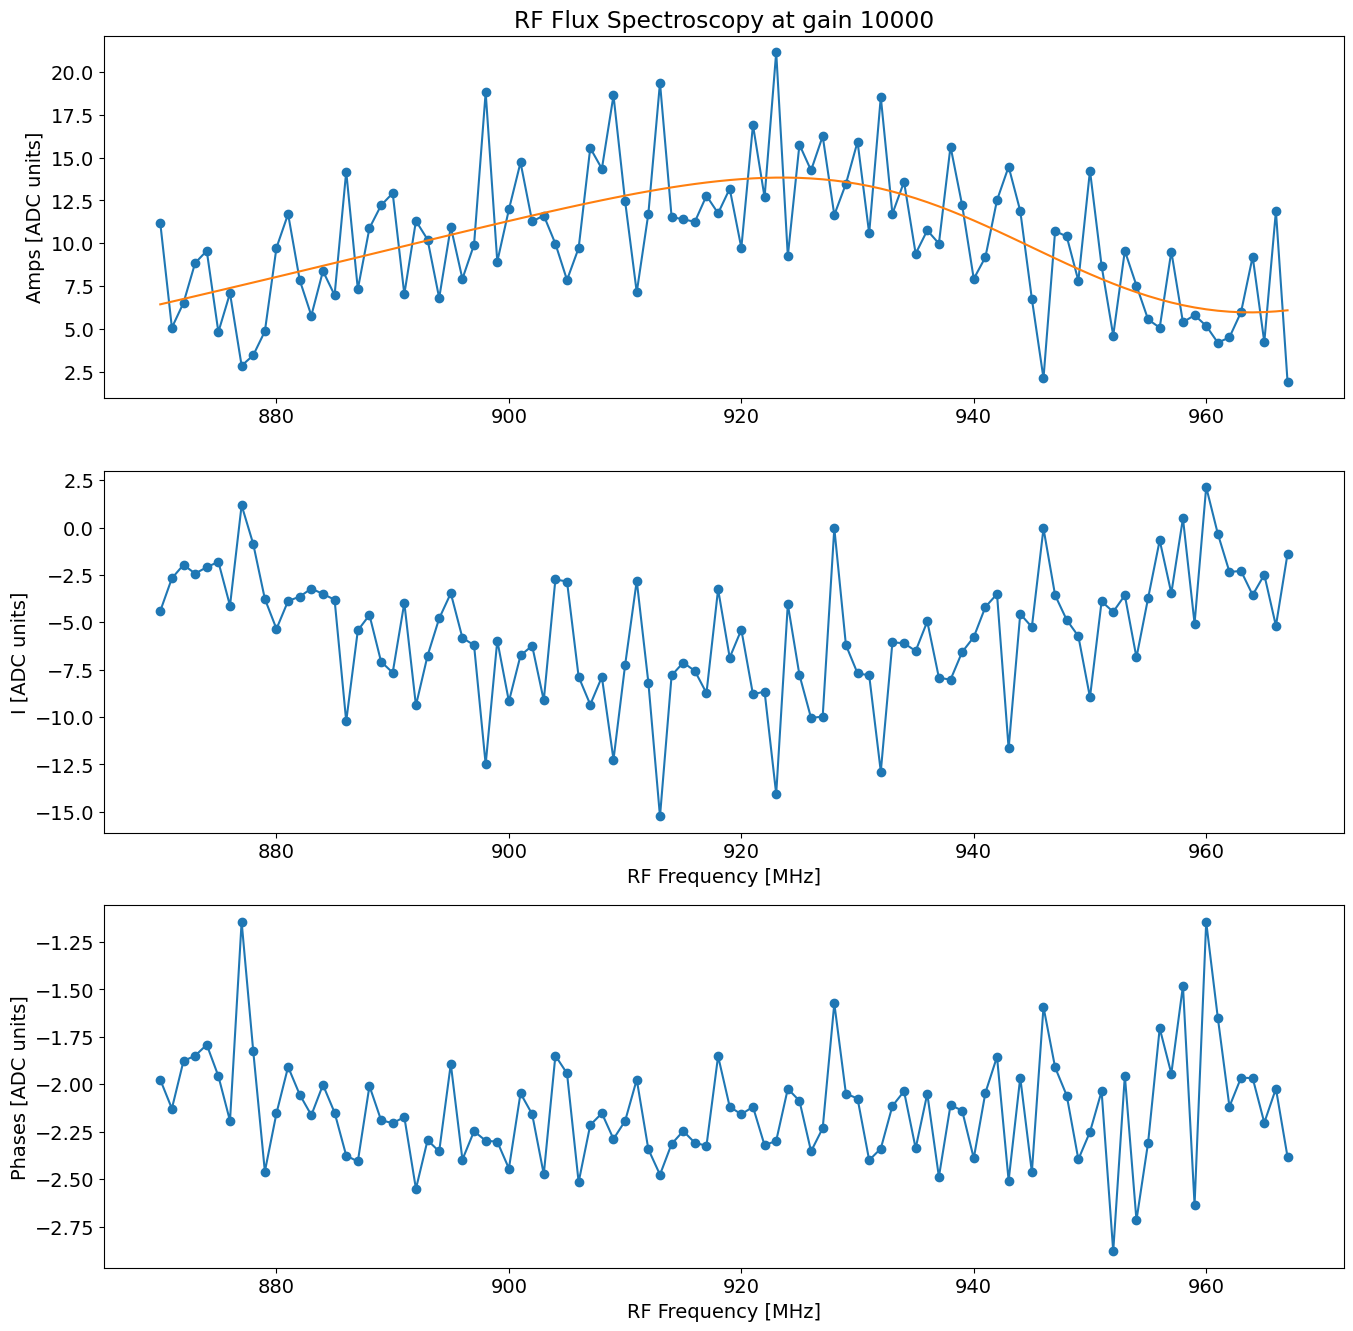

In [ ]:
spec = do_coupler_spectroscopy(config_thisrun, ds_storage, expt_path, config_path, man_mode_no=1,
                            flux_gain=10000, flux_length=2)
# analyze_and_display_stor_spectroscopy(spec)
# update_dump_spectroscopy(spec, ds_storage, 1, 1)
spec.analyze(fit=True)
spec.display()

## Freq Chevron

In [13]:
from fitting.fit_display_classes import ChevronFitting
from datetime import datetime

# Configuration defaults for sideband sweep
sideband_chevron_defaults = AttrDict(dict(
    start=0.007, # start time in us
    pi_len_sweep=2.0, # total sweep length in us
    expts=30, # num steps of time
    reps=50,
    rounds=1,
    qubit=0,
    qubits=[0],
    man_mode_no=1,
    prepulse=True,
    postpulse=True,
    active_reset=False,
    man_reset=True,
    storage_reset=True,
    update_post_pulse_phase=[False, 0],
    relax_delay=2500,
))

def sideband_chevron_preproc(station, default_expt_cfg, **kwargs):
    assert 'stor_mode_no' in kwargs
    
    expt_cfg = deepcopy(default_expt_cfg)
    expt_cfg.update(kwargs)
    
    # Get storage mode parameters
    freq, gain, pi_len, h_pi_len, ch, prepulse, postpulse = get_storage_mode_parameters(
        station.ds_storage, station.hardware_cfg, expt_cfg.man_mode_no, expt_cfg.stor_mode_no
    )

    stor_name = f'M{expt_cfg.man_mode_no}-S{expt_cfg.stor_mode_no}'
    
    pi_len_sweep = expt_cfg.pi_len_sweep
    expt_cfg.step = pi_len_sweep / (expt_cfg.expts - 1)
    if 'gain' in expt_cfg and expt_cfg.gain is not None:
        gain = expt_cfg.gain  # Override gain if provided
    
    expt_cfg.flux_drive = [ch, freq, gain, 0]
    expt_cfg.pre_sweep_pulse = prepulse
    expt_cfg.post_sweep_pulse = postpulse
    
    print(f'Sideband chevron for {stor_name}: freq={freq:.3f} MHz, gain={gain}')
    
    return expt_cfg

def sideband_chevron_postproc(station, mother_expt):
    expt_cfg = mother_expt.cfg.expt
    stor_name = f'M{expt_cfg.man_mode_no}-S{expt_cfg.stor_mode_no}'

    from fitting.fit_display_classes import ChevronFitting

    chevron_analysis = ChevronFitting(
        frequencies=mother_expt.data['freq_sweep'],
        time=mother_expt.data['xpts'][0],
        response_matrix=mother_expt.data['avgi'],
        config=station.hardware_cfg,
        station=station,
    )

    chevron_analysis.analyze()
    
    best_freq = chevron_analysis.results.get('best_frequency_contrast')
        
    if best_freq:
        print(f"Best frequency found: {best_freq:.4f} MHz")
        station.ds_storage.update_freq(stor_name, best_freq)
        print(f"Updated {stor_name} frequency to {best_freq:.4f} MHz")
        pi_len = abs(np.pi / chevron_analysis.results['best_fit_params_period']['omega'])
        station.ds_storage.update_pi(stor_name, pi_len)
        print('Updated the pi length to:', pi_len)
        station.ds_storage.update_h_pi(stor_name, pi_len / 2)
        print('Updated the h_pi length to:', pi_len / 2)
        # station.ds_storage.update_gain(stor_name, expt_cfg.flux_drive[2])
        # print('Updated gain to:', expt_cfg.flux_drive[2])
    mother_expt.analysis = chevron_analysis
    station.snapshot_man1_storage_swap(update_main=False)

sideband_chevron_runner = SweepRunner(
    station=station,
    ExptClass=meas.single_qubit.sideband_general.SidebandGeneralExperiment,
    default_expt_cfg=sideband_chevron_defaults,
    sweep_param='freq',
    preprocessor=sideband_chevron_preproc,
    postprocessor=sideband_chevron_postproc,
    job_client=client,
)

Running sideband chevron for M1-S7
Sideband chevron for M1-S7: freq=1426.531 MHz, gain=9774
Sweep: freq from 1426.529687901337 to 1427.1296879013369 (12 pts)
  File: D:\experiments\260218_qsim_scramble_low_kerr\data\00001_SidebandGeneralExperiment_sweep.h5
  [1/12] freq=1426.5297 Job submitted: JOB-20260218-00130 (queue position: 1)
[WORKER] Loading SidebandGeneralExperiment from experiments.single_qubit.sideband_general
[WORKER] Creating experiment instance
[WORKER]   Data file: JOB-20260218-00130_SidebandGeneralExperiment.h5
[WORKER] Running experiment...
[WORKER] Setting coupler yoko current to 0.5mA according to hardware_cfg yaml...
[WORKER] Done setting coupler current
100%|██████████████████████████████████████████| 30/30 [00:11<00:00,  2.57it/s]
Saving D:\experiments\260218_qsim_scramble_low_kerr\data\JOB-20260218-00130_SidebandGeneralExperiment.h5
[WORKER] Saving expt object to: D:\experiments\260218_qsim_scramble_low_kerr\expt_objs\JOB-20260218-00130_expt.pkl
  [2/12] freq=142

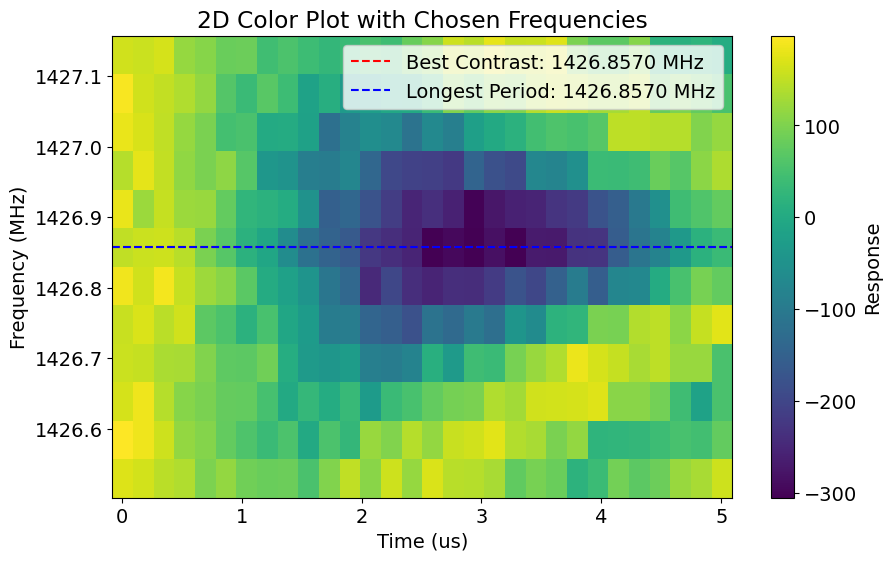

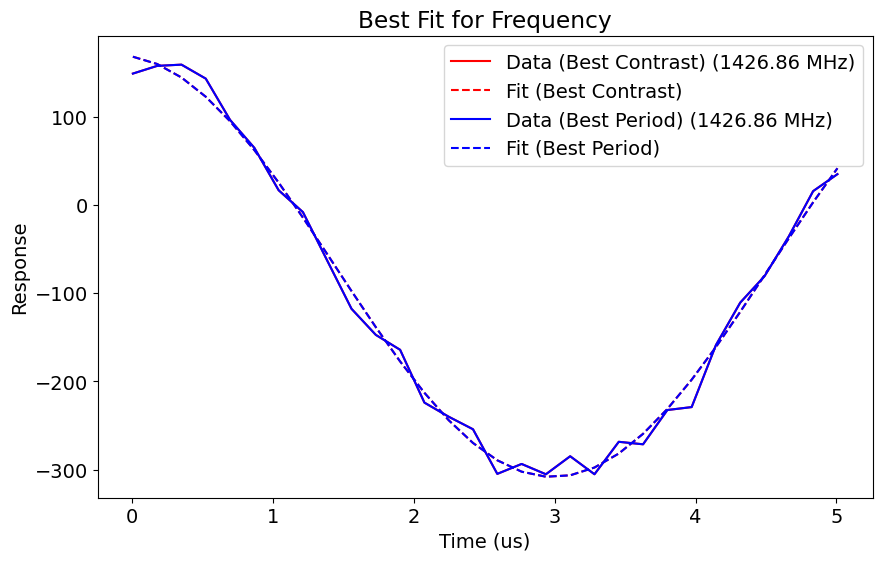

In [ ]:
if expts_to_run.get('sideband_freq_sweep', False):
    # for stor_i in expts_to_run.get('stor_modes', [1]):
    for stor_i in [7]:
        stor_name = f'M1-S{stor_i}'

        freq_span = 0.6
        # freq_step = 0.05
        freq_step = 0.05
        pi_len_sweep = 5.0
        gain = station.ds_storage.get_gain(stor_name)
        
        print(f'Running sideband chevron for {stor_name}')
        chevron_analysis = sideband_chevron_runner.execute(
            reps=100,
            stor_mode_no=stor_i,
            sweep_start=station.ds_storage.get_freq(stor_name) - freq_span/2,
            sweep_stop=station.ds_storage.get_freq(stor_name) + freq_span/2,
            sweep_npts=int(freq_span//freq_step + 1),
            pi_len_sweep=pi_len_sweep,
            gain=gain,
            batch=True,
        )
        chevron_analysis.analysis.display_results()

In [23]:
station.snapshot_man1_storage_swap(update_main=True)

[CONFIG] Reusing existing man1_storage_swap version CFG-M1-20260127-00011
[CONFIG] Updated main man1_storage_swap to CFG-M1-20260127-00011


'CFG-M1-20260127-00011'

## Error amplification

In [21]:
error_amp_gain1 = [None] * len(expts_to_run['stor_modes'])
error_amp_freq1 = [None] * len(expts_to_run['stor_modes'])
error_amp_gain2 = [None] * len(expts_to_run['stor_modes'])
error_amp_freq2 = [None] * len(expts_to_run['stor_modes'])

In [22]:
error_amp_stor_defaults = AttrDict(dict(
    reps=50,
    rounds=1,
    qubits=[0],
    man_mode_no=1,
    stor_is_dump=False,
    active_reset=False,
    man_reset=True,
    storage_reset=True,
    relax_delay=2500, 
    expts=30,
)) # Shouldn't be modifying this on the fly!
# You can use kwargs in the run function to override these values

error_amp_gain_stor_coarse_defaults = AttrDict(dict(
    n_start=0,
    n_step=3,
    n_pulses=15,
    expts=50,
))

error_amp_freq_stor_coarse_defaults = AttrDict(dict(
    n_start=0,
    n_step=1,
    n_pulses=5,
    expts=50,
))


def error_amp_stor_preproc(station, default_expt_cfg, **kwargs):
    assert 'stor_mode_no' in kwargs
    assert 'parameter_to_test' in kwargs 

    # construct the defaults
    expt_cfg = deepcopy(default_expt_cfg)
    if kwargs['parameter_to_test'] == 'gain':
        expt_cfg.update(error_amp_gain_stor_coarse_defaults)
    elif kwargs['parameter_to_test'] == 'frequency':
        expt_cfg.update(error_amp_freq_stor_coarse_defaults)

    # override with the passed kwargs
    expt_cfg.update(kwargs)

    stor_mode_no = expt_cfg.stor_mode_no    
    man_mode_no = expt_cfg.man_mode_no

    freq, gain, pi_len, h_pi_len, ch, prepulse, postpulse = get_storage_mode_parameters(
        station.ds_storage, station.hardware_cfg, man_mode_no, stor_mode_no
        )
    print(f"Previous freq {freq}, gain {gain}, pi_len {pi_len}")

    if 'span' not in expt_cfg:
        if expt_cfg.parameter_to_test == 'gain':
            expt_cfg.span = int(gain * 0.3)
        elif expt_cfg.parameter_to_test == 'frequency':
            expt_cfg.span = 0.15 # MHz
  
    stor_name = f'M{man_mode_no}-S{stor_mode_no}'
    pulse_type = ['storage', stor_name, 'pi', 0]

    if expt_cfg.parameter_to_test == 'frequency':
        start = freq - expt_cfg.span / 2
        step = expt_cfg.span / (expt_cfg.expts - 1)
    elif expt_cfg.parameter_to_test == 'gain':
        start = int(gain - expt_cfg.span / 2)
        step = int(expt_cfg.span / (expt_cfg.expts - 1))
    else:
        raise ValueError("parameter_to_test must be either 'frequency' or 'gain'.")
    expt_cfg.start = start
    expt_cfg.step = step
    expt_cfg.pulse_type = pulse_type 
    return expt_cfg

def error_amp_stor_postproc(station, expt):
    expt.analyze(data=expt.data, state_fin='e')

    opt_gain = expt.data['fit_avgi'][2]
    stor_name = 'M1-S' + str(expt.cfg.expt.stor_mode_no)
    if expt.cfg.expt.parameter_to_test == 'gain':
        station.ds_storage.update_gain(stor_name, opt_gain)
    elif expt.cfg.expt.parameter_to_test == 'frequency':
        station.ds_storage.update_freq(stor_name, opt_gain)
    station.snapshot_man1_storage_swap(update_main=False)


error_amp_stor_runner = CharacterizationRunner(
    station=station,
    ExptClass=meas.ErrorAmplificationExperiment,
    default_expt_cfg=error_amp_stor_defaults,
    preprocessor=error_amp_stor_preproc,
    postprocessor=error_amp_stor_postproc,
    job_client=client,
)

Running M1-S1
Previous freq 352.80855293167787, gain 3175, pi_len 2.352172278062457
Job submitted: JOB-20260218-00145 (queue position: 1)

[0.1s] Job JOB-20260218-00145: pending

[2.1s] Job JOB-20260218-00145: running
[WORKER] Loading ErrorAmplificationExperiment from experiments.single_qubit.error_amplification
[WORKER] Creating experiment instance
[WORKER]   Data file: JOB-20260218-00145_ErrorAmplificationExperiment.h5
[WORKER] Running experiment...
[WORKER] Setting coupler yoko current to 0.5mA according to hardware_cfg yaml...
[WORKER] Done setting coupler current
cfg at start of acquire {'reps': 50, 'rounds': 1, 'qubits': [0], 'man_mode_no': 1, 'stor_is_dump': False, 'active_reset': False, 'man_reset': True, 'storage_reset': True, 'relax_delay': 2500, 'expts': 50, 'n_start': 0, 'n_step': 1, 'n_pulses': 5, 'stor_mode_no': 1, 'parameter_to_test': 'frequency', 'span': 0.3, 'start': 352.6585529316779, 'step': 0.006122448979591836, 'pulse_type': ['storage', 'M1-S1', 'pi', 0]}
 83%|████

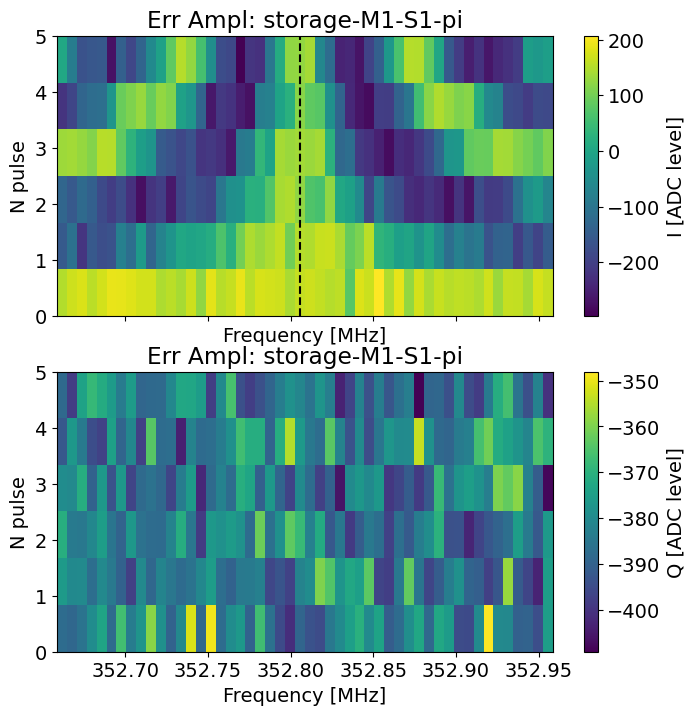

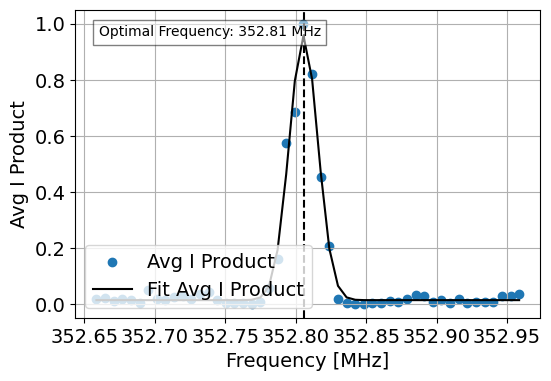

Previous freq 352.8055578652965, gain 3175, pi_len 2.352172278062457
Job submitted: JOB-20260218-00146 (queue position: 1)

[0.1s] Job JOB-20260218-00146: pending

[2.1s] Job JOB-20260218-00146: running
[WORKER] Loading ErrorAmplificationExperiment from experiments.single_qubit.error_amplification
[WORKER] Creating experiment instance
[WORKER]   Data file: JOB-20260218-00146_ErrorAmplificationExperiment.h5
[WORKER] Running experiment...
[WORKER] Setting coupler yoko current to 0.5mA according to hardware_cfg yaml...
[WORKER] Done setting coupler current
cfg at start of acquire {'reps': 50, 'rounds': 1, 'qubits': [0], 'man_mode_no': 1, 'stor_is_dump': False, 'active_reset': False, 'man_reset': True, 'storage_reset': True, 'relax_delay': 2500, 'expts': 50, 'n_start': 0, 'n_step': 3, 'n_pulses': 15, 'stor_mode_no': 1, 'parameter_to_test': 'gain', 'span': 952, 'start': 2699, 'step': 19, 'pulse_type': ['storage', 'M1-S1', 'pi', 0]}
 83%|████████████████████████████████████▋       | 5/6 [00:

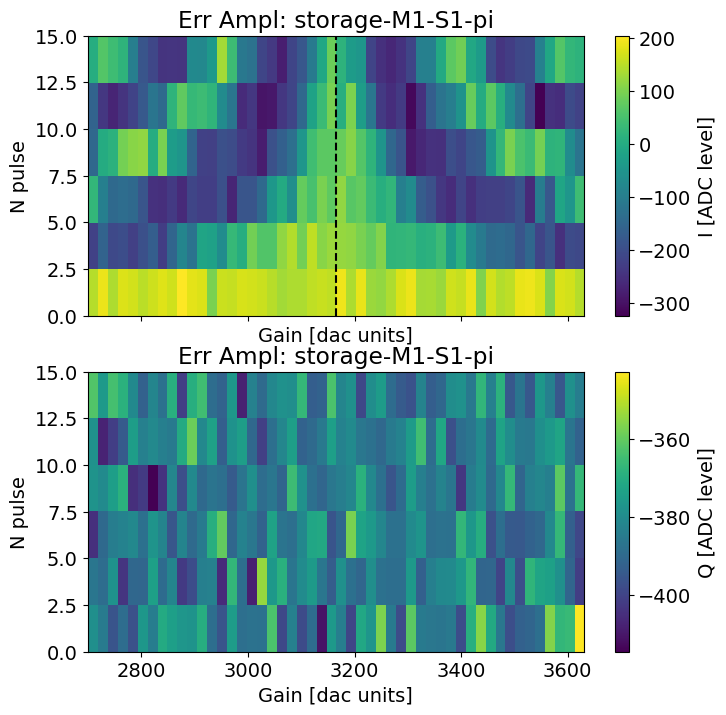

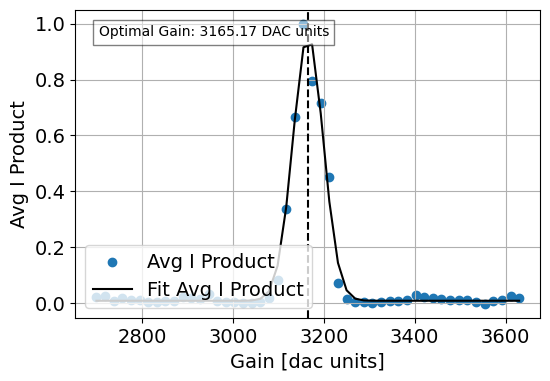

In [25]:
# for i, stor_i in enumerate(stor_modes_to_run):
# for i, stor_i in enumerate(expts_to_run.get('stor_modes', [1])):
for i, stor_i in enumerate([1]):
    stor_name = 'M1-S' + str(stor_i)
    print("Running", stor_name)
    error_amp_freq1[i] = error_amp_stor_runner.execute(
        stor_mode_no=stor_i,
        parameter_to_test='frequency',
        span=0.3,
    )
    error_amp_freq1[i].display()

    error_amp_gain1[i] = error_amp_stor_runner.execute(
        stor_mode_no=stor_i,
        parameter_to_test='gain',
    )
    error_amp_gain1[i].display()

In [26]:
station.snapshot_man1_storage_swap(update_main=True)

[CONFIG] Reusing existing man1_storage_swap version CFG-M1-20260218-00038
[CONFIG] Updated main man1_storage_swap to CFG-M1-20260218-00038


'CFG-M1-20260218-00038'

In [ ]:
# save new dataset to current_dataset path
station.ds_storage.save_to_file(
    station.config_dir / station.hardware_cfg.device.storage.storage_man_file
)

Creating or updating new csv at path: D:\python\multimode_expts\configs\man1_storage_swap_dataset.csv


In [ ]:
ds_storage.get_all('M1-S1')
# ds_storage.update_freq('M1-S1', 354.25)
# ds_storage.update_gain('M1-S1', 3500)

In [ ]:
ds_storage.df

stor_name   freq (MHz)  precision (MHz)   pi (mus)  h_pi (mus)  \
0      M1-S1   352.864639              NaN   1.861001    0.930501   
1      M1-S2   524.732041              NaN   1.880380    0.940190   
2      M1-S3   700.868681              NaN   1.857972    0.928986   
3      M1-S4   880.813564              NaN   1.538406    0.769203   
4      M1-S5  1057.186387              NaN   1.876770    0.938385   
5      M1-S6  1248.764437              NaN   1.861310    0.930655   
6      M1-S7  1426.971632              NaN   3.448309    1.724154   
7      M1-S8    -1.000000            -1.00  -1.000000   -1.000000   
8      M1-S9    -1.000000            -1.00  -1.000000   -1.000000   
9     M1-S10    -1.000000            -1.00  -1.000000   -1.000000   
10    M1-S11    -1.000000            -1.00  -1.000000   -1.000000   
11    M1-S12    -1.000000            -1.00  -1.000000   -1.000000   
12        M1  2004.016904              NaN   0.567250    0.278533   
13        M2  1834.950000             0.01   1.054456    0.520515   
14     M2-S1   175.630000             0.01   2.173484    1.086742   
15     M2-S2   346.840000             0.01   0.908835    0.454417   
16     M2-S3   523.220000             0.01   1.561615    0.780808   
17     M2-S4   702.650000             0.01   1.386764    0.693382   
18     M2-S5   878.780000             0.01   1.303372    0.651686   
19     M2-S6  1070.100000             0.01   2.379622    1.189811   
20     M2-S7  1249.700000             0.01   1.796981    0.898491   
21     M2-M1   173.790000             0.01   0.463481    0.231741   
22     M1-D1  2373.600000             0.01  10.000000    0.000000   
23     M2-D2  2094.050000             0.01  15.000000    0.000000   
24      M1-C   919.000000             0.02   0.251127    0.122354   
25     M1_ce  2008.780000             0.02   0.617915    0.304523   

    gain (DAC units)                 last_update  
0               3565  2025-12-09 11:01:09.540616  
1               4490  2025-12-09 11:05:12.237531  
2               4511  2025-12-09 11:09:15.044775  
3               9033  2025-12-09 11:13:17.493516  
4               9987  2025-12-09 11:17:20.123557  
5              13802  2025-12-09 11:21:23.129555  
6               9009  2025-12-09 11:56:32.673570  
7                 -1                     51:31.3  
8                 -1                     51:31.3  
9                 -1                     51:31.3  
10                -1                     51:31.3  
11                -1                     51:31.3  
12              8000  2025-12-09 10:47:05.140869  
13             15000  2025-04-30 11:22:11.432806  
14              1000                     28:20.8  
15              5000                     33:56.1  
16              5000                     22:30.3  
17              9000                     25:33.1  
18             13500                     00:05.4  
19              9000                     30:59.0  
20             12000                     56:07.5  
21              2000  2024-10-06 01:47:25.946153  
22              4000  2025-10-28 16:37:57.400701  
23              8000  2025-01-23 17:22:53.776061  
24              1000  2025-12-08 16:40:53.078714  
25             15000  2025-01-20 09:52:35.311227

In [ ]:
# for i, stor_i in enumerate(expts_to_run['stor_modes']):
#     if stor_i != 4: continue
#     # if stor_i == 5: continue

#     stor_name = 'M1-S' + str(stor_i)
#     print(stor_name)
#     ds.update_gain(stor_name, ds_storage.get_gain(stor_name))
#     ds.update_freq(stor_name, ds_storage.get_freq(stor_name))
#     ds.update_pi(stor_name, ds_storage.get_pi(stor_name))
#     ds.update_h_pi(stor_name, ds_storage.get_h_pi(stor_name))

In [ ]:
for i in range(len(expts_to_run['stor_modes'])):
    print('Frequency for M1-S' + str(i+1) + ':', ds_storage.get_freq('M1-S' + str(i+1)))

In [ ]:
# #Update sweep data and analyze results

# temp_data, attrs, filename = prev_data(expt_path, prefix='sideband_general_sweep')
# print('File saved at:', filename)

# from fitting.fit_display_classes import ChevronFitting
# from datetime import datetime
# chevron_analysis = ChevronFitting(
#     frequencies=temp_data['freq_sweep'],
#     time=temp_data['xpts'][0],
#     response_matrix=temp_data['avgi'],
#     config = config_thisrun,
# )
# chevron_analysis.analyze()

# current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
# chevron_analysis.display_results(save_fig=True,  title=f'M{1}-S{7}_{current_time}')

In [ ]:
# i = 5
# print(f'Running fine sideband sweep for storage mode {i + 1}')
# freq_start = ds_storage.get_freq('M1-S' + str(i + 1)) - 1.5
# freq_stop = ds_storage.get_freq('M1-S' + str(i + 1)) + 1.5
# freq_step = 0.2
# sideband_chevrons_fine = do_sideband_general_sweep(
#     config_thisrun, ds_storage, expt_path, config_path, freq_start, freq_stop, freq_step, 
#     man_mode_no=1, stor_mode_no=i + 1, start_time=0.1, use_flux_low=True)
# # update_sideband_general_sweep(expt_path, config_thisrun, ds_storage, man_mode_no=1, stor_mode_no=i + 1, use_flux_low=True)

In [ ]:
# i = 5
# print(f'Running fine sideband sweep for storage mode {i + 1}')
# freq_start = ds_storage.get_freq('M1-S' + str(i + 1)) - 0.5
# freq_stop = ds_storage.get_freq('M1-S' + str(i + 1)) + 0.5
# freq_step = 0.2
# sideband_chevrons_fine = do_sideband_general_sweep(
#     config_thisrun, ds_storage, expt_path, config_path, freq_start, freq_stop, freq_step, 
#     man_mode_no=1, stor_mode_no=i + 1, start_time=0.1, use_flux_low=False)
# # update_sideband_general_sweep(expt_path, config_thisrun, ds_storage, man_mode_no=1, stor_mode_no=i + 1, use_flux_low=True)

### Manually get the frequencies from the chevrons

In [ ]:
# file_list = [34,36,38,40,42,44,46]
# chevrons_stor_objects = [None]* len(file_list)
# name = '_sideband_general_sweep.h5'
# # name = '_storage_sideband_sweep.h5'
# for idx, file_no in enumerate(file_list):
#     full_name = str(file_no).zfill(5)+name
#     expt_path_mod = r"H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data"
#     temp_data, attrs, filename = prev_data(expt_path_mod, full_name)  # ef

#     from fitting.fit_display_classes import ChevronFitting
#     chevron_analysis = ChevronFitting(
#         frequencies=temp_data['freq_sweep'],
#         time=temp_data['xpts'][0],
#         response_matrix=temp_data['avgi']
#     )
#     chevrons_stor_objects[idx] = chevron_analysis

In [ ]:
# i = 6
# # guess_freq = 1422.66
# anls = chevrons_stor_objects[i]
# anls.analyze()
# anls.display_results(save_fig=False, 
#                     directory=autocalib_path, 
#                     title=f'M1-S{i+1}')
#                 #  hlines = [guess_freq])
# ds_storage.update_freq('M1-S' + str(i+1), anls.results['best_frequency_period'])
# # or override manually 
# # ds_storage.update_freq('M1-S' + str(i+1), 1052.8026)

In [ ]:
# ds_storage.df

In [ ]:

# ds_storage.update_freq('M1-S' + str(i), guess_freq)

In [ ]:
# ds_storage.get_freq('M1-S3')

In [ ]:
# stor_mode_no = 1
# man_mode_no = 1
# len_rabi_storage = do_sideband_general(config_thisrun, expt_path, config_path, man_mode_no, stor_mode_no)
# update_sideband_general(len_rabi_storage, config_thisrun, ds_storage, man_mode_no, stor_mode_no)

## Randomized Benchmarking

In [ ]:
len([1, 5, 10, 15, 25, 50, 75, 100, 150, 200, 250, 400, 500, 600, 700, 850, 1000, 1250, 1500])

In [ ]:
# config_thisrun.device.storage.ramp_sigma
# man_mode_no = 1
# stor_mode_no = 7
# req = ds_storage.get_freq('M' + str(man_mode_no) + '-S' + str(stor_mode_no))
# gain = ds_storage.get_gain('M' + str(man_mode_no) + '-S' + str(stor_mode_no))
# hpi_length = ds_storage.get_h_pi('M' + str(man_mode_no) + '-S' + str(stor_mode_no))
# print("ramp_sigma:", config_thisrun.device.storage.ramp_sigma)
# print("man_mode_no:", man_mode_no)
# print("stor_mode_no:", stor_mode_no)
# print("freq:", req)
# print("gain:", gain)
# print("hpi_length:", hpi_length)

In [ ]:

def do_single_beam_splitter_rb_postselection_sweep_depth(config_thisrun, ds_storage, expt_path, config_path, exp_param_file, man_mode_no=1, stor_mode_no=1,
                                                         prev_data=None):
    """
    Run the SingleBeamSplitterRBPostSelection_sweep_depth experiment.
    """
    from multimode_expts.sequential_experiment_classes import MM_DualRailRB
    experiment_class = MM_DualRailRB
    sweep_experiment_name = 'SingleBeamSplitterRBPostSelection_sweep_depth'
    class_for_exp = experiment_class(
        soccfg=soc, path=expt_path, prefix=sweep_experiment_name, config_file=config_path, exp_param_file=exp_param_file, 
        prev_data=prev_data
    )

    class_for_exp.yaml_cfg = AttrDict(deepcopy(config_thisrun))
    # Customize bs_para for the given manipulation and storage mode using ds_storage directly
    freq = ds_storage.get_freq('M' + str(man_mode_no) + '-S' + str(stor_mode_no))
    gain = ds_storage.get_gain('M' + str(man_mode_no) + '-S' + str(stor_mode_no))
    hpi_length = ds_storage.get_h_pi('M' + str(man_mode_no) + '-S' + str(stor_mode_no))
    bs_para = [freq, gain, hpi_length, config_thisrun.device.storage.ramp_sigma]
    print('Beam splitter parameters:', bs_para)
    # Optionally, set up experiment parameters here if needed, e.g.:
    # class_for_exp.loaded[sweep_experiment_name] = dict(...)
    class_for_exp.loaded[sweep_experiment_name] = dict(
        depth_list=[1, 5, 10, 15, 25, 50, 75, 100, 150, 200, 250, 400, 500, 600, 700, 850, 1000, 1250, 1500, 2000],  # RB sequence depth list
        reps_list = [],
        qubits=[0],
        reps=0,  # doesn't matter

        single_shot_bef_expt=False,  # single shot before experiment
        singleshot_reps=2000,        # single shot measurement repetitions
        span=1000,                   # single shot plot span

        active_reset=False,          # for single shot post selection
        man_reset=True,              # for single shot post selection
        storage_reset=True,          # for single shot post selection
        threshold=None,              # for single shot post selection
        readout_per_round=4,         # for single shot post selection

        rb_active_reset=False,
        rb_man_reset=True,
        rb_storage_reset=True,
        rb_reps=1000,
        gates_per_wait=100000,       # ????
        parity_meas=True,            # If parity measurement is used, set to True; if False the reset arguments below should be false as well
        reset_qubit_after_parity=False,  # True # resetting via second parity str 
        reset_qubit_via_active_reset_after_first_meas=False,  # resetting via active reset after first parity str; the other reset should be false

        rounds=1,                    # always set to 1
        variations=10,                # number of different sequences
        rb_depth=10,                 # rb sequence depth
        IRB_gate_no=-1,              # IRB gate number, -1 means not using
        postselection_delay=2.0,     # in us, gap between two readout pulses
        bs_repeat=1,
        sync=False,
        setup=False,

        bs_para=bs_para,  # at 96  # beam splitter parameters [[frequency], [gain], [length (us)], [sigma]]
        prepulse=False,
        postpulse=False,
        f0g1_offset=0,               # offset phase in deg as a result of f0g1 prepulse/postpulse

        pre_sweep_pulse=[[None]],    # Gate based; prep f0g1 is done automatically ; RAM state prep is also automatic 
        ram_prepulse=[False, 6, [1], 1],  # [True/False, number of storage modes to be populated, [idx of modes to be skipped], variations]
        ram_prepulse_strs=None       # see SingleBeamSplitterRBPostSelection_sweep_depth_and_ram
    )
    

    class_for_exp.yaml_cfg.device.readout.relax_delay = [8000]  # Example, adjust as needed

    prefix, dir_path =eval('class_for_exp.run_sweep')(sweep_experiment_name=sweep_experiment_name)
    print('File saved at:', prefix)
    print('Directory path:', dir_path)

    # from fitting.fit_display_classes import MM_DualRailRBFitting
    # rb_analysis = MM_DualRailRBFitting(
    #     filename=None,
    #     file_prefix=prefix,
    #     config=yaml_cfg,
    #     expt_path=expt_path,
    #     title=f'M{man_mode_no}-S{stor_mode_no}',
    #     prev_data=prev_data,
    #     dir_path=dir_path
    # )
    # rb_analysis.show_rb(save_fig=True)
    # return rb_analysis


In [ ]:
if expts_to_run['RB']:
    storage_rbs = [None] * len(expts_to_run['stor_modes'])
    for i in range(len(expts_to_run['stor_modes'])):
        print(f'Running storage RB postselection sweep depth for storage mode {i + 1}')
        storage_rbs[i] = do_single_beam_splitter_rb_postselection_sweep_depth(
            config_thisrun,
            ds_storage,
            expt_path,
            config_path,
            exp_param_file=exp_param_file,
            man_mode_no=1,
            stor_mode_no=i + 1
        )

In [ ]:
# from fitting.fit_display_classes import MM_DualRailRBFitting
# dir_no = np.arange(72, 80, 1 )
# for idx, dir_no in enumerate(dir_no):
#     prefix = f"SingleBeamSplitterRBPostSelection_sweep_depth"
#     dir_name = f"{str(dir_no).zfill(5)}_SingleBeamSplitterRBPostSelection_sweep_depth" 
#     dir_path = r"H:\\\\Shared drives\\\\SLab\\\\Multimode\\\\experiment\\\\250505_craqm\\\\data\\\\" + dir_name
#     filepath = dir_path
#     # Initialize RB analysis
#     rb_analysis = MM_DualRailRBFitting(
#         filename=None,
#         file_prefix=prefix,
#         config=yaml_cfg,
#         expt_path=expt_path,
#         title=f"M1-S{idx + 1} RB Analysis",
#         prev_data=prev_data,
#         dir_path=filepath
#     )
#     rb_analysis.show_rb(save_fig=True)



In [ ]:
dir_no = 78
dir_name = f"{str(dir_no).zfill(5)}_SingleBeamSplitterRBPostSelection_sweep_depth" 
dir_path = r"H:\\\\Shared drives\\\\SLab\\\\Multimode\\\\experiment\\\\250505_craqm\\\\data\\\\" + dir_name
temp_data, attrs, filename = prev_data(dir_path, prefix='SingleBeamSplitterRBPostSelection_sweep_depth')

In [ ]:
atrrs = AttrDict(attrs)
attrs['config']['device']['qubit']['f_ge']

In [ ]:
# storage_rb

In [ ]:
expt_test = Experiment(
            path=expt_path,
            prefix="yoyoyo",
            config_file=config_path,
        )

In [ ]:
expt_test.data = {}
f = expt_test.save_data()

In [ ]:
if expts_to_run['RB']:
    filename = expt_test.fname
    #create a directory with the filename but no .h5 extension
    import os
    directory = filename
    if directory.lower().endswith('.h5'):
        directory = directory[:-3]
    if not os.path.exists(directory):
        # Only create the directory if it is not the same as the filename (i.e., filename is not a directory itself)
        # Make sure the directory name does not have a .h5 extension
        os.makedirs(directory)

In [ ]:
# directory
# filename_only = os.path.basename(expt_test.fname)
# filename_only

In [ ]:
if expts_to_run['RB']:
    from fitting.fit_display_classes import MM_DualRailRBFitting
    rb_analysis = MM_DualRailRBFitting(file_prefix = "SingleBeamSplitterRBPostSelection_sweep_depth", 
                                    config=config_thisrun, expt_path=expt_path, title='M1_S1', 
                                    prev_data= prev_data)
    rb_analysis.show_rb()

In [ ]:
if expts_to_run['RB']:
    temp_data, attrs, filename = prev_data(expt_path, '00036_SingleBeamSplitterRBPostSelection_sweep_depth.h5')

In [ ]:
attrs['config'].keys()

In [ ]:
temp_data.keys()

In [ ]:
num_entries = len(temp_data['Idata'])
print(f"Number of entries in 'Idata': {num_entries}")

In [ ]:
temp_data['sequences']

# Shock TLS Function

In [ ]:
from multimode_expts.experiments.single_qubit.pulse_probe_f0g1_spectroscopy import PulseProbeF0g1SpectroscopyExperiment

def do_pulse_probe_f0g1_spectroscopy(config_thisrun, expt_path, config_path, 
                                     start=2007, step=0.02, expts=300, reps=100,
                                       rounds=1, length=1, gain=5000, pulse_type='gaussian',
                                         qubit_f=True, qubits=[0], prepulse=False, pre_sweep_pulse=None):
    """
    Run the PulseProbeF0g1SpectroscopyExperiment with specified parameters.
    """
    
    expt = PulseProbeF0g1SpectroscopyExperiment(
        soccfg=soc, path=expt_path, prefix='PulseProbeF0g1SpectroscopyExperiment', config_file=config_path
    )
    expt.cfg = AttrDict(deepcopy(config_thisrun))
    expt.cfg.expt = dict(
        start=start,
        step=step,
        expts=expts,
        reps=reps,
        rounds=rounds,
        length=length,
        gain=gain,
        pulse_type=pulse_type,
        qubit_f=qubit_f,
        qubits=qubits,
        prepulse=prepulse,
        pre_sweep_pulse=pre_sweep_pulse
    )
    expt.cfg.device.readout.relax_delay = [5]  # Wait time between experiments [us]
    expt.go(analyze=True, display=True, progress=True, save=True)
    return expt

In [ ]:
# t2ramsey_ge_check = None
# while True: 
#     #close previous plots 
#     # import matplotlib.pyplot as plt
#     #each iteration is 5 minutes
#     # do_pulse_probe_f0g1_spectroscopy(
#     #     config_thisrun, expt_path, config_path,
#     #     start=3300, step=0.04, expts=10000, reps=100,
#     #     rounds=5, length=50, gain=30000, pulse_type='gaussian',
#     #     qubit_f=False, qubits=[0], prepulse=False, pre_sweep_pulse=None
#     # )

#     do_pulse_probe_ge(config_thisrun, start = 3300, 
#                       step = 0.04, expts = 10000, reps = 100, rounds = 5,
#                       length = 50, gain = 30000)
#     from IPython.display import clear_output
#     # from fitting.fit_display_classes import SidebandFitting
#     clear_output(wait=True)
#     plt.close('all')  # Close all existing figures
#     t2ramsey_ge_check = do_t2_ramsey_ge(config_thisrun, expt_path, config_path)
#     t2ramsey_ge_check.analyze()
#     t2ramsey_ge_check.display(title_str='T2_ge_TLS')


In [ ]:
from experiments.MM_base import MMAveragerProgram
from multimode_expts.experiments.qsim.utils import ensure_list_in_cfg

class ShockTLSProgram(MMAveragerProgram):
    def initialize(self):
        self.MM_base_initialize()
        
        
    def body(self):
        self.reset_and_sync()

        self.setup_and_pulse(
            ch=0,
            style='const',
            freq=self.freq2reg(1918, gen_ch=0),
            length=50,
            phase=0,
            gain=30000,
        )
    def update(self):
        print('Updating frequency...')
        print('Current frequency (MHz):', self.reg2freq(self.r_freq2, gen_ch=0))
        print('Frequency step (MHz):', self.f_step)
        self.mathi(self.q_rp, self.r_freq2, self.r_freq2, '+', self.f_step) # update frequency list index


class ShockTLSExperiment(Experiment):
    def acquire(self, progress):
        ensure_list_in_cfg(self.cfg)
        
        self.prog = ShockTLSProgram(soccfg=self.soccfg, cfg=self.cfg)
        self.prog.acquire(self.im[self.cfg.aliases.soc],
                         threshold=None,
                         load_pulses=True,
                         progress=progress,
                         debug=False)
    

### ShockTLS !!!

In [ ]:
shockTLS_bool = False # Set to FALSE to avoid running!!!!!!
if shockTLS_bool:    
    scktls = ShockTLSExperiment(soccfg=soc, path=expt_path, prefix='shockTLS',
                            config_file=config_path)
    scktls.cfg = AttrDict(deepcopy(config_thisrun))

    scktls.cfg.expt = dict(expts=2000, reps=2000, rounds=100000, qubit=[0])

    scktls.cfg.device.readout.relax_delay = [50] # Wait time between experiments [us]
    for kk in range(50):
        scktls.go(analyze=False, display=False, progress=True, save=False)

# Update Config and Dataset

In [42]:
def convert_attrdict_to_dict(attrdict):
    """
    Recursively converts an AttrDict or a nested dictionary into a standard Python dictionary.
    Converts np.float64 values to standard Python float.

    Args:
        attrdict (AttrDict or dict): The input AttrDict or dictionary to be converted.

    Returns:
        dict: A standard Python dictionary with all nested AttrDicts or dictionaries converted.
    """
    if isinstance(attrdict, AttrDict):
        return {key: convert_attrdict_to_dict(value) for key, value in attrdict.items()}
    elif isinstance(attrdict, dict):
        return {key: convert_attrdict_to_dict(value) for key, value in attrdict.items()}
    elif isinstance(attrdict, np.float64):
        return float(attrdict)
    else:
        return attrdict


def convert_numbers_to_float(data):
    """
    Recursively converts all numbers in a dictionary to float.

    Args:
        data (dict): The input dictionary.

    Returns:
        dict: A dictionary with all numbers converted to float.
    """
    if isinstance(data, dict):
        return {key: convert_numbers_to_float(value) for key, value in data.items()}
    elif isinstance(data, list):
        return [convert_numbers_to_float(item) for item in data]
    elif isinstance(data, float):
        return float(data)
    elif isinstance(data, int):
        return int(data)
    else:
        return data

## Dataset comparison for man1_storage_swap_dataset

In [ ]:
#compare the two datsets
differences = ds_storage.compare_with(ds)
# Filter out differences related to 'last_update' column
filtered_differences = [diff for diff in differences if diff['column'] != 'last_update']
# Update labels and calculate differences
for diff in filtered_differences:
    if np.isnan(diff['self_value']) and np.isnan(diff['other_value']):
        diff['difference'] = None
        continue
    diff['label'] = f"New value: {diff['self_value']}, Old value: {diff['other_value']}"
    diff['difference'] = diff['self_value'] - diff['other_value'] if isinstance(diff['self_value'], (int, float)) and isinstance(diff['other_value'], (int, float)) else None

# Group differences by storage name
grouped_differences = {}
for diff in filtered_differences:
    stor_name = diff['stor_name']
    if stor_name not in grouped_differences:
        grouped_differences[stor_name] = []
    grouped_differences[stor_name].append(diff)

# Print grouped differences
for stor_name, diffs in grouped_differences.items():
    print(f"In {stor_name}:")
    for diff in diffs:
        if np.isnan(diff['self_value']) and np.isnan(diff['other_value']):
            continue
        print(f"  Column '{diff['column']}': new_value = {diff['self_value']}, old_value = {diff['other_value']}, difference = {diff['difference']}")
    grouped_differences[stor_name].append(diff)


In M1-S1:
  Column 'freq (MHz)': new_value = 352.86542984292026, old_value = 352.8646394397659, difference = 0.000790403154383057
  Column 'pi (mus)': new_value = 1.9361399223500404, old_value = 1.8610012374693976, difference = 0.07513868488064279
  Column 'h_pi (mus)': new_value = 0.9680699611750202, old_value = 0.9305006187346988, difference = 0.037569342440321396
  Column 'gain (DAC units)': new_value = 3435, old_value = 3565, difference = None
In M1-S2:
  Column 'freq (MHz)': new_value = 524.7304434541479, old_value = 524.7320407642399, difference = -0.0015973100919381977
  Column 'pi (mus)': new_value = 1.903689018298604, old_value = 1.8803799795522984, difference = 0.02330903874630552
  Column 'h_pi (mus)': new_value = 0.951844509149302, old_value = 0.9401899897761492, difference = 0.01165451937315276
  Column 'gain (DAC units)': new_value = 4494, old_value = 4490, difference = None
In M1-S3:
  Column 'freq (MHz)': new_value = 700.867109578601, old_value = 700.8686805710045, diff

In [ ]:
ds_storage.df["gain (DAC units)"] = ds_storage.df["gain (DAC units)"].astype(int)

In [ ]:
ds_storage.df

stor_name   freq (MHz)  precision (MHz)   pi (mus)  h_pi (mus)  \
0      M1-S1   352.865430              NaN   1.936140    0.968070   
1      M1-S2   524.730443              NaN   1.903689    0.951845   
2      M1-S3   700.867110              NaN   1.847787    0.923893   
3      M1-S4   880.788071              NaN   1.558275    0.779138   
4      M1-S5  1056.970875              NaN        NaN         NaN   
5      M1-S6  1248.880049              NaN   1.861310    0.930655   
6      M1-S7  1427.087456              NaN   3.448309    1.724154   
7      M1-S8    -1.000000            -1.00  -1.000000   -1.000000   
8      M1-S9    -1.000000            -1.00  -1.000000   -1.000000   
9     M1-S10    -1.000000            -1.00  -1.000000   -1.000000   
10    M1-S11    -1.000000            -1.00  -1.000000   -1.000000   
11    M1-S12    -1.000000            -1.00  -1.000000   -1.000000   
12        M1  2004.067549              NaN   0.574346    0.280602   
13        M2  1834.950000             0.01   1.054456    0.520515   
14     M2-S1   175.630000             0.01   2.173484    1.086742   
15     M2-S2   346.840000             0.01   0.908835    0.454417   
16     M2-S3   523.220000             0.01   1.561615    0.780808   
17     M2-S4   702.650000             0.01   1.386764    0.693382   
18     M2-S5   878.780000             0.01   1.303372    0.651686   
19     M2-S6  1070.100000             0.01   2.379622    1.189811   
20     M2-S7  1249.700000             0.01   1.796981    0.898491   
21     M2-M1   173.790000             0.01   0.463481    0.231741   
22     M1-D1  2373.600000             0.01  10.000000    0.000000   
23     M2-D2  2094.050000             0.01  15.000000    0.000000   
24      M1-C   919.000000             0.02   0.251127    0.122354   
25     M1_ce  2008.780000             0.02   0.617915    0.304523   

    gain (DAC units)                 last_update  
0               3435  2025-12-12 15:45:28.632490  
1               4494  2025-12-12 15:49:58.501856  
2               4588  2025-12-12 15:54:27.565650  
3               9223  2025-12-12 15:58:57.032655  
4               9987  2025-12-12 16:00:23.429901  
5              13802  2025-12-12 15:37:19.355429  
6               9009  2025-12-12 15:38:30.391189  
7                 -1                     51:31.3  
8                 -1                     51:31.3  
9                 -1                     51:31.3  
10                -1                     51:31.3  
11                -1                     51:31.3  
12              8000  2025-12-12 15:29:16.062404  
13             15000  2025-04-30 11:22:11.432806  
14              1000                     28:20.8  
15              5000                     33:56.1  
16              5000                     22:30.3  
17              9000                     25:33.1  
18             13500                     00:05.4  
19              9000                     30:59.0  
20             12000                     56:07.5  
21              2000  2024-10-06 01:47:25.946153  
22              4000  2025-10-28 16:37:57.400701  
23              8000  2025-01-23 17:22:53.776061  
24              1000  2025-12-08 16:40:53.078714  
25             15000  2025-01-20 09:52:35.311227

### set TRUE to update dataset for man1_storage_swap_dataset

In [ ]:
# stor new datset at old file path
updateDataset = True # Set to FALSE after this run!!!!!!
if updateDataset:
    # store old dataset  into autocalib_path with date-time in the name
    current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    old_dataset_path = os.path.join(autocalib_path, f'old_dataset_{current_time}.h5')
    ds_storage.save_to_file(old_dataset_path)
    print('Old dataset saved to:', old_dataset_path)

    # save new dataset to current_dataset path
    ds_storage.save_to_file(ds.filename)
    # ds = copy(ds_storage)
    print('New dataset saved to old file path!')

Creating or updating new csv at path: D:\experiments\251111_qec\data\autocalibration_plots_2025-12-12\old_dataset_2025-12-12_16-03-24.h5
Old dataset saved to: D:\experiments\251111_qec\data\autocalibration_plots_2025-12-12\old_dataset_2025-12-12_16-03-24.h5
Creating or updating new csv at path: C:\_Lib\python\multimode_expts\man1_storage_swap_dataset.csv
New dataset saved to old file path!


## Config comparison for hardware_config_202505

In [47]:
from pprint import pprint
print("Comparing configurations:")

def recursive_compare(d1, d2, path=""):
    for key in d1.keys():
        current_path = f"{path}.{key}" if path else key
        if key not in d2:
            print(f"Key '{current_path}' is missing in config2.")
        elif isinstance(d1[key], dict) and isinstance(d2[key], dict):
            recursive_compare(d1[key], d2[key], current_path)
        elif d1[key] != d2[key]:
            print(f"Key '{current_path}' differs:")
            if isinstance(d1[key], list) and len(d1[key]) == 1:
                print(f"  Old value (config1): {d1[key][0]}")
                print(f"  New value (config2): {d2[key][0]}")
            else:
                print(f"  Old value (config1): {d1[key]}")
                print(f"  New value (config2): {d2[key]}")
    for key in d2.keys():
        current_path = f"{path}.{key}" if path else key
        if key not in d1:
            print(f"Key '{current_path}' is missing in config1.")

recursive_compare(yaml_cfg, config_thisrun)

Comparing configurations:
Key 'device.readout.phase' differs:
  Old value (config1): -224.47141874345252
  New value (config2): -213.26463327819903
Key 'device.readout.threshold' differs:
  Old value (config1): 3.6117895571212273
  New value (config2): -13.078561639058279
Key 'device.readout.threshold_list' differs:
  Old value (config1): [3.6117895571212273]
  New value (config2): [-13.078561639058279]
Key 'device.readout.confusion_matrix_without_reset' differs:
  Old value (config1): [0.9773999999999997, 0.022600000000000287, 0.038200000000000026, 0.9618]
  New value (config2): [0.9737947589517904, 0.02620524104820965, 0.0446, 0.9554]
Key 'device.readout.Ie' differs:
  Old value (config1): 62.85780023537443
  New value (config2): 43.54775433813482
Key 'device.readout.Ig' differs:
  Old value (config1): -55.6111844035447
  New value (config2): -70.35841205747658
Key 'device.storage.storage_man_file' differs:
  Old value (config1): C:/_Lib/python/multimode_expts/man1_storage_swap_datas

In [48]:
# Copy contents from config_thisrun to yaml_cfg except for the storage_man_file
def update_yaml_config(yaml_cfg, config_thisrun):
    """
    Update the yaml_cfg with values from config_thisrun, excluding the storage_man_file.
    """
    updated_config = deepcopy(config_thisrun)
    updated_config.device.storage.storage_man_file = yaml_cfg.device.storage.storage_man_file
    return updated_config

def save_configurations(yaml_cfg, config_thisrun, autocalib_path, config_path):
    """
    Save the old and updated configurations to their respective files.
    """
    # Save old configuration
    current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    old_config_path = os.path.join(autocalib_path, f'old_config_{current_time}.yaml')
    old_config = convert_numbers_to_float(convert_attrdict_to_dict(yaml_cfg) )
    with open(old_config_path, 'w') as cfg_file:
        yaml.dump(old_config, cfg_file, default_flow_style=False, indent=4, width=80, canonical=False,
                  explicit_start=True, explicit_end=False, sort_keys=False, line_break=True)

    # Save updated configuration
    updated_config = convert_numbers_to_float(convert_attrdict_to_dict(update_yaml_config(yaml_cfg, config_thisrun)))
    with open(config_path, 'w') as f:
        yaml.dump(updated_config, f, default_flow_style=False, indent=4, width=80, canonical=False,
                  explicit_start=True, explicit_end=False, sort_keys=False, line_break=True)

### set TRUE to update hardware_config!!

In [49]:
# Main logic
updateConfig_bool = True # Set to FALSE after this run!!!!!!
updated_config = update_yaml_config(yaml_cfg, config_thisrun)
if updateConfig_bool:
    save_configurations(yaml_cfg, updated_config, autocalib_path, config_path)
    yaml_cfg = updated_config
    updateConfig_bool = False
    print("Configuration updated and saved, excluding storage_man_file. \n!!!!Please set updateConfig to False after this run!!!!!!.")

Configuration updated and saved, excluding storage_man_file. 
!!!!Please set updateConfig to False after this run!!!!!!.


# Loopbackprogram

In [ ]:
class LoopbackProgram(AveragerProgram):
    def initialize(self):
        cfg=self.cfg   
        res_ch = cfg["res_ch"]

        # set the nyquist zone
        self.declare_gen(ch=cfg["res_ch"], nqz=1)
        
        # configure the readout lengths and downconversion frequencies (ensuring it is an available DAC frequency)
        for ch in cfg["ro_chs"]:
            self.declare_readout(ch=ch, length=self.cfg["readout_length"],
                                 freq=self.cfg["pulse_freq"], gen_ch=cfg["res_ch"])

        # convert frequency to DAC frequency (ensuring it is an available ADC frequency)
        freq = self.freq2reg(cfg["pulse_freq"],gen_ch=res_ch, ro_ch=cfg["ro_chs"][0])
        phase = self.deg2reg(cfg["res_phase"], gen_ch=res_ch)
        gain = cfg["pulse_gain"]
        self.default_pulse_registers(ch=res_ch, freq=freq, phase=phase, gain=gain)

        style=self.cfg["pulse_style"]

        if style in ["flat_top","arb"]:
            sigma = cfg["sigma"]
            self.add_gauss(ch=res_ch, name="measure", sigma=sigma, length=sigma*5)
            
        if style == "const":
            self.set_pulse_registers(ch=res_ch, style=style, length=cfg["length"])
        elif style == "flat_top":
            # The first half of the waveform ramps up the pulse, the second half ramps down the pulse
            self.set_pulse_registers(ch=res_ch, style=style, waveform="measure", length=cfg["length"])
        elif style == "arb":
            self.set_pulse_registers(ch=res_ch, style=style, waveform="measure")
        
        self.synci(200)  # give processor some time to configure pulses
    
    def body(self):
        # fire the pulse
        # trigger all declared ADCs
        # pulse PMOD0_0 for a scope trigger
        # pause the tProc until readout is done
        # increment the time counter to give some time before the next measurement
        # (the syncdelay also lets the tProc get back ahead of the clock)
        self.measure(pulse_ch=self.cfg["res_ch"], 
                     adcs=self.ro_chs,
                     pins=[0], 
                     adc_trig_offset=self.cfg["adc_trig_offset"],
                     wait=True,
                     syncdelay=self.us2cycles(self.cfg["relax_delay"]))

In [ ]:
GEN_CH = 5
RO_CH = 0
config={"res_ch":GEN_CH, # --Fixed
        "ro_chs":[RO_CH], # --Fixed
        "reps":1, # --Fixed
        "relax_delay":1.0, # --us
        "res_phase":0, # --degrees
        "pulse_style": "const", # --Fixed
        
        "length":20, # [Clock ticks]
        # Try varying length from 10-100 clock ticks
        
        "readout_length":100, # [Clock ticks]
        # Try varying readout_length from 50-1000 clock ticks

        "pulse_gain":3000, # [DAC units]
        # Try varying pulse_gain from 500 to 30000 DAC units

        "pulse_freq": 750, # [MHz]
        # In this program the signal is up and downconverted digitally so you won't see any frequency
        # components in the I/Q traces below. But since the signal gain depends on frequency, 
        # if you lower pulse_freq you will see an increased gain.

        "adc_trig_offset": 100, # [Clock ticks]
        # Try varying adc_trig_offset from 100 to 220 clock ticks

        "soft_avgs":100
        # Try varying soft_avgs from 1 to 200 averages

       }

###################
# Try it yourself !
###################

prog =LoopbackProgram(soc, config)
iq_list = prog.acquire_decimated( soc = im[config_thisrun.aliases.soc], progress=True)

In [ ]:
iq_list

In [ ]:
# Plot results.
plt.figure(1)
for ii, iq in enumerate(iq_list):
    plt.plot(iq[0], label="I value, ADC %d"%(config['ro_chs'][ii]))
    plt.plot(iq[1], label="Q value, ADC %d"%(config['ro_chs'][ii]))
    plt.plot(np.abs(iq[0]+1j*iq[1]), label="mag, ADC %d"%(config['ro_chs'][ii]))
plt.ylabel("a.u.")
plt.xlabel("Clock ticks")
plt.title("Averages = " + str(config["soft_avgs"]))
plt.legend();

## Example: Initialize and run pulse-probe f0g1 DC flux sweep


## f0g1 spectroscopy vs flux (2D)
This section wraps the new `PulseProbeF0g1SpectroscopyFluxSweepExperiment` into a convenience function using the same config approach as the 1D f0g1 example.

In [ ]:
# Helper: do_f0g1_versus_flux_spectroscopy()
from pathlib import Path
from typing import Optional
from copy import deepcopy
import yaml
from slab import AttrDict
from experiments.single_qubit.pulse_probe_f0g1_spectroscopy import (
    PulseProbeF0g1SpectroscopyFluxSweepExperiment,
)

def do_f0g1_versus_flux_spectroscopy(
    *,
    config_thisrun,
    ds_storage,
    man_mode_no: int = 1,
    prefix: str = "PulseProbeF0g1SpectroscopyFluxSweep",
    # DC current sweep
    curr_start: float = -1,
    curr_step: float = 0.001,
    curr_expts: int = 21,
    yokogawa_address: str = "192.168.137.148",
    sweeprate: float = 2,
    safety_limit: float = 10,
    # frequency sweep overrides (optional, follow the 1D example)
    freq_start: Optional[float] = None,
    freq_step: Optional[float] = None,
    freq_expts: Optional[int] = None,
    # book-keeping
    save: bool = True,
    progress: bool = False,
    qubit_f: bool = True,
    qubits: list = [0],
    prepulse: bool = False,
    pre_sweep_pulse: Optional[list] = None,
):
    """
    Configure and run the 2D f0g1 spectroscopy vs flux using the same conventions
    as the 1D PulseProbeF0g1SpectroscopyExperiment above. Returns the saved H5 filename.
    """
    # Resolve frequency defaults from dataset if not provided
    if freq_start is None:
        try:
            base_f = ds_storage.get_freq('M' + str(man_mode_no))
        except Exception:
            base_f = ds_storage.get_freq('M1')
        if base_f is None:
            raise ValueError("Could not resolve base frequency from ds_storage.")
        freq_start = base_f - 5  # MHz offset similar to 1D convention
    if freq_step is None:
        freq_step = 1.0
    if freq_expts is None:
        freq_expts = 51

    # Build optional prepulse if requested and not provided
    print(pre_sweep_pulse, prepulse)
    if prepulse and pre_sweep_pulse is None:
        # mm_base_calib is prepared earlier in the notebook alongside config_thisrun/ds_storage
        mm_base_dummy = MM_dual_rail_base(config_thisrun, soccfg=soc)
        pre = mm_base_dummy.prep_man_photon(man_no=man_mode_no, photon_no=0)
        pre.append(['multiphoton', 'g0-e0', 'pi', 0])
        pre.append(['multiphoton', 'e0-f0', 'pi', 0])
        pre_sweep_pulse = mm_base_dummy.get_prepulse_creator(pre, config_thisrun).pulse.tolist()
        print('prep pulse', pre_sweep_pulse)


    # Instantiate the 2D experiment. Use global paths/config used elsewhere in the notebook
    exp = PulseProbeF0g1SpectroscopyFluxSweepExperiment(
        soccfg=soc if 'soc' in globals() else None,
        path=str(expt_path),
        prefix=prefix,
        config_file=str(config_file),
    )

    # Attach this-run configuration and expt overrides
    exp.cfg = AttrDict(deepcopy(config_thisrun))

    ex_overrides = dict(
        # Frequency sweep (inner axis)
        start=freq_start,
        step=freq_step,
        expts=freq_expts,
        reps=250,
        rounds=1,
        length=1,
        gain=5000,
        pulse_type='gaussian',
        qubit_f=bool(qubit_f),
        qubits=list(qubits),
        prepulse=bool(prepulse),
        pre_sweep_pulse=(pre_sweep_pulse if prepulse else []),
        # Current sweep (outer axis)
        curr_start=curr_start,
        curr_step=curr_step,
        curr_expts=curr_expts,
        yokogawa_address=yokogawa_address,
        sweeprate=sweeprate,
        safety_limit=safety_limit,
    )

    # Ensure an expt section exists and populate overrides
    if not hasattr(exp.cfg, 'expt') or exp.cfg.expt is None:
        exp.cfg.expt = AttrDict()
    for k, v in ex_overrides.items():
        try:
            exp.cfg.expt[k] = v
        except Exception:
            setattr(exp.cfg.expt, k, v)

    exp.go(analyze=False, display=True, progress=progress, save=save)
    return exp

In [ ]:
# Call example: run the 2D f0g1 vs flux experiment

f_start = 1970
f_stop = 2025
f_expt = 500
freq_step = (f_stop - f_start)/f_expt

c_start = 0.30
c_stop = 1
# c_stop = 1 
c_expt = 10
c_step = np.abs(c_stop - c_start)/c_expt


prefix_2d = "PulseProbeF0g1SpectroscopyFluxSweep"
fname_2d = do_f0g1_versus_flux_spectroscopy(
    config_thisrun=config_thisrun,
    ds_storage=ds_storage,
    man_mode_no=1,
    prefix=prefix_2d,
    # DC current sweep
    curr_start=c_start,  # -10 mA
    curr_step=c_step,    # 1 mA steps
    curr_expts=c_expt,      # total points
    # Frequency sweep (mirror the 1D example defaults; override if needed)
    # freq_start=..., freq_step=..., freq_expts=...,
    save=True,
    progress=True,
    qubit_f=True,
    qubits=[0],
    prepulse=True,
    freq_start=f_start,
    freq_step = freq_step,
    freq_expts=f_expt,
)
# print("Saved:", fname_2d)

# JPA Calibration

In [ ]:
def do_jpa_current_sweep( config_thisrun,
    expt_path,
    config_path,
    jpa_current_start=-8,
    jpa_current_step=0.1,
    jpa_current_stop = -2,
    qubits=[0],
    reps=5000,
    check_f=False,
    active_reset=False,
    man_reset=False,
    storage_reset=False,
    qubit=0,
    pulse_manipulate=False,
    cavity_freq=4984.373226159381,
    cavity_gain=800,
    cavity_length=2,
    prepulse=False,
    pre_sweep_pulse=None,
    gate_based=True,
    relax_delay=2500
):
    """Run the single shot experiment with configurable parameters."""
    from multimode_expts.sequential_experiment_classes import histogram_sweep_class
    experiment_class = histogram_sweep_class
    sweep_experiment_name = 'histogram_jpa_current_sweep'
    class_for_exp = experiment_class(soccfg=soc, path=expt_path, prefix=sweep_experiment_name, config_file=config_path, exp_param_file=exp_param_file)

    class_for_exp.yaml_cfg = AttrDict(deepcopy(config_thisrun))
    
    class_for_exp.loaded[sweep_experiment_name] =  {
        'qubits': qubits,
        'reps': reps,
        'check_f': check_f,
        'active_reset': active_reset,
        'man_reset': man_reset,
        'storage_reset': storage_reset,
        'qubit': qubit,
        'pulse_manipulate': pulse_manipulate,
        'cavity_freq': cavity_freq,
        'cavity_gain': cavity_gain,
        'cavity_length': cavity_length,
        'prepulse': prepulse,
        'pre_sweep_pulse': pre_sweep_pulse,
        'gate_based': gate_based,
        'jpa_current_start': jpa_current_start,
        'jpa_current_step': jpa_current_step,
        'jpa_current_stop': jpa_current_stop,
        'relax_delay': relax_delay
    }

   
    class_for_exp.yaml_cfg.device.readout.relax_delay = [relax_delay]  # Wait time between experiments [us]

    return eval('class_for_exp.run_sweep')( sweep_experiment_name = sweep_experiment_name)

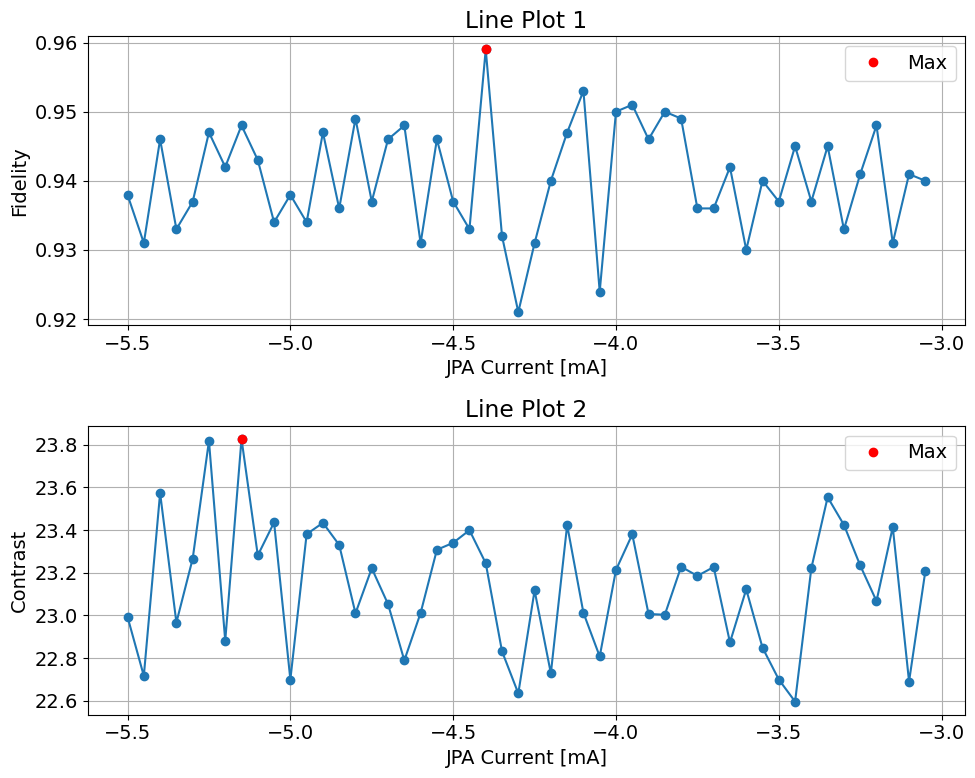

In [ ]:
do_jpa_current_sweep(config_thisrun, expt_path,
                                   config_path, reps=1000,
                                   jpa_current_start=-5.0,
                                   jpa_current_stop=-4.0,
                                   jpa_current_step=0.05,
                                    #  jpa_current_start=0., jpa_current_step=0.2,
                                    #    jpa_current_stop=10., 
                                      #  active_reset=True,
                                         relax_delay=5)

In [ ]:
from slab.instruments import YokogawaGS200
dcflux = YokogawaGS200(address="192.168.137.149")
dcflux.set_output(True)
dcflux.set_mode('current')

jpa_current = -1.875 # mA
jpa_current = 0 # mA
current = jpa_current * 1e-3  # Convert from mA to A
dcflux.set_current(current)

print(1e3 * dcflux.get_current(), 'mA')

#### Sweep both gain and current

In [ ]:
def do_jpa_current_gain_sweep( config_thisrun,
    expt_path,
    config_path,
    jpa_current_start=3.7,
    jpa_current_step=0.005,
    jpa_current_stop = 3.8,
    jpa_gain_start=-15,
    jpa_gain_step=0.5,
    jpa_gain_stop = -11,
    qubits=[0],
    reps=1000,
    check_f=False,
    active_reset=False,
    man_reset=False,
    storage_reset=False,
    qubit=0,
    pulse_manipulate=False,
    cavity_freq=4984.373226159381,
    cavity_gain=800,
    cavity_length=2,
    prepulse=False,
    pre_sweep_pulse=None,
    gate_based=True,
    relax_delay=2500
):
    """Run the single shot experiment with configurable parameters."""
    from multimode_expts.sequential_experiment_classes import histogram_sweep_class
    experiment_class = histogram_sweep_class
    sweep_experiment_name = 'histogram_jpa_gain_current_sweep'
    class_for_exp = experiment_class(soccfg=soc, path=expt_path, prefix=sweep_experiment_name, config_file=config_path, exp_param_file=exp_param_file)

    class_for_exp.yaml_cfg = AttrDict(deepcopy(config_thisrun))
    
    class_for_exp.loaded[sweep_experiment_name] =  {
        'qubits': qubits,
        'reps': reps,
        'check_f': check_f,
        'active_reset': active_reset,
        'man_reset': man_reset,
        'storage_reset': storage_reset,
        'qubit': qubit,
        'pulse_manipulate': pulse_manipulate,
        'cavity_freq': cavity_freq,
        'cavity_gain': cavity_gain,
        'cavity_length': cavity_length,
        'prepulse': prepulse,
        'pre_sweep_pulse': pre_sweep_pulse,
        'gate_based': gate_based,
        'jpa_current_start': jpa_current_start,
        'jpa_current_step': jpa_current_step,
        'jpa_current_stop': jpa_current_stop,
        'jpa_gain_start': jpa_gain_start,
        'jpa_gain_step': jpa_gain_step,
        'jpa_gain_stop': jpa_gain_stop,
    }

    print('relax delay set to:', relax_delay)
    class_for_exp.yaml_cfg.device.readout.relax_delay = [relax_delay]  # Wait time between experiments [us]

    return eval('class_for_exp.run_sweep')( sweep_experiment_name = sweep_experiment_name)

In [ ]:
sweep_func = do_jpa_current_gain_sweep(config_thisrun, expt_path,
                                        config_path, reps=1000, 
                                        jpa_current_start=-5.5,
                                        jpa_current_step=-0.1,
                                        jpa_current_stop=-4.5,
                                        jpa_gain_start=-15,
                                        jpa_gain_step=0.5,
                                        jpa_gain_stop=-5,
                                        # active_reset=True, relax_delay=5
                                        )

relax delay set to: 2500
HistogramExperiment
Index: 0 Gain. = -15.0


OSError: exception: access violation reading 0x0000000000000040